In [1]:
# standard data analysis modules
import pandas as pd
import numpy as np

from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.ticker as ticker

from datetime import datetime

import io
import requests

import time

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# check on the panda version and its dependencies
#pd.__version__
#pd.show_versions()

In [3]:
# to read a directory on my PC
import glob # not used in this code, data taken direct from government website

In [4]:
# to take dates from file names and convert currency columns to integers
import re # actually, i dont use that in this code

In [5]:
# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

In [6]:
# Presentation preperation and image saving

# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images and also slide titles)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

# list of slide titles, text and images to add
monthNow = ''
presentationTitle = ['Covid UK data visualisation', 'Andrew Neville']
saveFileName = 'presentationPrep - coviduk.pptx'
slideTitle = []
slideText = []
imagePath = []

In [7]:
# download direct from the UK government website

def load_from_website(url):
    
    #url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
    s=requests.get(url).content
    c=pd.read_csv(io.StringIO(s.decode('utf-8')))
    
    return c

In [8]:
# url_list = [
# 'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newDeaths28DaysByDeathDate&metric=cumDeaths28DaysByDeathDate&format=csv',
# 'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv',
# 'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',
# 'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22covidOccupiedMVBeds%22:%22covidOccupiedMVBeds%22%7D&format=csv',
# 'https://coronavirus.data.gov.uk/api/v1/data?filters=areaName=United%2520Kingdom;areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newVirusTests%22:%22newVirusTests%22,%22cumVirusTests%22:%22cumVirusTests%22%7D&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumPeopleVaccinatedFirstDoseByPublishDate&metric=newPeopleVaccinatedFirstDoseByPublishDate&metric=newPeopleVaccinatedSecondDoseByPublishDate&metric=cumPeopleVaccinatedSecondDoseByPublishDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000004&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',    
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000006&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000007&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000008&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000009&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000005&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000003&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',   
#             ]


In [9]:
# delay each download by 11 seconds to abide by fair use policy

url_list = [
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDate&metric=cumCasesBySpecimenDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newDeaths28DaysByDeathDate&metric=cumDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newAdmissions&metric=cumAdmissions&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=hospitalCases&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=covidOccupiedMVBeds&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newVirusTests&metric=cumVirusTests&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumPeopleVaccinatedFirstDoseByPublishDate&metric=newPeopleVaccinatedFirstDoseByPublishDate&metric=newPeopleVaccinatedSecondDoseByPublishDate&metric=cumPeopleVaccinatedSecondDoseByPublishDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000004&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',    
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000006&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000007&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000002&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000008&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000009&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000005&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000003&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',   
            ]

i=0
sleep_time = 11

df_cases = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_deaths = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_hospital_a = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_hospital_t = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_hospital_v = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_testing = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_casesAge = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_eng_cd = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_eng_cumadmissionsbyage = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_vac = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_EM = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_EE = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_LO = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_NE = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_NW = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_SE = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_SW = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_WM = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_YH = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1


In [10]:
# sort all dataframes by date

df_cases = df_cases.sort_values('date').reset_index(drop=True)
df_deaths = df_deaths.sort_values('date').reset_index(drop=True)
df_hospital_a = df_hospital_a.sort_values('date').reset_index(drop=True)
df_hospital_t = df_hospital_t.sort_values('date').reset_index(drop=True)
df_hospital_v = df_hospital_v.sort_values('date').reset_index(drop=True)
df_testing = df_testing.sort_values('date').reset_index(drop=True)
df_casesAge = df_casesAge.sort_values('date').reset_index(drop=True)
df_eng_cd = df_eng_cd.sort_values('date').reset_index(drop=True)
df_eng_cumadmissionsbyage = df_eng_cumadmissionsbyage.sort_values('date').reset_index(drop=True)
df_vac = df_vac.sort_values('date').reset_index(drop=True)
df_EM = df_EM.sort_values('date').reset_index(drop=True)
df_EE = df_EE.sort_values('date').reset_index(drop=True)
df_LO = df_LO.sort_values('date').reset_index(drop=True)
df_NE = df_NE.sort_values('date').reset_index(drop=True)
df_NW = df_NW.sort_values('date').reset_index(drop=True)
df_SE = df_SE.sort_values('date').reset_index(drop=True)
df_SW = df_SW.sort_values('date').reset_index(drop=True)
df_WM = df_WM.sort_values('date').reset_index(drop=True)
df_YH = df_YH.sort_values('date').reset_index(drop=True)


In [11]:
df_casesAge.tail()

date  areaType   areaCode        areaName  \
8157  2021-02-03  overview  K02000001  United Kingdom   
8158  2021-02-03  overview  K02000001  United Kingdom   
8159  2021-02-03  overview  K02000001  United Kingdom   
8160  2021-02-03  overview  K02000001  United Kingdom   
8161  2021-02-03  overview  K02000001  United Kingdom   

                                     metric         age  cases  rollingRate  \
8157  newCasesBySpecimenDateAgeDemographics  unassigned     17          NaN   
8158  newCasesBySpecimenDateAgeDemographics         60+   3183        145.9   
8159  newCasesBySpecimenDateAgeDemographics       00_59  14103        200.9   
8160  newCasesBySpecimenDateAgeDemographics       55_59   1219        210.0   
8161  newCasesBySpecimenDateAgeDemographics       00_04    520         97.9   

      rollingSum  
8157         103  
8158       23536  
8159      101805  
8160        9254  
8161        3777

In [12]:
# # function to create dataframes

# def create_dataframe(file_name):
       
#     #upload the files to seperate dataframes   
#     file = str(folder[0]) + '/' + str(file_name) + '.csv'
       
#     # recognise the date column as a date
#     try:
#         dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
#         df = pd.read_csv(file, parse_dates={'datetime': ['date']}, date_parser=dateparse)
#     except:
#         dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
#         df = pd.read_csv(file, parse_dates={'datetime': ['date']}, date_parser=dateparse)
    
#     df = df.sort_values(by=['datetime']).reset_index(drop=True)
    
#     return df    

In [13]:
# sources

# df_deathsAges
# https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales
# https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2020/publishedweek532020.xlsx

# https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2021/publishedweek012021.xlsx


In [14]:
# read the deaths by ages excel file for 2020

url = 'https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2020/publishedweek532020.xlsx'

s=requests.get(url).content
df_deathsAges_20 = pd.read_excel(io.BytesIO(s),
                              nrows = 25, header = 5, sheet_name='Covid-19 - Weekly occurrences')

df_deathsAges_all_20 = pd.read_excel(io.BytesIO(s),
                              nrows = 35, header = 5, sheet_name='Weekly figures 2020')

In [15]:
# set variables to lists, will replacve with a dataframe

df_deathsAges_21 = []
df_deathsAges_all_2 = []

In [16]:
# read the deaths by ages excel file for 2021

# look for the most up to date file
url1 = 'https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2021/publishedweek'
url2 = '2021.xlsx'

for i in range(53,0,-1):
    url3 = str(i)
    if len(str(i)) == 1:
        url3 = '0' + str(i)
    url = url1 + url3 + url2
    
    try:
        s=requests.get(url).content
        df_deathsAges_21 = pd.read_excel(io.BytesIO(s),
                              nrows = 25, header = 5, sheet_name='Covid-19 - Weekly occurrences')
        df_deathsAges_all_21 = pd.read_excel(io.BytesIO(s),
                              nrows = 35, header = 5, sheet_name='Weekly figures 2021')

        df_deathsAges_21.shape # this forces an error if nothing there
      
        break
    except:
        continue


In [17]:
print(url)

https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2021/publishedweek022021.xlsx


In [18]:
# df_deathsAges_xx contains the weekly deaths by age for covid
# df_deathsAges_all_xx contains the cumulative deaths by age and totals and 5 year average for all causes

In [19]:
# merging the df_deathsAges_21 and df_deathsAges_20

In [20]:
# it looks like df_deathsAges_21 is a continuation
# so no need to combine with df_deathsAges_20
# i can work with df_deathsAges_21 and convert to df_deathsAges

df_deathsAges_21.head()

Week ended           Unnamed: 1  \
0                                   NaN                  NaN   
1                                   NaN                  NaN   
2  Deaths involving COVID-19, all ages1                  NaN   
3                                   NaN            Persons 4   
4                                   NaN  Deaths by age group   

   2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  0.0                  0.0                  0.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  0.0                  1.0                  1.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  0.0                  0.0                  1.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  6.0                 44.0                407.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               1882.0               5195.0               8265.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               8334.0               6955.0               5230.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               3992.0               2869.0               2294.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               1786.0               1314.0                954.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                683.0                590.0                428.0   
3                  NaN                  NaN                  NaN   
4                  NaN          

In [21]:
df_deathsAges_21.tail()

Week ended Unnamed: 1  2020-01-03 00:00:00  2020-01-10 00:00:00  \
20        NaN      70-74                  0.0                  0.0   
21        NaN      75-79                  0.0                  0.0   
22        NaN      80-84                  0.0                  0.0   
23        NaN      85-89                  0.0                  0.0   
24        NaN        90+                  0.0                  0.0   

    2020-01-17 00:00:00  2020-01-24 00:00:00  2020-01-31 00:00:00  \
20                  0.0                  0.0                  0.0   
21                  0.0                  0.0                  0.0   
22                  0.0                  0.0                  1.0   
23                  0.0                  0.0                  0.0   
24                  0.0                  0.0                  0.0   

    2020-02-07 00:00:00  2020-02-14 00:00:00  2020-02-21 00:00:00  \
20                  0.0                  0.0                  0.0   
21                  0.0                  0.0                  0.0   
22                  0.0                  0.0                  0.0   
23                  0.0                  0.0                  0.0   
24                  0.0                  0.0                  0.0   

    2020-02-28 00:00:00  2020-03-06 00:00:00  2020-03-13 00:00:00  \
20                  0.0                  1.0                  6.0   
21                  0.0                  3.0                  2.0   
22                  0.0                  1.0                  8.0   
23                  0.0                  0.0                  8.0   
24                  0.0                  1.0                  7.0   

    2020-03-20 00:00:00  2020-03-27 00:00:00  2020-04-03 00:00:00  \
20                 40.0                217.0                600.0   
21                 46.0                291.0                814.0   
22                 74.0                355.0               1015.0   
23                 84.0                335.0                867.0   
24                 68.0                273.0                793.0   

    2020-04-10 00:00:00  2020-04-17 00:00:00  2020-04-24 00:00:00  \
20                864.0                789.0                582.0   
21               1229.0               1090.0                848.0   
22               1579.0               1570.0               1332.0   
23               1534.0               1735.0               1471.0   
24               1429.0               1715.0               1642.0   

    2020-05-01 00:00:00  2020-05-08 00:00:00  2020-05-15 00:00:00  \
20                396.0                342.0                203.0   
21                674.0                477.0                347.0   
22                990.0                714.0                545.0   
23               1118.0                902.0                652.0   
24               1342.0               1047.0                768.0   

    2020-05-22 00:00:00  2020-05-29 00:00:00  2020-06-05 00:00:00  \
20                187.0                139.0                111.0   
21                279.0                207.0                163.0   
22                422.0                358.0                256.0   
23                533.0                394.0                284.0   
24                612.0                456.0                334.0   

    2020-06-12 00:00:00  2020-06-19 00:00:00  2020-06-26 00:00:00  \
20                 69.0                 70.0                 48.0   
21                119.0                 89.0                 80.0   
22                198.0                129.0                122.0   
23                210.0                143.0                118.0   
24                237.0                159.0                145.0   

    2020-07-03 00:00:00  2020-07-10 00:00:00  2020-07-17 00:00:00  \
20                 37.0                 34.0                 32.0   
21                 57.0                 39.0                 33.0   
22                 84.0                 63.0           

In [22]:
# keep this code in in case we need it later in the year
# the df_deathsAges_21 may cease to include 2020 data at some point

# df_deathsAges_20 = df_deathsAges_20.drop([0,1,2,3,4]).reset_index(drop=True)
# df_deathsAges_20.drop(['Week ended'], axis=1, inplace=True)
# df_deathsAges_20.rename(columns={"Unnamed: 1": "age"}, inplace=True)

In [23]:
df_deathsAges_21 = df_deathsAges_21.drop([0,1,2,3,4]).reset_index(drop=True)
df_deathsAges_21.drop(['Week ended'], axis=1, inplace=True)
df_deathsAges_21.rename(columns={"Unnamed: 1": "age"}, inplace=True)
df_deathsAges_21.drop(list(df_deathsAges_21.filter(regex = 'Unnamed:')), axis = 1, inplace = True)

In [24]:
df_deathsAges_21.head()

age  2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
0     <1                  0.0                  0.0                  0.0   
1    1-4                  0.0                  0.0                  0.0   
2    5-9                  0.0                  0.0                  0.0   
3  10-14                  0.0                  0.0                  0.0   
4  15-19                  0.0                  0.0                  0.0   

   2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  1.0                  0.0   
3                  0.0                  0.0                  1.0   
4                  2.0                  3.0                  1.0   

   2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  2.0                  0.0                  0.0   

   2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
0                  1.0                  1.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  1.0   
4                  0.0                  1.0                  0.0   

   2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  1.0                  0.0   
4                  0.0                  0.0                  0.0   

   2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2020-07-10 00:00:00  2020-07-17 00:00:00  2020-07-24 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3         

In [25]:
# it looks like the 2021 file continues toe 'covid-19 - weekly occurrences' onwards

df_deathsAges = df_deathsAges_21.copy()

In [26]:
# getting the weekly totals and averages of all deaths for each year
# and merging them together to form df_deathsAges_all_totals


In [27]:
df_deathsAges_all_20[0:5]

Week ended Unnamed: 1  \
0                                                NaN        NaN   
1                                                NaN        NaN   
2                             Total deaths, all ages        NaN   
3             Total deaths: average of corresponding        NaN   
4  week over the previous 5 years 1, 10, 11 (Engl...        NaN   

   2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              12254.0              14058.0              12990.0   
3                  NaN                  NaN                  NaN   
4              12175.0              13822.0              13216.0   

   2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              11856.0              11612.0              10986.0   
3                  NaN                  NaN                  NaN   
4              12760.0              12206.0              11925.0   

   2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              10944.0              10841.0              10816.0   
3                  NaN                  NaN                  NaN   
4              11627.0              11548.0              11183.0   

   2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              10895.0              11019.0              10645.0   
3                  NaN                  NaN                  NaN   
4              11498.0              11205.0              10573.0   

   2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              11141.0              16387.0              18516.0   
3                  NaN                  NaN                  NaN   
4              10130.0              10305.0              10520.0   

   2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              22351.0              21997.0              17953.0   
3                  NaN                  NaN                  NaN   
4              10497.0              10458.0               9941.0   

   2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              12657.0              14573.0              12288.0   
3                  NaN                  NaN                  NaN   
4               9576.0              10188.0               9940.0   

   2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               9824.0              10709.0               9976.0   
3                  NaN                  NaN                  NaN   
4               8171.0               9977.0               9417.0   

   2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               9339.0               8979.0               9140.0   
3                  NaN                  NaN                  NaN   
4               9404.0     

In [28]:
df_deathsAges_all_21[0:6]

Week ended Unnamed: 1  \
0                                                NaN        NaN   
1                                                NaN        NaN   
2                      Total deaths, all ages (2021)        NaN   
3                                                NaN        NaN   
4                      Total deaths, all ages (2020)        NaN   
5  Total deaths: average of corresponding week in...        NaN   

   2021-01-08 00:00:00  2021-01-15 00:00:00  2021-01-22 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              17751.0              18042.0                  NaN   
3                  NaN                  NaN                  NaN   
4              12254.0              14058.0              12990.0   
5              12175.0              13822.0              13216.0   

   2021-01-29 00:00:00  2021-02-05 00:00:00  2021-02-12 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4              11856.0              11612.0              10986.0   
5              12760.0              12206.0              11925.0   

   2021-02-19 00:00:00  2021-02-26 00:00:00  2021-03-05 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4              10944.0              10841.0              10816.0   
5              11627.0              11548.0              11183.0   

   2021-03-12 00:00:00  2021-03-19 00:00:00  2021-03-26 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4              10895.0              11019.0              10645.0   
5              11498.0              11205.0              10573.0   

   2021-04-02 00:00:00  2021-04-09 00:00:00  2021-04-16 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4              11141.0              16387.0              18516.0   
5              10130.0              10305.0              10520.0   

   2021-04-23 00:00:00  2021-04-30 00:00:00  2021-05-07 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4              22351.0              21997.0              17953.0   
5              10497.0              10458.0               9941.0   

   2021-05-14 00:00:00  2021-05-21 00:00:00  2021-05-28 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4              12657.0              14573.0              12288.0   
5               9576.0              10188.0               9940.0   

   2021-06-04 00:00:00  2021-06-11 00:00:00  2021-06-18 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN       

In [29]:
# these dataframes have slightly different rows
# looking to keep the total deaths and average deaths

df_deathsAges_all_totals_20 = df_deathsAges_all_20.loc[[2,4]].reset_index(drop=True)
df_deathsAges_all_totals_21 = df_deathsAges_all_21.loc[[2,5]].reset_index(drop=True)

In [30]:
df_deathsAges_all_totals_20.drop('Unnamed: 1', axis=1, inplace=True)
df_deathsAges_all_totals_21.drop('Unnamed: 1', axis=1, inplace=True)
df_deathsAges_all_totals_21.drop('Week ended', axis=1, inplace=True) # drop 'week ended' column off 2021

In [31]:
df_deathsAges_all_totals_20.head()

Week ended  2020-01-03 00:00:00  \
0                             Total deaths, all ages              12254.0   
1  week over the previous 5 years 1, 10, 11 (Engl...              12175.0   

   2020-01-10 00:00:00  2020-01-17 00:00:00  2020-01-24 00:00:00  \
0              14058.0              12990.0              11856.0   
1              13822.0              13216.0              12760.0   

   2020-01-31 00:00:00  2020-02-07 00:00:00  2020-02-14 00:00:00  \
0              11612.0              10986.0              10944.0   
1              12206.0              11925.0              11627.0   

   2020-02-21 00:00:00  2020-02-28 00:00:00  2020-03-06 00:00:00  \
0              10841.0              10816.0              10895.0   
1              11548.0              11183.0              11498.0   

   2020-03-13 00:00:00  2020-03-20 00:00:00  2020-03-27 00:00:00  \
0              11019.0              10645.0              11141.0   
1              11205.0              10573.0              10130.0   

   2020-04-03 00:00:00  2020-04-10 00:00:00  2020-04-17 00:00:00  \
0              16387.0              18516.0              22351.0   
1              10305.0              10520.0              10497.0   

   2020-04-24 00:00:00  2020-05-01 00:00:00  2020-05-08 00:00:00  \
0              21997.0              17953.0              12657.0   
1              10458.0               9941.0               9576.0   

   2020-05-15 00:00:00  2020-05-22 00:00:00  2020-05-29 00:00:00  \
0              14573.0              12288.0               9824.0   
1              10188.0               9940.0               8171.0   

   2020-06-05 00:00:00  2020-06-12 00:00:00  2020-06-19 00:00:00  \
0              10709.0               9976.0               9339.0   
1               9977.0               9417.0               9404.0   

   2020-06-26 00:00:00  2020-07-03 00:00:00  2020-07-10 00:00:00  \
0               8979.0               9140.0               8690.0   
1               9293.0               9183.0               9250.0   

   2020-07-17 00:00:00  2020-07-24 00:00:00  2020-07-31 00:00:00  \
0               8823.0               8891.0               8946.0   
1               9093.0               9052.0               9036.0   

   2020-08-07 00:00:00  2020-08-14 00:00:00  2020-08-21 00:00:00  \
0               8945.0               9392.0               9631.0   
1               9102.0               9085.0               9157.0   

   2020-08-28 00:00:00  2020-09-04 00:00:00  2020-09-11 00:00:00  \
0               9032.0               7739.0               9811.0   
1               8241.0               9182.0               9306.0   

   2020-09-18 00:00:00  2020-09-25 00:00:00  2020-10-02 00:00:00  \
0               9523.0               9634.0               9945.0   
1               9264.0               9377.0               9555.0   

   2020-10-09 00:00:00  2020-10-16 00:00:00  2020-10-23 00:00:00  \
0               9954.0              10534.0              10739.0   
1               9811.0               9865.0               9759.0   

   2020-10-30 00:00:00  2020-11-06 00:00:00  2020-11-13 00:00:00  \
0              10887.0              11812.0              12254.0   
1               9891.0              10331.0              10350.0   

   2020-11-20 00:00:00  2020-11-27 00:00:00  2020-12-04 00:00:00  \
0              12535.0              12456.0              12303.0   
1              10380.0              10357.0              10695.0   

   2020-12-11 00:00:00  2020-12-18 00:00:00  2020-12-25 00:00:00  \
0              12292.0              13011.0              11520.0   
1              10750.0              11548.0               7954.0   

   2021-01-01 00:00:00  
0              10069.0  
1               7954.0

In [32]:
df_deathsAges_all_totals_21.head()

2021-01-08 00:00:00  2021-01-15 00:00:00  2021-01-22 00:00:00  \
0              17751.0              18042.0                  NaN   
1              12175.0              13822.0              13216.0   

   2021-01-29 00:00:00  2021-02-05 00:00:00  2021-02-12 00:00:00  \
0                  NaN                  NaN                  NaN   
1              12760.0              12206.0              11925.0   

   2021-02-19 00:00:00  2021-02-26 00:00:00  2021-03-05 00:00:00  \
0                  NaN                  NaN                  NaN   
1              11627.0              11548.0              11183.0   

   2021-03-12 00:00:00  2021-03-19 00:00:00  2021-03-26 00:00:00  \
0                  NaN                  NaN                  NaN   
1              11498.0              11205.0              10573.0   

   2021-04-02 00:00:00  2021-04-09 00:00:00  2021-04-16 00:00:00  \
0                  NaN                  NaN                  NaN   
1              10130.0              10305.0              10520.0   

   2021-04-23 00:00:00  2021-04-30 00:00:00  2021-05-07 00:00:00  \
0                  NaN                  NaN                  NaN   
1              10497.0              10458.0               9941.0   

   2021-05-14 00:00:00  2021-05-21 00:00:00  2021-05-28 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9576.0              10188.0               9940.0   

   2021-06-04 00:00:00  2021-06-11 00:00:00  2021-06-18 00:00:00  \
0                  NaN                  NaN                  NaN   
1               8171.0               9977.0               9417.0   

   2021-06-25 00:00:00  2021-07-02 00:00:00  2021-07-09 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9404.0               9293.0               9183.0   

   2021-07-16 00:00:00  2021-07-23 00:00:00  2021-07-30 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9250.0               9093.0               9052.0   

   2021-08-06 00:00:00  2021-08-13 00:00:00  2021-08-20 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9036.0               9102.0               9085.0   

   2021-08-27 00:00:00  2021-09-03 00:00:00  2021-09-10 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9157.0               8241.0               9182.0   

   2021-09-17 00:00:00  2021-09-24 00:00:00  2021-10-01 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9306.0               9264.0               9377.0   

   2021-10-08 00:00:00  2021-10-15 00:00:00  2021-10-22 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9555.0               9811.0               9865.0   

   2021-10-29 00:00:00  2021-11-05 00:00:00  2021-11-12 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9759.0               9891.0              10331.0   

   2021-11-19 00:00:00  2021-11-26 00:00:00  2021-12-03 00:00:00  \
0                  NaN                  NaN                  NaN   
1              10350.0              10380.0              10357.0   

   2021-12-10 00:00:00  2021-12-17 00:00:00  2021-12-24 00:00:00  \
0                  NaN                  NaN                  NaN   
1              10695.0              10750.0              11548.0   

   2021-12-31 00:00:00  
0                  NaN  
1               7954.0

In [33]:
df_deathsAges_all_totals = df_deathsAges_all_totals_20.join(df_deathsAges_all_totals_21)

In [34]:
df_deathsAges_all_totals

Week ended  2020-01-03 00:00:00  \
0                             Total deaths, all ages              12254.0   
1  week over the previous 5 years 1, 10, 11 (Engl...              12175.0   

   2020-01-10 00:00:00  2020-01-17 00:00:00  2020-01-24 00:00:00  \
0              14058.0              12990.0              11856.0   
1              13822.0              13216.0              12760.0   

   2020-01-31 00:00:00  2020-02-07 00:00:00  2020-02-14 00:00:00  \
0              11612.0              10986.0              10944.0   
1              12206.0              11925.0              11627.0   

   2020-02-21 00:00:00  2020-02-28 00:00:00  2020-03-06 00:00:00  \
0              10841.0              10816.0              10895.0   
1              11548.0              11183.0              11498.0   

   2020-03-13 00:00:00  2020-03-20 00:00:00  2020-03-27 00:00:00  \
0              11019.0              10645.0              11141.0   
1              11205.0              10573.0              10130.0   

   2020-04-03 00:00:00  2020-04-10 00:00:00  2020-04-17 00:00:00  \
0              16387.0              18516.0              22351.0   
1              10305.0              10520.0              10497.0   

   2020-04-24 00:00:00  2020-05-01 00:00:00  2020-05-08 00:00:00  \
0              21997.0              17953.0              12657.0   
1              10458.0               9941.0               9576.0   

   2020-05-15 00:00:00  2020-05-22 00:00:00  2020-05-29 00:00:00  \
0              14573.0              12288.0               9824.0   
1              10188.0               9940.0               8171.0   

   2020-06-05 00:00:00  2020-06-12 00:00:00  2020-06-19 00:00:00  \
0              10709.0               9976.0               9339.0   
1               9977.0               9417.0               9404.0   

   2020-06-26 00:00:00  2020-07-03 00:00:00  2020-07-10 00:00:00  \
0               8979.0               9140.0               8690.0   
1               9293.0               9183.0               9250.0   

   2020-07-17 00:00:00  2020-07-24 00:00:00  2020-07-31 00:00:00  \
0               8823.0               8891.0               8946.0   
1               9093.0               9052.0               9036.0   

   2020-08-07 00:00:00  2020-08-14 00:00:00  2020-08-21 00:00:00  \
0               8945.0               9392.0               9631.0   
1               9102.0               9085.0               9157.0   

   2020-08-28 00:00:00  2020-09-04 00:00:00  2020-09-11 00:00:00  \
0               9032.0               7739.0               9811.0   
1               8241.0               9182.0               9306.0   

   2020-09-18 00:00:00  2020-09-25 00:00:00  2020-10-02 00:00:00  \
0               9523.0               9634.0               9945.0   
1               9264.0               9377.0               9555.0   

   2020-10-09 00:00:00  2020-10-16 00:00:00  2020-10-23 00:00:00  \
0               9954.0              10534.0              10739.0   
1               9811.0               9865.0               9759.0   

   2020-10-30 00:00:00  2020-11-06 00:00:00  2020-11-13 00:00:00  \
0              10887.0              11812.0              12254.0   
1               9891.0              10331.0              10350.0   

   2020-11-20 00:00:00  2020-11-27 00:00:00  2020-12-04 00:00:00  \
0              12535.0              12456.0              12303.0   
1              10380.0              10357.0              10695.0   

   2020-12-11 00:00:00  2020-12-18 00:00:00  2020-12-25 00:00:00  \
0              12292.0              13011.0              11520.0   
1              10750.0              11548.0               7954.0   

   2021-01-01 00:00:00  2021-01-08 00:00:00  2021-01-15 00:00:00  \
0              10069.0              17751.0              18042.0   
1               7954.0              12175.0              13822.0   

   2021-01-22 00:00:00  2021-01-29 00:00:00  2021-02-05 00:00:00  \
0                  NaN                  NaN         

In [35]:
# getting the weekly totals of all deaths by age
# and merging them together to form df_deathsAges_all

In [36]:
df_deathsAges_all_20 = df_deathsAges_all_20.loc[15:].reset_index(drop=True)
df_deathsAges_all_20.drop(['Week ended'], axis=1, inplace=True)
df_deathsAges_all_20.rename(columns={"Unnamed: 1": "age"}, inplace=True)

In [37]:
df_deathsAges_all_20.head(1)

age  2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
0  <1                 48.0                 50.0                 69.0   

   2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
0                 53.0                 50.0                 30.0   

   2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
0                 43.0                 51.0                 49.0   

   2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
0                 56.0                 53.0                 44.0   

   2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
0                 49.0                 51.0                 38.0   

   2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
0                 51.0                 54.0                 48.0   

   2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
0                 28.0                 56.0                 51.0   

   2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
0                 40.0                 44.0                 44.0   

   2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
0                 48.0                 47.0                 47.0   

   2020-07-10 00:00:00  2020-07-17 00:00:00  2020-07-24 00:00:00  \
0                 58.0                 35.0                 49.0   

   2020-07-31 00:00:00  2020-08-07 00:00:00  2020-08-14 00:00:00  \
0                 45.0                 44.0                 50.0   

   2020-08-21 00:00:00  2020-08-28 00:00:00  2020-09-04 00:00:00  \
0                 49.0                 38.0                 29.0   

   2020-09-11 00:00:00  2020-09-18 00:00:00  2020-09-25 00:00:00  \
0                 39.0                 36.0                 45.0   

   2020-10-02 00:00:00  2020-10-09 00:00:00  2020-10-16 00:00:00  \
0                 47.0                 45.0                 41.0   

   2020-10-23 00:00:00  2020-10-30 00:00:00  2020-11-06 00:00:00  \
0                 34.0                 31.0                 43.0   

   2020-11-13 00:00:00  2020-11-20 00:00:00  2020-11-27 00:00:00  \
0                 45.0                 54.0                 44.0   

   2020-12-04 00:00:00  2020-12-11 00:00:00  2020-12-18 00:00:00  \
0                 50.0                 45.0                 46.0   

   2020-12-25 00:00:00  2021-01-01 00:00:00  
0                 33.0                 32.0

In [38]:
df_deathsAges_all_20.tail(1)

age  2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
19  90+               2898.0               3297.0               2924.0   

    2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
19               2626.0               2583.0               2433.0   

    2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
19               2517.0               2475.0               2398.0   

    2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
19               2391.0               2483.0               2302.0   

    2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
19               2428.0               3413.0               3898.0   

    2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
19               5157.0               5144.0               4395.0   

    2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
19               3003.0               3408.0               2780.0   

    2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
19               2168.0               2215.0               2068.0   

    2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
19               1912.0               1831.0               1820.0   

    2020-07-10 00:00:00  2020-07-17 00:00:00  2020-07-24 00:00:00  \
19               1703.0               1735.0               1796.0   

    2020-07-31 00:00:00  2020-08-07 00:00:00  2020-08-14 00:00:00  \
19               1757.0               1819.0               1986.0   

    2020-08-21 00:00:00  2020-08-28 00:00:00  2020-09-04 00:00:00  \
19               1999.0               1778.0               1538.0   

    2020-09-11 00:00:00  2020-09-18 00:00:00  2020-09-25 00:00:00  \
19               2075.0               1961.0               1917.0   

    2020-10-02 00:00:00  2020-10-09 00:00:00  2020-10-16 00:00:00  \
19               2032.0               2089.0               2213.0   

    2020-10-23 00:00:00  2020-10-30 00:00:00  2020-11-06 00:00:00  \
19               2198.0               2222.0               2513.0   

    2020-11-13 00:00:00  2020-11-20 00:00:00  2020-11-27 00:00:00  \
19               2490.0               2645.0               2643.0   

    2020-12-04 00:00:00  2020-12-11 00:00:00  2020-12-18 00:00:00  \
19               2602.0               2596.0               2881.0   

    2020-12-25 00:00:00  2021-01-01 00:00:00  
19               2508.0               2255.0

In [39]:
df_deathsAges_all_21 = df_deathsAges_all_21.loc[11:30].reset_index(drop=True)
df_deathsAges_all_21.drop(['Week ended'], axis=1, inplace=True)
df_deathsAges_all_21.rename(columns={"Unnamed: 1": "age"}, inplace=True)

In [40]:
df_deathsAges_all_21.head(1)

age  2021-01-08 00:00:00  2021-01-15 00:00:00  2021-01-22 00:00:00  \
0  <1                 52.0                 52.0                  NaN   

   2021-01-29 00:00:00  2021-02-05 00:00:00  2021-02-12 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-02-19 00:00:00  2021-02-26 00:00:00  2021-03-05 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-03-12 00:00:00  2021-03-19 00:00:00  2021-03-26 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-04-02 00:00:00  2021-04-09 00:00:00  2021-04-16 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-04-23 00:00:00  2021-04-30 00:00:00  2021-05-07 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-05-14 00:00:00  2021-05-21 00:00:00  2021-05-28 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-06-04 00:00:00  2021-06-11 00:00:00  2021-06-18 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-06-25 00:00:00  2021-07-02 00:00:00  2021-07-09 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-07-16 00:00:00  2021-07-23 00:00:00  2021-07-30 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-08-06 00:00:00  2021-08-13 00:00:00  2021-08-20 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-08-27 00:00:00  2021-09-03 00:00:00  2021-09-10 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-09-17 00:00:00  2021-09-24 00:00:00  2021-10-01 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-10-08 00:00:00  2021-10-15 00:00:00  2021-10-22 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-10-29 00:00:00  2021-11-05 00:00:00  2021-11-12 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-11-19 00:00:00  2021-11-26 00:00:00  2021-12-03 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-12-10 00:00:00  2021-12-17 00:00:00  2021-12-24 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-12-31 00:00:00  
0                  NaN

In [41]:
df_deathsAges_all_21.tail(1)

age  2021-01-08 00:00:00  2021-01-15 00:00:00  2021-01-22 00:00:00  \
19  90+               3996.0               3987.0                  NaN   

    2021-01-29 00:00:00  2021-02-05 00:00:00  2021-02-12 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-02-19 00:00:00  2021-02-26 00:00:00  2021-03-05 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-03-12 00:00:00  2021-03-19 00:00:00  2021-03-26 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-04-02 00:00:00  2021-04-09 00:00:00  2021-04-16 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-04-23 00:00:00  2021-04-30 00:00:00  2021-05-07 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-05-14 00:00:00  2021-05-21 00:00:00  2021-05-28 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-06-04 00:00:00  2021-06-11 00:00:00  2021-06-18 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-06-25 00:00:00  2021-07-02 00:00:00  2021-07-09 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-07-16 00:00:00  2021-07-23 00:00:00  2021-07-30 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-08-06 00:00:00  2021-08-13 00:00:00  2021-08-20 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-08-27 00:00:00  2021-09-03 00:00:00  2021-09-10 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-09-17 00:00:00  2021-09-24 00:00:00  2021-10-01 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-10-08 00:00:00  2021-10-15 00:00:00  2021-10-22 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-10-29 00:00:00  2021-11-05 00:00:00  2021-11-12 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-11-19 00:00:00  2021-11-26 00:00:00  2021-12-03 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-12-10 00:00:00  2021-12-17 00:00:00  2021-12-24 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-12-31 00:00:00  
19                  NaN

In [42]:
# drop the age column from the df_deathsAges_all_21 pre joining

df_deathsAges_all_21.drop(['age'], axis=1, inplace=True)

In [43]:
df_deathsAges_all = df_deathsAges_all_20.join(df_deathsAges_all_21)

In [44]:
df_deathsAges_all.head()

age  2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
0     <1                 48.0                 50.0                 69.0   
1    1-4                  8.0                  9.0                  7.0   
2    5-9                  4.0                  8.0                  5.0   
3  10-14                  4.0                  9.0                  4.0   
4  15-19                  6.0                 16.0                 10.0   

   2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
0                 53.0                 50.0                 30.0   
1                  9.0                  6.0                  8.0   
2                  4.0                  5.0                  4.0   
3                  8.0                  4.0                  4.0   
4                 15.0                 23.0                 10.0   

   2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
0                 43.0                 51.0                 49.0   
1                  6.0                  5.0                  7.0   
2                  2.0                  6.0                  6.0   
3                  4.0                  7.0                  7.0   
4                 16.0                 20.0                 24.0   

   2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
0                 56.0                 53.0                 44.0   
1                 11.0                 13.0                  2.0   
2                  2.0                  3.0                  6.0   
3                  7.0                  6.0                  4.0   
4                 21.0                 18.0                 15.0   

   2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
0                 49.0                 51.0                 38.0   
1                  8.0                  8.0                  6.0   
2                  1.0                  5.0                  4.0   
3                  4.0                  8.0                  4.0   
4                 12.0                  9.0                  8.0   

   2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
0                 51.0                 54.0                 48.0   
1                  6.0                  6.0                  8.0   
2                  5.0                  3.0                  0.0   
3                  4.0                  3.0                  3.0   
4                 20.0                 11.0                 14.0   

   2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
0                 28.0                 56.0                 51.0   
1                  6.0                 10.0                  4.0   
2                  4.0                  5.0                  5.0   
3                 10.0                  4.0                  7.0   
4                  9.0                 13.0                 13.0   

   2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
0                 40.0                 44.0                 44.0   
1                  6.0                  4.0                  4.0   
2                  3.0                  4.0                  2.0   
3                  5.0                  8.0                  5.0   
4                  7.0                 10.0                 10.0   

   2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
0                 48.0                 47.0                 47.0   
1                 10.0                  4.0                  7.0   
2                  5.0                  4.0                  2.0   
3                  4.0                  3.0                  4.0   
4                  9.0                  2.0                 14.0   

   2020-07-10 00:00:00  2020-07-17 00:00:00  2020-07-24 00:00:00  \
0                 58.0                 35.0                 49.0   
1                  3.0                  6.0                  3.0   
2                  2.0                  4.0                  5.0   
3         

In [45]:
# convert column headers from datetime to dates strings
# drop surplus columns at end

df_deathsAges.columns = df_deathsAges.columns.astype(str)
col_list = df_deathsAges.columns.tolist()

col_names = []
endcol = 999
for i in range(len(col_list)):
    if len(col_list[i]) > 10:
        col_names.append(col_list[i][:10])
    else:
        col_names.append(col_list[i])
        if i > 0:
            endcol = i

df_deathsAges = df_deathsAges.drop(df_deathsAges.columns[endcol:],axis=1)
df_deathsAges.columns = col_names[0:endcol]

In [46]:
df_deathsAges.tail()

age  2020-01-03  2020-01-10  2020-01-17  2020-01-24  2020-01-31  \
15  70-74         0.0         0.0         0.0         0.0         0.0   
16  75-79         0.0         0.0         0.0         0.0         0.0   
17  80-84         0.0         0.0         0.0         0.0         1.0   
18  85-89         0.0         0.0         0.0         0.0         0.0   
19    90+         0.0         0.0         0.0         0.0         0.0   

    2020-02-07  2020-02-14  2020-02-21  2020-02-28  2020-03-06  2020-03-13  \
15         0.0         0.0         0.0         0.0         1.0         6.0   
16         0.0         0.0         0.0         0.0         3.0         2.0   
17         0.0         0.0         0.0         0.0         1.0         8.0   
18         0.0         0.0         0.0         0.0         0.0         8.0   
19         0.0         0.0         0.0         0.0         1.0         7.0   

    2020-03-20  2020-03-27  2020-04-03  2020-04-10  2020-04-17  2020-04-24  \
15        40.0       217.0       600.0       864.0       789.0       582.0   
16        46.0       291.0       814.0      1229.0      1090.0       848.0   
17        74.0       355.0      1015.0      1579.0      1570.0      1332.0   
18        84.0       335.0       867.0      1534.0      1735.0      1471.0   
19        68.0       273.0       793.0      1429.0      1715.0      1642.0   

    2020-05-01  2020-05-08  2020-05-15  2020-05-22  2020-05-29  2020-06-05  \
15       396.0       342.0       203.0       187.0       139.0       111.0   
16       674.0       477.0       347.0       279.0       207.0       163.0   
17       990.0       714.0       545.0       422.0       358.0       256.0   
18      1118.0       902.0       652.0       533.0       394.0       284.0   
19      1342.0      1047.0       768.0       612.0       456.0       334.0   

    2020-06-12  2020-06-19  2020-06-26  2020-07-03  2020-07-10  2020-07-17  \
15        69.0        70.0        48.0        37.0        34.0        32.0   
16       119.0        89.0        80.0        57.0        39.0        33.0   
17       198.0       129.0       122.0        84.0        63.0        41.0   
18       210.0       143.0       118.0        91.0        65.0        43.0   
19       237.0       159.0       145.0       100.0        88.0        51.0   

    2020-07-24  2020-07-31  2020-08-07  2020-08-14  2020-08-21  2020-08-28  \
15        15.0        14.0        14.0        10.0         5.0         6.0   
16        27.0        23.0        15.0        25.0        14.0         9.0   
17        34.0        35.0        24.0        29.0        24.0        18.0   
18        47.0        27.0        23.0        31.0        23.0        17.0   
19        39.0        36.0        33.0        26.0        12.0        19.0   

    2020-09-04  2020-09-11  2020-09-18  2020-09-25  2020-10-02  2020-10-09  \
15         9.0        10.0        13.0        27.0        52.0        53.0   
16        11.0        19.0        22.0        30.0        60.0        88.0   
17        11.0        15.0        33.0        43.0        78.0       104.0   
18        14.0        18.0        47.0        42.0        66.0        97.0   
19        15.0        20.0        27.0        54.0        68.0        99.0   

    2020-10-16  2020-10-23  2020-10-30  2020-11-06  2020-11-13  2020-11-20  \
15        89.0       142.0       172.0       225.0       285.0       279.0   
16       118.0       218.0       260.0       315.0       368.0       440.0   
17       152.0       238.0       341.0       467.0       513.0       559.0   
18       140.0       250.0       341.0       420.0       541.0       608.0   
19       151.0       218.0       330.0       447.0       504.0       612.0   

    2020-11-27  2020-12-04  2020-12-11  2020-12-18  2020-12-25  2021-01-01  \
15       315.0       286.0       242.0       287.0       384.0       447.0   
16       440.0       431.0       410.0       414.0       484.0       640.0   
17       564.0       524.0       502.0       627.0

In [47]:
# convert column headers from datetime to dates strings
# drop surplus columns at end

df_deathsAges_all.columns = df_deathsAges_all.columns.astype(str)
col_list = df_deathsAges_all.columns.tolist()

col_names = []
endcol = 999
for i in range(len(col_list)):
    if len(col_list[i]) > 10:
        col_names.append(col_list[i][:10])
    else:
        col_names.append(col_list[i])
        if i > 0:
            endcol = i

df_deathsAges_all = df_deathsAges_all.drop(df_deathsAges_all.columns[endcol:],axis=1)
df_deathsAges_all.columns = col_names[0:endcol]

In [48]:
df_deathsAges_all.dropna(axis=1, how='all', inplace=True)

In [49]:
df_deathsAges_all.head()

age  2020-01-03  2020-01-10  2020-01-17  2020-01-24  2020-01-31  \
0     <1        48.0        50.0        69.0        53.0        50.0   
1    1-4         8.0         9.0         7.0         9.0         6.0   
2    5-9         4.0         8.0         5.0         4.0         5.0   
3  10-14         4.0         9.0         4.0         8.0         4.0   
4  15-19         6.0        16.0        10.0        15.0        23.0   

   2020-02-07  2020-02-14  2020-02-21  2020-02-28  2020-03-06  2020-03-13  \
0        30.0        43.0        51.0        49.0        56.0        53.0   
1         8.0         6.0         5.0         7.0        11.0        13.0   
2         4.0         2.0         6.0         6.0         2.0         3.0   
3         4.0         4.0         7.0         7.0         7.0         6.0   
4        10.0        16.0        20.0        24.0        21.0        18.0   

   2020-03-20  2020-03-27  2020-04-03  2020-04-10  2020-04-17  2020-04-24  \
0        44.0        49.0        51.0        38.0        51.0        54.0   
1         2.0         8.0         8.0         6.0         6.0         6.0   
2         6.0         1.0         5.0         4.0         5.0         3.0   
3         4.0         4.0         8.0         4.0         4.0         3.0   
4        15.0        12.0         9.0         8.0        20.0        11.0   

   2020-05-01  2020-05-08  2020-05-15  2020-05-22  2020-05-29  2020-06-05  \
0        48.0        28.0        56.0        51.0        40.0        44.0   
1         8.0         6.0        10.0         4.0         6.0         4.0   
2         0.0         4.0         5.0         5.0         3.0         4.0   
3         3.0        10.0         4.0         7.0         5.0         8.0   
4        14.0         9.0        13.0        13.0         7.0        10.0   

   2020-06-12  2020-06-19  2020-06-26  2020-07-03  2020-07-10  2020-07-17  \
0        44.0        48.0        47.0        47.0        58.0        35.0   
1         4.0        10.0         4.0         7.0         3.0         6.0   
2         2.0         5.0         4.0         2.0         2.0         4.0   
3         5.0         4.0         3.0         4.0         5.0         0.0   
4        10.0         9.0         2.0        14.0        11.0        10.0   

   2020-07-24  2020-07-31  2020-08-07  2020-08-14  2020-08-21  2020-08-28  \
0        49.0        45.0        44.0        50.0        49.0        38.0   
1         3.0        11.0         4.0         5.0         7.0         5.0   
2         5.0         5.0         5.0         2.0         4.0         7.0   
3         4.0         3.0         6.0         8.0         5.0         6.0   
4         9.0        12.0        13.0        12.0        14.0        14.0   

   2020-09-04  2020-09-11  2020-09-18  2020-09-25  2020-10-02  2020-10-09  \
0        29.0        39.0        36.0        45.0        47.0        45.0   
1         3.0         6.0         4.0         7.0         3.0         6.0   
2         2.0         5.0         4.0         3.0         3.0         5.0   
3         5.0         3.0         7.0         7.0        10.0         6.0   
4         7.0        15.0        15.0        13.0        12.0        12.0   

   2020-10-16  2020-10-23  2020-10-30  2020-11-06  2020-11-13  2020-11-20  \
0        41.0        34.0        31.0        43.0        45.0        54.0   
1         6.0         2.0         6.0         6.0         8.0        11.0   
2         4.0         7.0         2.0         2.0         7.0         6.0   
3         3.0         5.0         5.0         4.0         3.0         4.0   
4        15.0        14.0        15.0        12.0         7.0        17.0   

   2020-11-27  2020-12-04  2020-12-11  2020-12-18  2020-12-25  2021-01-01  \
0        44.0        50.0        45.0        46.0        33.0        32.0   
1         7.0         4.0         3.0         5.0         7.0         4.0   
2         5.0         3.0        11.0         4.0         5.0         1.0   
3         5.0         8

In [50]:
# # uploading the files from my pc


# # build a list of all the folders

# folder = []
# folder = glob.glob("C:/Users/andre/OneDrive/Documents/Covid UK")

# files_list = ['casesbyspec', 'deaths']


In [51]:
df_deathsAges_all_totals.head()

Week ended  2020-01-03 00:00:00  \
0                             Total deaths, all ages              12254.0   
1  week over the previous 5 years 1, 10, 11 (Engl...              12175.0   

   2020-01-10 00:00:00  2020-01-17 00:00:00  2020-01-24 00:00:00  \
0              14058.0              12990.0              11856.0   
1              13822.0              13216.0              12760.0   

   2020-01-31 00:00:00  2020-02-07 00:00:00  2020-02-14 00:00:00  \
0              11612.0              10986.0              10944.0   
1              12206.0              11925.0              11627.0   

   2020-02-21 00:00:00  2020-02-28 00:00:00  2020-03-06 00:00:00  \
0              10841.0              10816.0              10895.0   
1              11548.0              11183.0              11498.0   

   2020-03-13 00:00:00  2020-03-20 00:00:00  2020-03-27 00:00:00  \
0              11019.0              10645.0              11141.0   
1              11205.0              10573.0              10130.0   

   2020-04-03 00:00:00  2020-04-10 00:00:00  2020-04-17 00:00:00  \
0              16387.0              18516.0              22351.0   
1              10305.0              10520.0              10497.0   

   2020-04-24 00:00:00  2020-05-01 00:00:00  2020-05-08 00:00:00  \
0              21997.0              17953.0              12657.0   
1              10458.0               9941.0               9576.0   

   2020-05-15 00:00:00  2020-05-22 00:00:00  2020-05-29 00:00:00  \
0              14573.0              12288.0               9824.0   
1              10188.0               9940.0               8171.0   

   2020-06-05 00:00:00  2020-06-12 00:00:00  2020-06-19 00:00:00  \
0              10709.0               9976.0               9339.0   
1               9977.0               9417.0               9404.0   

   2020-06-26 00:00:00  2020-07-03 00:00:00  2020-07-10 00:00:00  \
0               8979.0               9140.0               8690.0   
1               9293.0               9183.0               9250.0   

   2020-07-17 00:00:00  2020-07-24 00:00:00  2020-07-31 00:00:00  \
0               8823.0               8891.0               8946.0   
1               9093.0               9052.0               9036.0   

   2020-08-07 00:00:00  2020-08-14 00:00:00  2020-08-21 00:00:00  \
0               8945.0               9392.0               9631.0   
1               9102.0               9085.0               9157.0   

   2020-08-28 00:00:00  2020-09-04 00:00:00  2020-09-11 00:00:00  \
0               9032.0               7739.0               9811.0   
1               8241.0               9182.0               9306.0   

   2020-09-18 00:00:00  2020-09-25 00:00:00  2020-10-02 00:00:00  \
0               9523.0               9634.0               9945.0   
1               9264.0               9377.0               9555.0   

   2020-10-09 00:00:00  2020-10-16 00:00:00  2020-10-23 00:00:00  \
0               9954.0              10534.0              10739.0   
1               9811.0               9865.0               9759.0   

   2020-10-30 00:00:00  2020-11-06 00:00:00  2020-11-13 00:00:00  \
0              10887.0              11812.0              12254.0   
1               9891.0              10331.0              10350.0   

   2020-11-20 00:00:00  2020-11-27 00:00:00  2020-12-04 00:00:00  \
0              12535.0              12456.0              12303.0   
1              10380.0              10357.0              10695.0   

   2020-12-11 00:00:00  2020-12-18 00:00:00  2020-12-25 00:00:00  \
0              12292.0              13011.0              11520.0   
1              10750.0              11548.0               7954.0   

   2021-01-01 00:00:00  2021-01-08 00:00:00  2021-01-15 00:00:00  \
0              10069.0              17751.0              18042.0   
1               7954.0              12175.0              13822.0   

   2021-01-22 00:00:00  2021-01-29 00:00:00  2021-02-05 00:00:00  \
0                  NaN                  NaN         

In [52]:
#df_deathsAges_all_totals.drop(['Unnamed: 1'], axis=1, inplace=True)

In [53]:
# convert column headers from datetime to dates strings
# drop surplus columns at end

df_deathsAges_all_totals.columns = df_deathsAges_all_totals.columns.astype(str)
col_list = df_deathsAges_all_totals.columns.tolist()

col_names = []
endcol = 999
for i in range(len(col_list)):
    if len(col_list[i]) > 10:
        col_names.append(col_list[i][:10])
    else:
        col_names.append(col_list[i])
        if i > 0:
            endcol = i

df_deathsAges_all_totals = df_deathsAges_all_totals.drop(df_deathsAges_all_totals.columns[endcol:],axis=1)
df_deathsAges_all_totals.columns = col_names[0:endcol]

In [54]:
df_deathsAges_all_totals.dropna(axis=1, how='any', inplace=True)

In [55]:
df_deathsAges_all_totals.head()

Week ended  2020-01-03  2020-01-10  \
0                             Total deaths, all ages     12254.0     14058.0   
1  week over the previous 5 years 1, 10, 11 (Engl...     12175.0     13822.0   

   2020-01-17  2020-01-24  2020-01-31  2020-02-07  2020-02-14  2020-02-21  \
0     12990.0     11856.0     11612.0     10986.0     10944.0     10841.0   
1     13216.0     12760.0     12206.0     11925.0     11627.0     11548.0   

   2020-02-28  2020-03-06  2020-03-13  2020-03-20  2020-03-27  2020-04-03  \
0     10816.0     10895.0     11019.0     10645.0     11141.0     16387.0   
1     11183.0     11498.0     11205.0     10573.0     10130.0     10305.0   

   2020-04-10  2020-04-17  2020-04-24  2020-05-01  2020-05-08  2020-05-15  \
0     18516.0     22351.0     21997.0     17953.0     12657.0     14573.0   
1     10520.0     10497.0     10458.0      9941.0      9576.0     10188.0   

   2020-05-22  2020-05-29  2020-06-05  2020-06-12  2020-06-19  2020-06-26  \
0     12288.0      9824.0     10709.0      9976.0      9339.0      8979.0   
1      9940.0      8171.0      9977.0      9417.0      9404.0      9293.0   

   2020-07-03  2020-07-10  2020-07-17  2020-07-24  2020-07-31  2020-08-07  \
0      9140.0      8690.0      8823.0      8891.0      8946.0      8945.0   
1      9183.0      9250.0      9093.0      9052.0      9036.0      9102.0   

   2020-08-14  2020-08-21  2020-08-28  2020-09-04  2020-09-11  2020-09-18  \
0      9392.0      9631.0      9032.0      7739.0      9811.0      9523.0   
1      9085.0      9157.0      8241.0      9182.0      9306.0      9264.0   

   2020-09-25  2020-10-02  2020-10-09  2020-10-16  2020-10-23  2020-10-30  \
0      9634.0      9945.0      9954.0     10534.0     10739.0     10887.0   
1      9377.0      9555.0      9811.0      9865.0      9759.0      9891.0   

   2020-11-06  2020-11-13  2020-11-20  2020-11-27  2020-12-04  2020-12-11  \
0     11812.0     12254.0     12535.0     12456.0     12303.0     12292.0   
1     10331.0     10350.0     10380.0     10357.0     10695.0     10750.0   

   2020-12-18  2020-12-25  2021-01-01  2021-01-08  2021-01-15  
0     13011.0     11520.0     10069.0     17751.0     18042.0  
1     11548.0      7954.0      7954.0     12175.0     13822.0

In [56]:
df_temp = pd.merge(df_cases, df_deaths, left_on='date', right_on='date', how='left')
df_temp_1 = pd.merge(df_temp, df_hospital_a, left_on='date', right_on='date', how='left')
df_temp_2 = pd.merge(df_temp_1, df_hospital_t, left_on='date', right_on='date', how='left')
df_temp_3 = pd.merge(df_temp_2, df_hospital_v, left_on='date', right_on='date', how='left')
df_summary = pd.merge(df_temp_3, df_testing, left_on='date', right_on='date', how='left')


In [57]:
df_summary.tail()

date areaType_x areaCode_x      areaName_x  newCasesBySpecimenDate  \
370  2021-02-03   overview  K02000001  United Kingdom                   19279   
371  2021-02-04   overview  K02000001  United Kingdom                   17541   
372  2021-02-05   overview  K02000001  United Kingdom                   15140   
373  2021-02-06   overview  K02000001  United Kingdom                   10005   
374  2021-02-07   overview  K02000001  United Kingdom                    2922   

     cumCasesBySpecimenDate areaType_y areaCode_y      areaName_y  \
370                 3914173   overview  K02000001  United Kingdom   
371                 3931714   overview  K02000001  United Kingdom   
372                 3946854   overview  K02000001  United Kingdom   
373                 3956859   overview  K02000001  United Kingdom   
374                 3959781   overview  K02000001  United Kingdom   

     newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate areaType_x  \
370                       725.0                    111453.0   overview   
371                       571.0                    112024.0   overview   
372                       423.0                    112447.0        NaN   
373                       252.0                    112699.0        NaN   
374                        96.0                    112795.0        NaN   

    areaCode_x      areaName_x  newAdmissions  cumAdmissions areaType_y  \
370  K02000001  United Kingdom         2334.0       408181.0   overview   
371  K02000001  United Kingdom         2107.0       410288.0   overview   
372        NaN             NaN            NaN            NaN        NaN   
373        NaN             NaN            NaN            NaN        NaN   
374        NaN             NaN            NaN            NaN        NaN   

    areaCode_y      areaName_y  hospitalCases areaType_x areaCode_x  \
370  K02000001  United Kingdom        30538.0   overview  K02000001   
371  K02000001  United Kingdom        29326.0   overview  K02000001   
372        NaN             NaN            NaN   overview  K02000001   
373        NaN             NaN            NaN        NaN        NaN   
374        NaN             NaN            NaN        NaN        NaN   

         areaName_x  covidOccupiedMVBeds areaType_y areaCode_y  \
370  United Kingdom               3628.0   overview  K02000001   
371  United Kingdom               3572.0   overview  K02000001   
372  United Kingdom               3505.0   overview  K02000001   
373             NaN                  NaN   overview  K02000001   
374             NaN                  NaN   overview  K02000001   

         areaName_y  newVirusTests  cumVirusTests  
370  United Kingdom       801949.0     72464146.0  
371  United Kingdom       783851.0     73277874.0  
372  United Kingdom       671585.0     73971219.0  
373  United Kingdom       454008.0     74437279.0  
374  United Kingdom       584933.0     75043566.0

In [58]:
df_summary.head(10)

date areaType_x areaCode_x      areaName_x  newCasesBySpecimenDate  \
0  2020-01-30   overview  K02000001  United Kingdom                       2   
1  2020-01-31   overview  K02000001  United Kingdom                       2   
2  2020-02-01   overview  K02000001  United Kingdom                       1   
3  2020-02-02   overview  K02000001  United Kingdom                       1   
4  2020-02-03   overview  K02000001  United Kingdom                       0   
5  2020-02-04   overview  K02000001  United Kingdom                       1   
6  2020-02-05   overview  K02000001  United Kingdom                       1   
7  2020-02-06   overview  K02000001  United Kingdom                       0   
8  2020-02-07   overview  K02000001  United Kingdom                       0   
9  2020-02-08   overview  K02000001  United Kingdom                       4   

   cumCasesBySpecimenDate areaType_y areaCode_y areaName_y  \
0                       2        NaN        NaN        NaN   
1                       4        NaN        NaN        NaN   
2                       5        NaN        NaN        NaN   
3                       6        NaN        NaN        NaN   
4                       6        NaN        NaN        NaN   
5                       7        NaN        NaN        NaN   
6                       8        NaN        NaN        NaN   
7                       8        NaN        NaN        NaN   
8                       8        NaN        NaN        NaN   
9                      12        NaN        NaN        NaN   

   newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate areaType_x  \
0                         NaN                         NaN        NaN   
1                         NaN                         NaN        NaN   
2                         NaN                         NaN        NaN   
3                         NaN                         NaN        NaN   
4                         NaN                         NaN        NaN   
5                         NaN                         NaN        NaN   
6                         NaN                         NaN        NaN   
7                         NaN                         NaN        NaN   
8                         NaN                         NaN        NaN   
9                         NaN                         NaN        NaN   

  areaCode_x areaName_x  newAdmissions  cumAdmissions areaType_y areaCode_y  \
0        NaN        NaN            NaN            NaN        NaN        NaN   
1        NaN        NaN            NaN            NaN        NaN        NaN   
2        NaN        NaN            NaN            NaN        NaN        NaN   
3        NaN        NaN            NaN            NaN        NaN        NaN   
4        NaN        NaN            NaN            NaN        NaN        NaN   
5        NaN        NaN            NaN            NaN        NaN        NaN   
6        NaN        NaN            NaN            NaN        NaN        NaN   
7        NaN        NaN            NaN            NaN        NaN        NaN   
8        NaN        NaN            NaN            NaN        NaN        NaN   
9        NaN        NaN            NaN            NaN        NaN        NaN   

  areaName_y  hospitalCases areaType_x areaCode_x areaName_x  \
0        NaN            NaN        NaN        NaN        NaN   
1        NaN            NaN        NaN        NaN        NaN   
2        NaN            NaN        NaN        NaN        NaN   
3        NaN            NaN        NaN        NaN        NaN   
4        NaN            NaN        NaN        NaN        NaN   
5        NaN            NaN        NaN        NaN        NaN   
6        NaN            NaN        NaN        NaN        NaN   
7        NaN            NaN        NaN        NaN        NaN   
8        NaN            NaN        NaN        NaN        NaN   
9        NaN            NaN        NaN        NaN        NaN   

   covidOccupiedMVBeds areaType_y areaCode_y areaName_y  newVirusTests  \
0             

In [59]:
#df_summary['date'] = df_summary['datetime'].dt.strftime('%d-%m-%Y')

In [60]:
# for the presentation
monthNow = df_summary['date'].iloc[-1]
presentationTitle.append(monthNow)
monthNow

'2021-02-07'

In [61]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('The most uptodate daily data: Tests, Cases, Hospitalisations, Deaths')
    slideText.append('')
    imagePath.append('')

plt.show()

In [62]:
cols_keep = ['date','newCasesBySpecimenDate','cumCasesBySpecimenDate','newDeaths28DaysByDeathDate',
             'cumDeaths28DaysByDeathDate','newAdmissions','cumAdmissions','hospitalCases','covidOccupiedMVBeds',
            'newVirusTests','cumVirusTests']

In [63]:
df_summary=df_summary[cols_keep]

In [64]:
df_summary.tail()

date  newCasesBySpecimenDate  cumCasesBySpecimenDate  \
370  2021-02-03                   19279                 3914173   
371  2021-02-04                   17541                 3931714   
372  2021-02-05                   15140                 3946854   
373  2021-02-06                   10005                 3956859   
374  2021-02-07                    2922                 3959781   

     newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate  newAdmissions  \
370                       725.0                    111453.0         2334.0   
371                       571.0                    112024.0         2107.0   
372                       423.0                    112447.0            NaN   
373                       252.0                    112699.0            NaN   
374                        96.0                    112795.0            NaN   

     cumAdmissions  hospitalCases  covidOccupiedMVBeds  newVirusTests  \
370       408181.0        30538.0               3628.0       801949.0   
371       410288.0        29326.0               3572.0       783851.0   
372            NaN            NaN               3505.0       671585.0   
373            NaN            NaN                  NaN       454008.0   
374            NaN            NaN                  NaN       584933.0   

     cumVirusTests  
370     72464146.0  
371     73277874.0  
372     73971219.0  
373     74437279.0  
374     75043566.0

In [65]:
# add new columns

df_summary['%_on_ventilation'] = df_summary['covidOccupiedMVBeds'] / df_summary['hospitalCases']
df_summary['%_positive_tests'] = (df_summary['newCasesBySpecimenDate'].rolling(5).mean() 
                                  / df_summary['newVirusTests'].rolling(5).mean())


In [66]:
# leaving hospital

leaving_hospital = []

in_hospital_start = [0] + df_summary['hospitalCases'][:-1].tolist()
in_hospital_end = df_summary['hospitalCases'].tolist()
new_in_hospital = df_summary['newAdmissions'].tolist()
new_deaths = df_summary['newDeaths28DaysByDeathDate'].tolist()

for i in range(len(in_hospital_start)):
    leaving_hospital.append(in_hospital_start[i] + new_in_hospital[i] - new_deaths[i] - in_hospital_end[i])
    
df_summary['leaving_hospital'] = leaving_hospital

In [67]:
df_summary['leavers_%_admissions'] = (df_summary['leaving_hospital'].rolling(5).mean() 
                                      / df_summary['newAdmissions'].rolling(5).mean())

df_summary['newAdmissions%_inHospital'] = (df_summary['newAdmissions'].rolling(5).mean() 
                                      / df_summary['hospitalCases'].rolling(5).mean())
df_summary['leavers_%_inHospital'] = (df_summary['leaving_hospital'].rolling(5).mean() 
                                      / df_summary['hospitalCases'].rolling(5).mean())

df_summary['deaths_%_vent'] = (df_summary['newDeaths28DaysByDeathDate'].rolling(5).mean() 
                                      / df_summary['covidOccupiedMVBeds'].rolling(5).mean())

In [68]:
# add rolling average columns

df_summary['newVirusTests_rolling'] = df_summary['newVirusTests'].rolling(7).mean()
df_summary['newCasesBySpecimenDate_rolling'] = df_summary['newCasesBySpecimenDate'].rolling(7).mean()
df_summary['newAdmissions_rolling'] = df_summary['newAdmissions'].rolling(7).mean()
df_summary['leaving_hospital_rolling'] = df_summary['leaving_hospital'].rolling(7).mean()
df_summary['newDeaths28DaysByDeathDate_rolling'] = df_summary['newDeaths28DaysByDeathDate'].rolling(7).mean()


In [69]:
# for deaths, take the last 5 days of rolling mean out
# the last 5 days of the deaths data tends to be incomplete

df_summary['newDeaths28DaysByDeathDate_rolling'][-5:] = np.NaN

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [70]:
def one_chart(column, chart_title, bar, percent, rolling):

    # plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

    fig, ax = plt.subplots(figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.2)

    x = df_summary.index.values

    labels = list(df_summary['date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df_summary['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y1 = df_summary[column]
    if rolling == 1:
        y2 = df_summary[column + '_rolling']
        chart_title_1 = chart_title + ' and 7 day rolling average'
    else:
        chart_title_1 = chart_title
    #y2 = df_rightmove['STCs_value_scdhd']/df_rightmove['resi_value_scdhd']
    #y3 = df_rightmove['STCs_value_new']/df_rightmove['resi_value_new']

    ax.set_title(chart_title_1, fontsize=25)
    ax.set_xticklabels(labels, rotation=90, fontsize=12)
    ax.set_xticks(x)
    
    if percent == 1:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    
    ax.yaxis.set_tick_params(labelsize=15)
    
    if bar == 1:
        ax.bar(x, y1)
    else:
        ax.plot(x, y1)
        
    if rolling == 1:
        ax.plot(x, y2, color='black', lw=4)
        
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax.legend(('New Cases by Specimen Date'),fontsize=20)

    # if savePNG == 1 or PwrptPrep == 1:
    #     savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units.png'
    #     plt.savefig(savefig, bbox_inches = 'tight')    
    #     slideTitle.append('Weekly offers on the site as a % of all units')
    #     slideText.append(str(first_data) + ' to '+ str(monthNow))
    #     imagePath.append(savefig)

    start_date = df_summary['date'].iloc[0]
    end_date = df_summary['date'].iloc[-1]
    
    fileName = 'Coviduk - onechart ' + str(chart_title) + '.png'  

    plt.savefig(fileName, bbox_inches = 'tight')
    
    slideTitle_ = chart_title
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName)  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_

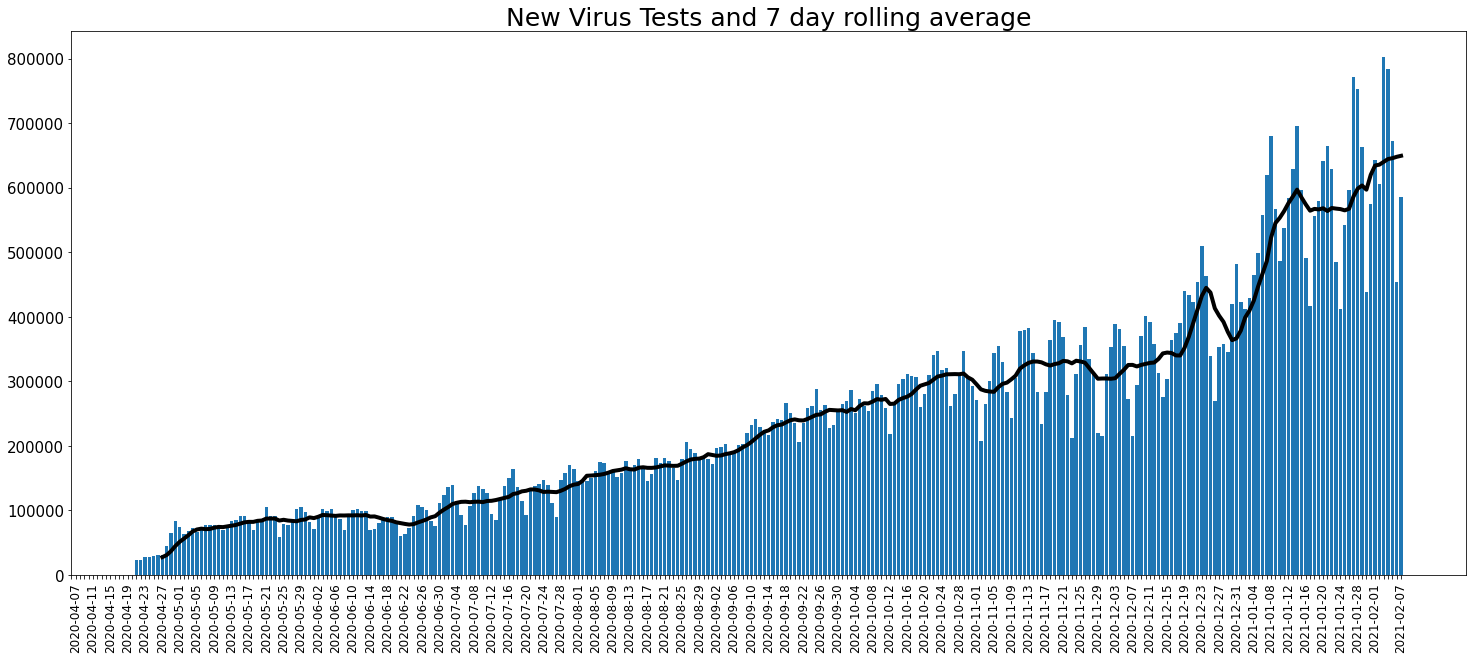

In [71]:
return1, return2, return3 = one_chart('newVirusTests', 'New Virus Tests',1,0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

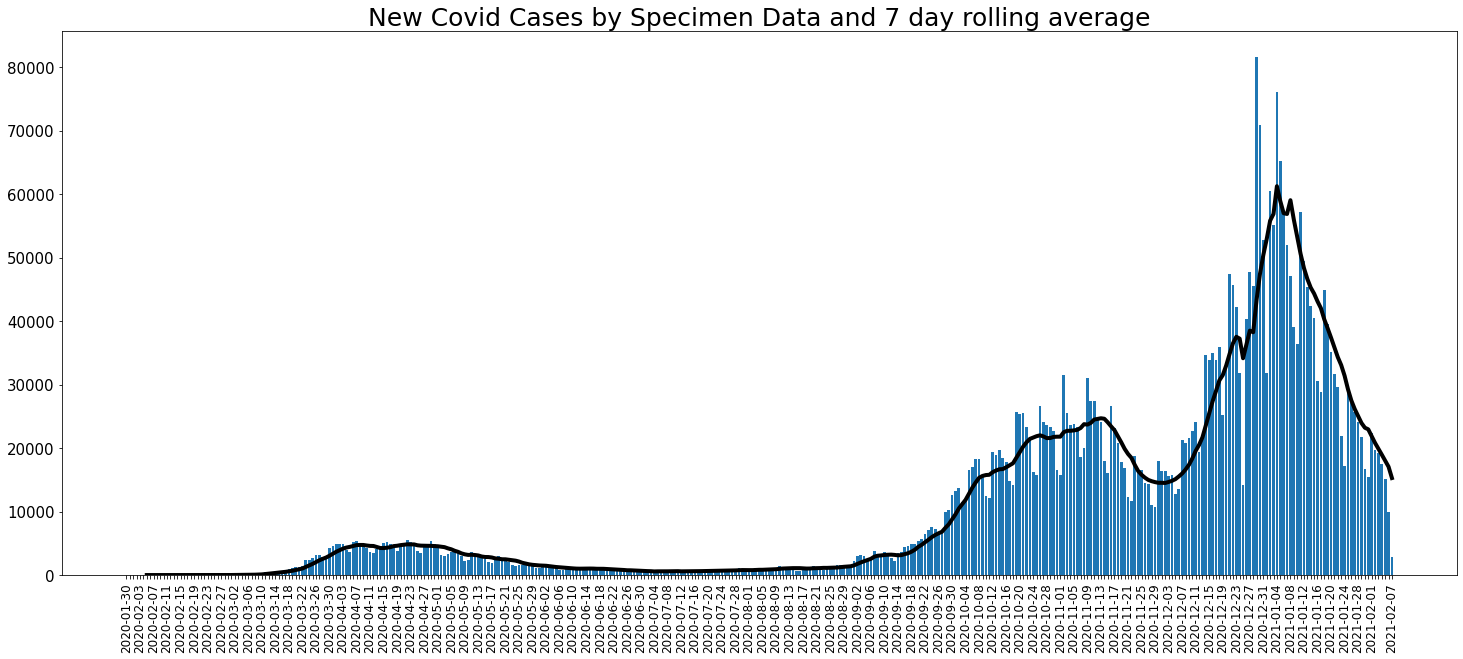

In [72]:
return1, return2, return3 = one_chart('newCasesBySpecimenDate', 'New Covid Cases by Specimen Data',1,0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

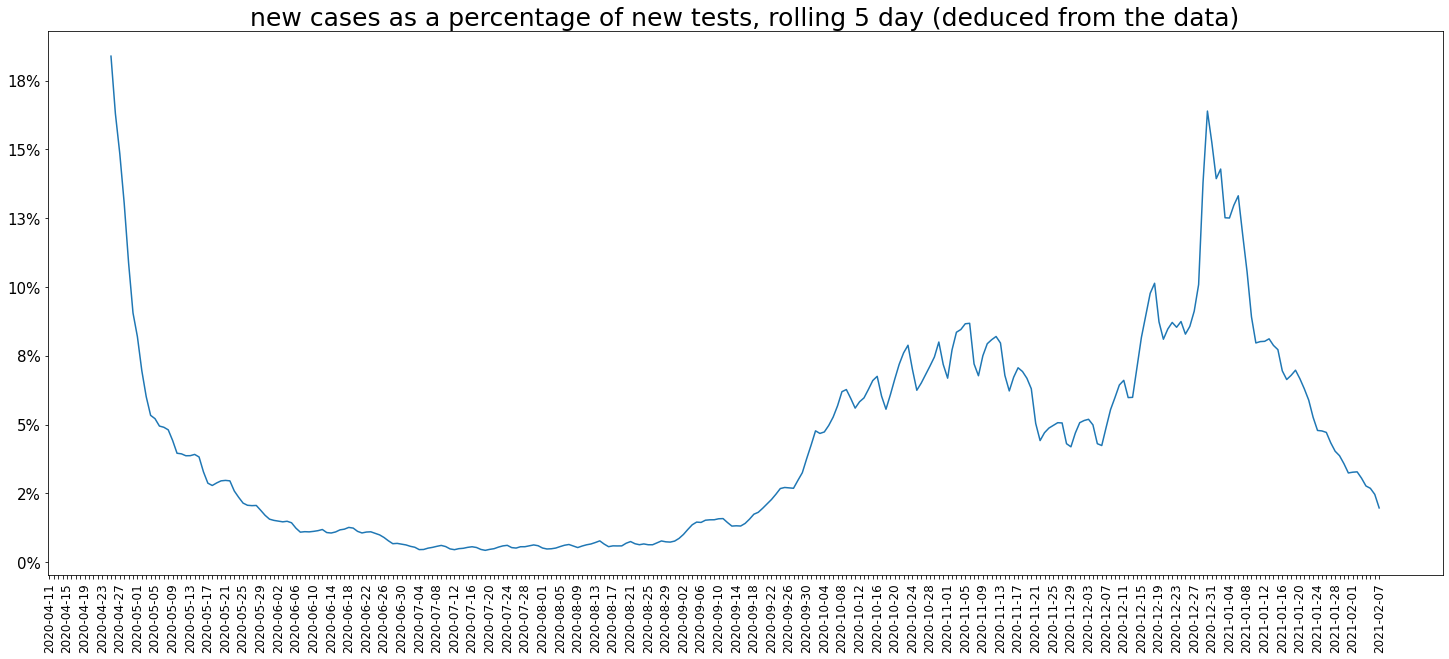

In [73]:
return1, return2, return3 = one_chart('%_positive_tests', 'new cases as a percentage of new tests, rolling 5 day (deduced from the data)',0,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

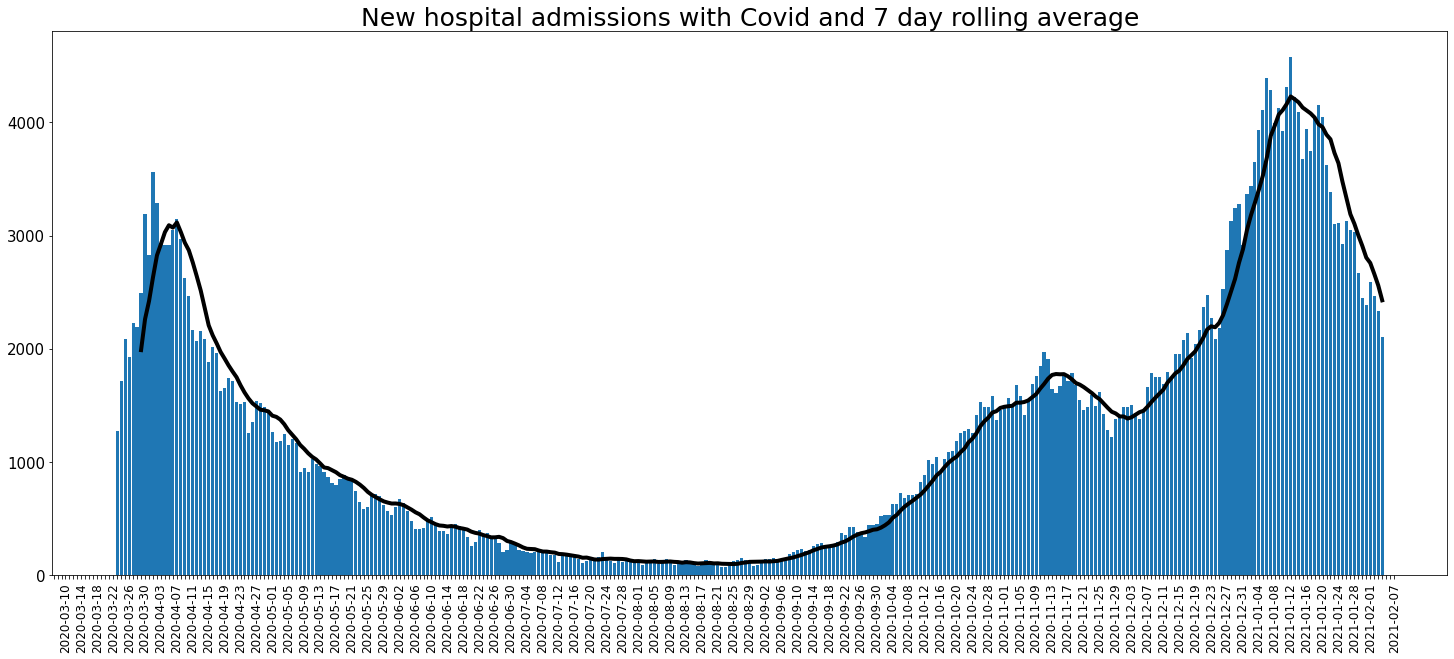

In [74]:
return1, return2, return3 = one_chart('newAdmissions', 'New hospital admissions with Covid',1,0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

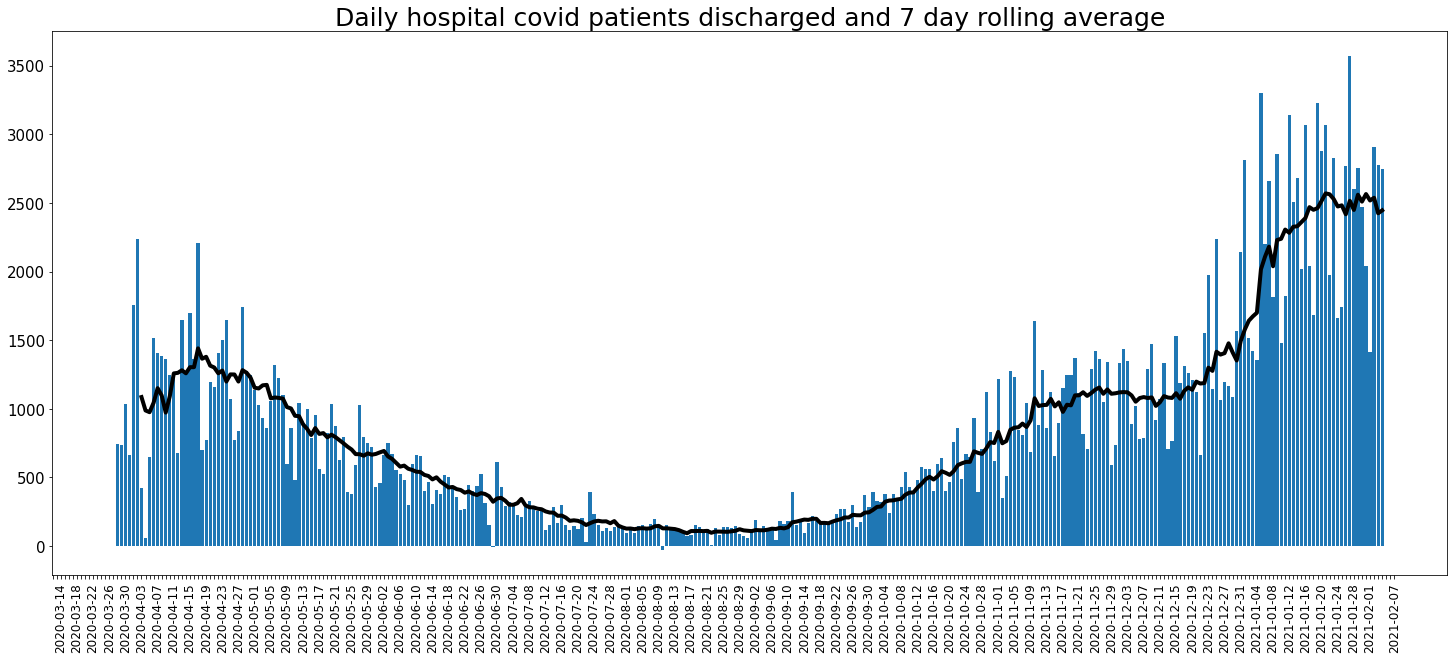

In [75]:
return1, return2, return3 = one_chart('leaving_hospital', 'Daily hospital covid patients discharged',1,0,1)

# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

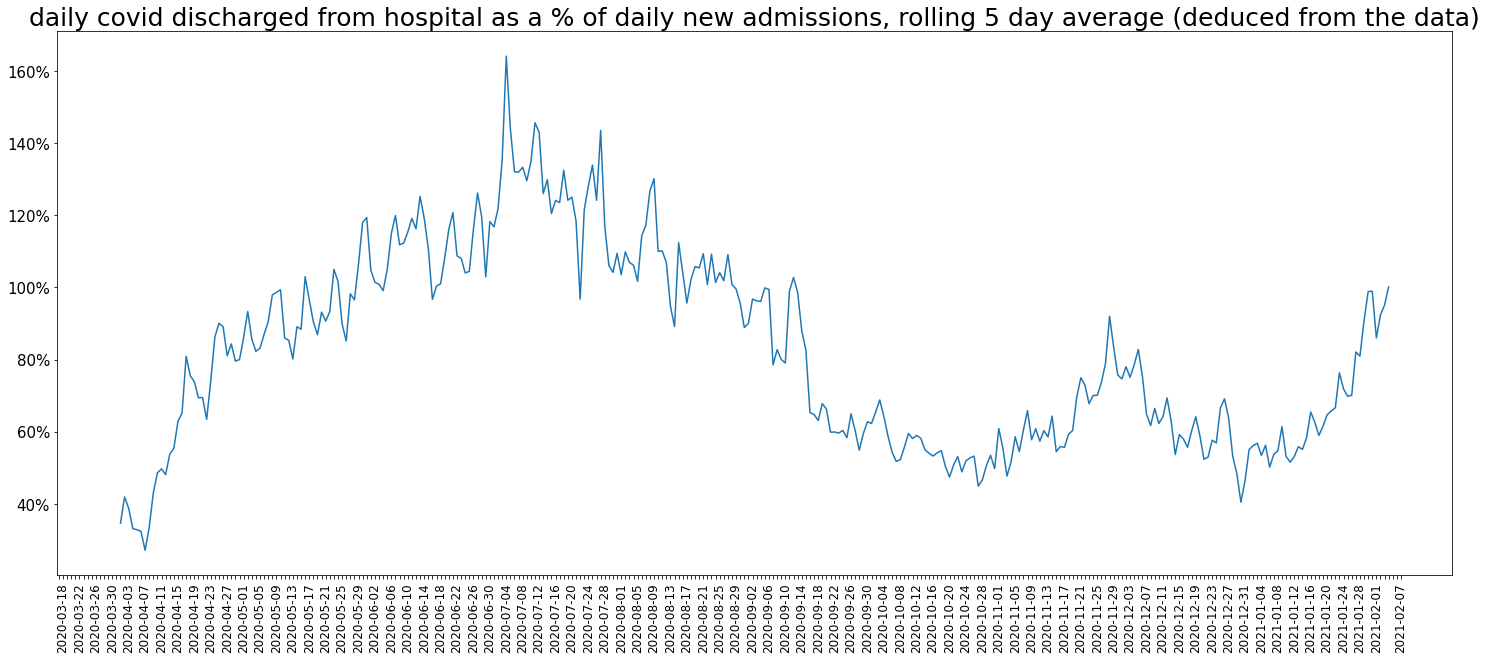

In [76]:

return1, return2, return3 = one_chart('leavers_%_admissions', 
                                      'daily covid discharged from hospital as a % of daily new admissions, rolling 5 day average (deduced from the data)',0,1,0)
# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

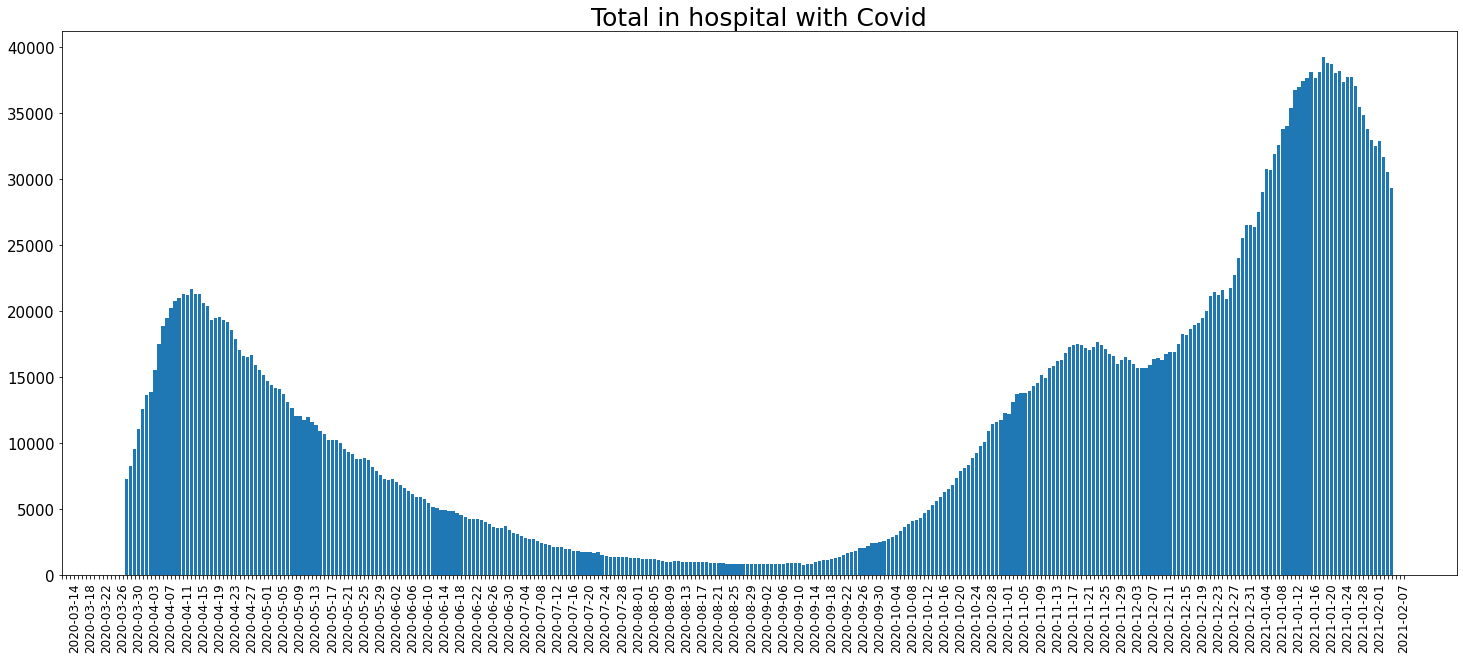

In [77]:
return1, return2, return3 = one_chart('hospitalCases', 'Total in hospital with Covid',1,0,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

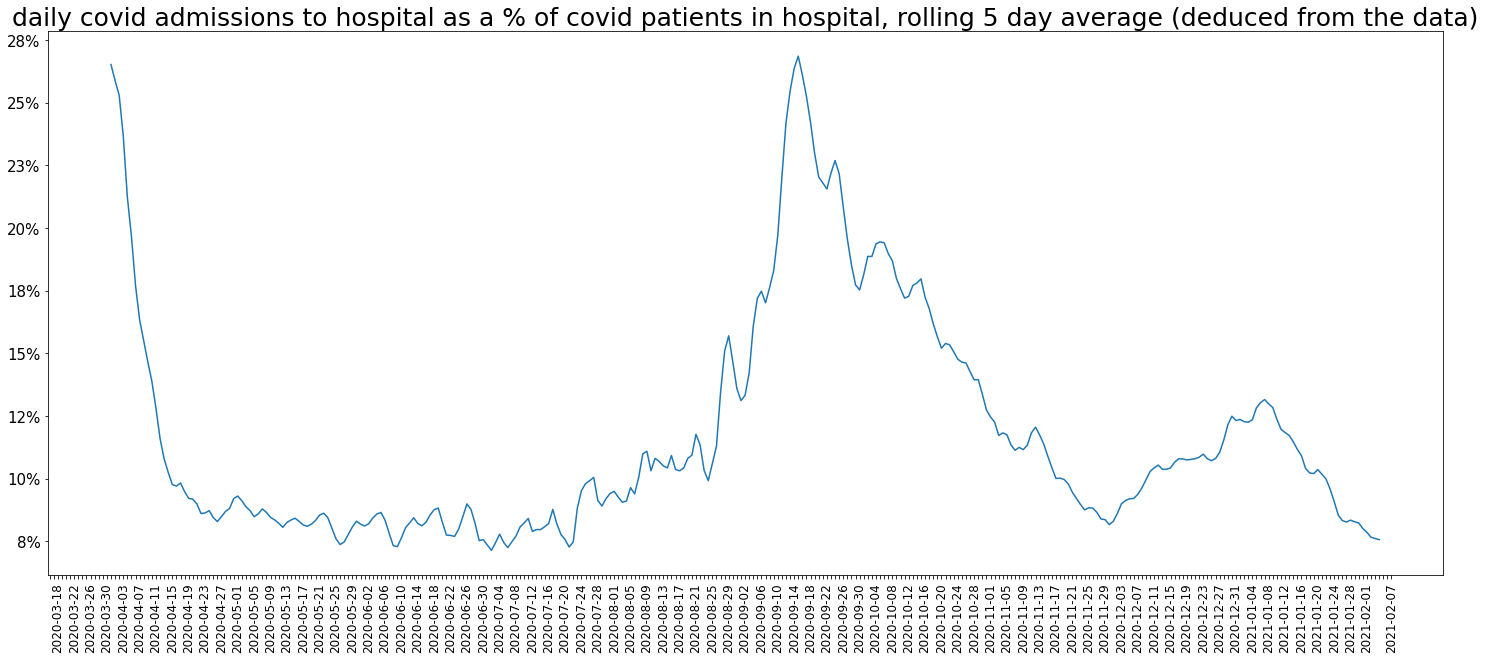

In [78]:
return1, return2, return3 = one_chart('newAdmissions%_inHospital', 
                                      'daily covid admissions to hospital as a % of covid patients in hospital, rolling 5 day average (deduced from the data)',0,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

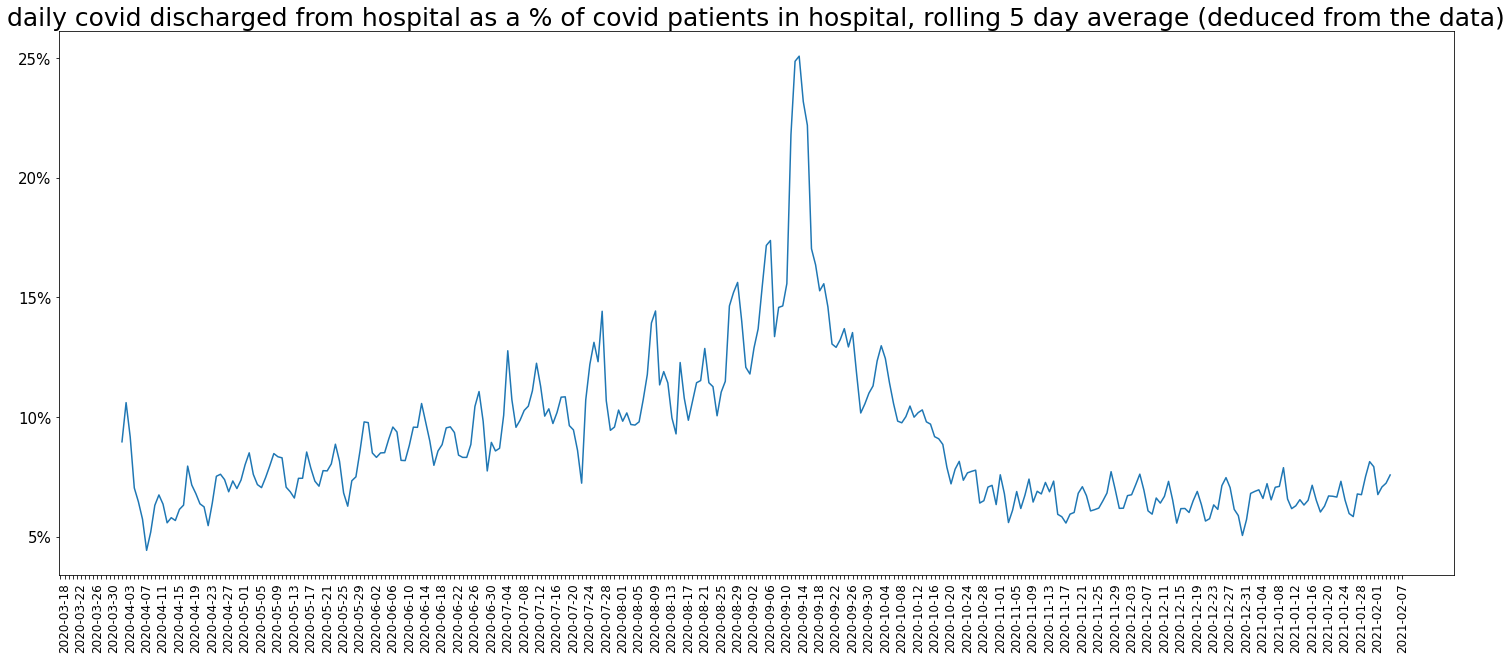

In [79]:
return1, return2, return3 = one_chart('leavers_%_inHospital', 
                                      'daily covid discharged from hospital as a % of covid patients in hospital, rolling 5 day average (deduced from the data)',0,1,0)

# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

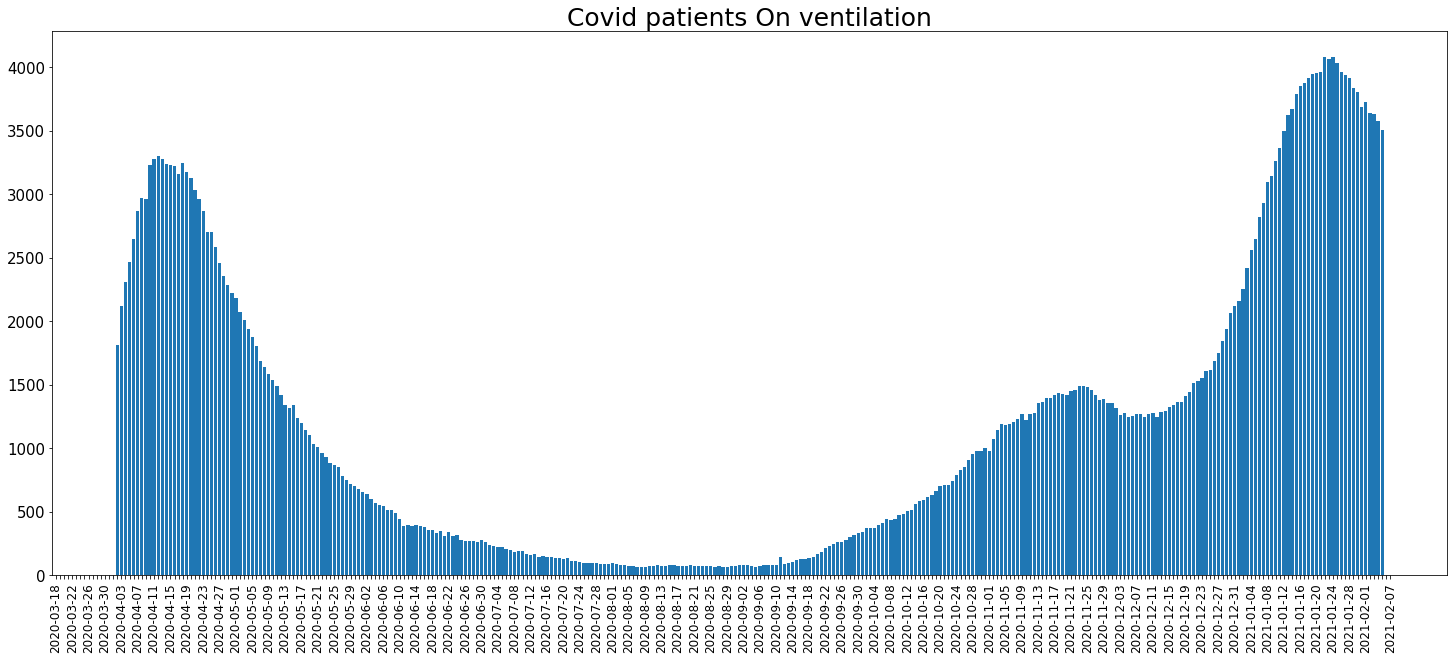

In [80]:
return1, return2, return3 = one_chart('covidOccupiedMVBeds', 'Covid patients On ventilation',1,0,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

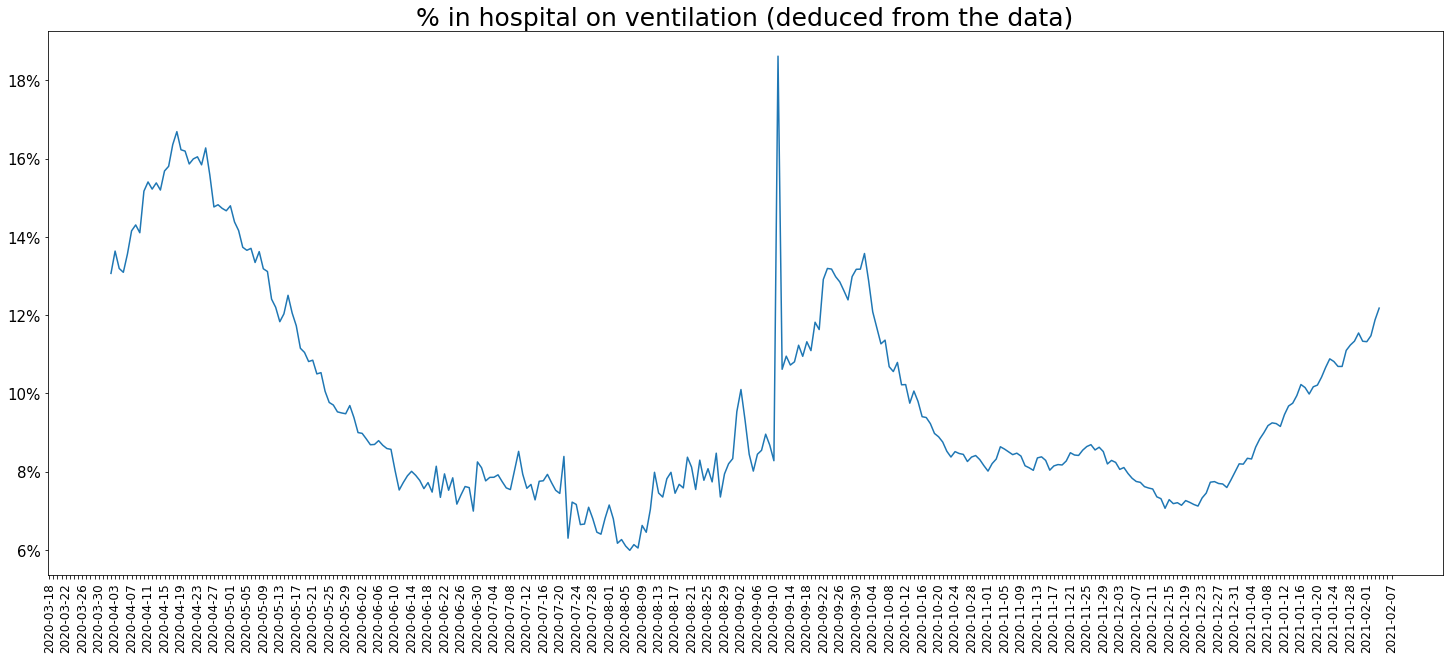

In [81]:
return1, return2, return3 = one_chart('%_on_ventilation', '% in hospital on ventilation (deduced from the data)',0,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

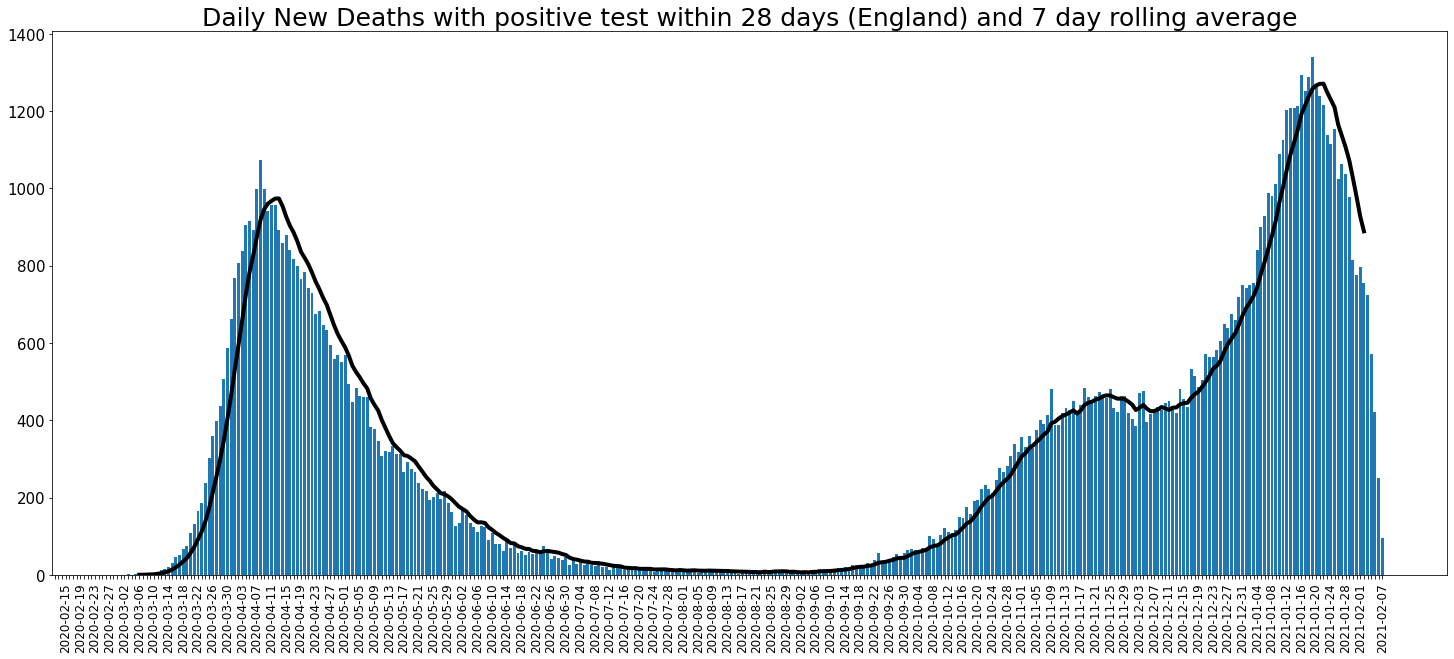

In [82]:
return1, return2, return3 = one_chart('newDeaths28DaysByDeathDate', 'Daily New Deaths with positive test within 28 days (England)',1,0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

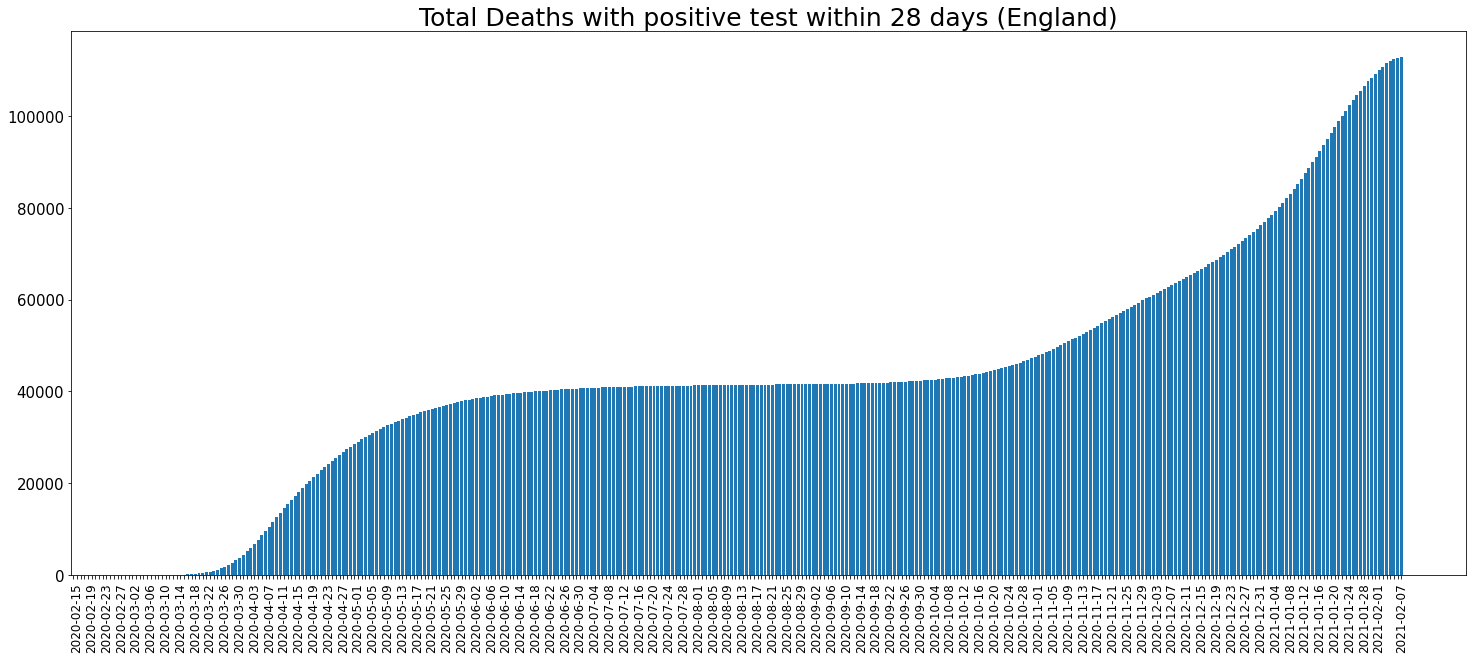

In [83]:
return1, return2, return3 = one_chart('cumDeaths28DaysByDeathDate', 'Total Deaths with positive test within 28 days (England)',1,0,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

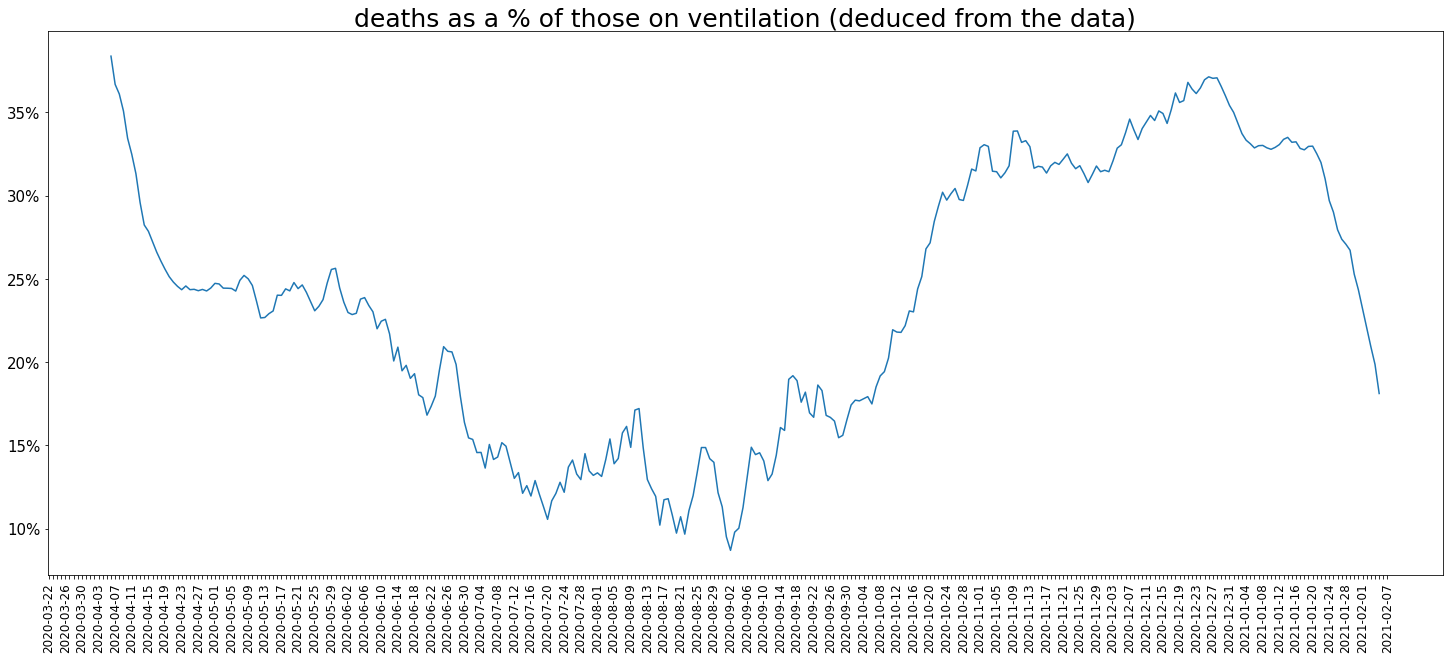

In [84]:
return1, return2, return3 = one_chart('deaths_%_vent', 'deaths as a % of those on ventilation (deduced from the data)',0,1,0)

# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

In [85]:
df_summary.tail()

date  newCasesBySpecimenDate  cumCasesBySpecimenDate  \
370  2021-02-03                   19279                 3914173   
371  2021-02-04                   17541                 3931714   
372  2021-02-05                   15140                 3946854   
373  2021-02-06                   10005                 3956859   
374  2021-02-07                    2922                 3959781   

     newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate  newAdmissions  \
370                       725.0                    111453.0         2334.0   
371                       571.0                    112024.0         2107.0   
372                       423.0                    112447.0            NaN   
373                       252.0                    112699.0            NaN   
374                        96.0                    112795.0            NaN   

     cumAdmissions  hospitalCases  covidOccupiedMVBeds  newVirusTests  \
370       408181.0        30538.0               3628.0       801949.0   
371       410288.0        29326.0               3572.0       783851.0   
372            NaN            NaN               3505.0       671585.0   
373            NaN            NaN                  NaN       454008.0   
374            NaN            NaN                  NaN       584933.0   

     cumVirusTests  %_on_ventilation  %_positive_tests  leaving_hospital  \
370     72464146.0          0.118803          0.030484            2776.0   
371     73277874.0          0.121803          0.027660            2748.0   
372     73971219.0               NaN          0.026811               NaN   
373     74437279.0               NaN          0.024609               NaN   
374     75043566.0               NaN          0.019685               NaN   

     leavers_%_admissions  newAdmissions%_inHospital  leavers_%_inHospital  \
370              0.950736                   0.076066              0.072318   
371              1.001431                   0.075639              0.075747   
372                   NaN                        NaN                   NaN   
373                   NaN                        NaN                   NaN   
374                   NaN                        NaN                   NaN   

     deaths_%_vent  newVirusTests_rolling  newCasesBySpecimenDate_rolling  \
370       0.209251          640037.000000                    19902.000000   
371       0.198619          644439.857143                    18966.714286   
372       0.181139          645712.714286                    18014.571429   
373            NaN          647855.857143                    17064.000000   
374            NaN          649416.000000                    15278.714286   

     newAdmissions_rolling  leaving_hospital_rolling  \
370            2560.285714               2424.285714   
371            2427.714286               2445.571429   
372                    NaN                       NaN   
373                    NaN                       NaN   
374                    NaN                       NaN   

     newDeaths28DaysByDeathDate_rolling  
370                                 NaN  
371                                 NaN  
372                                 NaN  
373                                 NaN  
374                                 NaN

In [86]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data for the England by Age (most upto date age related death data i can find): Cases, Hospitalisations and Deaths')
    slideText.append('')
    imagePath.append('')

plt.show()

In [87]:
# England data
# using England data given no other nation data for hospital admissions by age

# create new dataframes for deaths and cases

df_eng_cd.tail()

date areaType   areaCode areaName  \
15276  2021-02-03   nation  E92000001  England   
15277  2021-02-03   nation  E92000001  England   
15278  2021-02-03   nation  E92000001  England   
15279  2021-02-03   nation  E92000001  England   
15280  2021-02-03   nation  E92000001  England   

                                          metric    age    cases  rollingRate  \
15276  newDeaths28DaysByDeathDateAgeDemographics  20_24      NaN          0.1   
15277  newDeaths28DaysByDeathDateAgeDemographics  15_19      NaN          0.1   
15278  newDeaths28DaysByDeathDateAgeDemographics  10_14      NaN          0.0   
15279      newCasesBySpecimenDateAgeDemographics  00_59  14103.0        237.7   
15280      newCasesBySpecimenDateAgeDemographics  00_04    520.0        114.5   

       rollingSum  
15276           5  
15277           2  
15278           0  
15279      101805  
15280        3777

In [88]:
df_eng_newcasesbyage = df_eng_cd[df_eng_cd['metric'] == 'newCasesBySpecimenDateAgeDemographics'].reset_index(drop=True)
df_eng_cumdeathsbyage = df_eng_cd[df_eng_cd['metric'] == 'newDeaths28DaysByDeathDateAgeDemographics'].reset_index(drop=True)

In [89]:
df_eng_newcasesbyage.tail()

date areaType   areaCode areaName  \
8157  2021-02-03   nation  E92000001  England   
8158  2021-02-03   nation  E92000001  England   
8159  2021-02-03   nation  E92000001  England   
8160  2021-02-03   nation  E92000001  England   
8161  2021-02-03   nation  E92000001  England   

                                     metric         age    cases  rollingRate  \
8157  newCasesBySpecimenDateAgeDemographics  unassigned     17.0          NaN   
8158  newCasesBySpecimenDateAgeDemographics       50_54   1372.0        259.2   
8159  newCasesBySpecimenDateAgeDemographics         60+   3183.0        174.8   
8160  newCasesBySpecimenDateAgeDemographics       00_59  14103.0        237.7   
8161  newCasesBySpecimenDateAgeDemographics       00_04    520.0        114.5   

      rollingSum  
8157         103  
8158       10129  
8159       23536  
8160      101805  
8161        3777

In [90]:
df_eng_cumdeathsbyage.tail()

date areaType   areaCode areaName  \
7114  2021-02-03   nation  E92000001  England   
7115  2021-02-03   nation  E92000001  England   
7116  2021-02-03   nation  E92000001  England   
7117  2021-02-03   nation  E92000001  England   
7118  2021-02-03   nation  E92000001  England   

                                         metric    age  cases  rollingRate  \
7114  newDeaths28DaysByDeathDateAgeDemographics  30_34    NaN          0.3   
7115  newDeaths28DaysByDeathDateAgeDemographics  25_29    NaN          0.1   
7116  newDeaths28DaysByDeathDateAgeDemographics  20_24    NaN          0.1   
7117  newDeaths28DaysByDeathDateAgeDemographics  15_19    NaN          0.1   
7118  newDeaths28DaysByDeathDateAgeDemographics  10_14    NaN          0.0   

      rollingSum  
7114          13  
7115           5  
7116           5  
7117           2  
7118           0

In [91]:
# clean the dateframes

# delete duplicate rows
df_eng_newcasesbyage.drop_duplicates(inplace=True)
df_eng_newcasesbyage.reset_index(drop=True)

df_eng_cumdeathsbyage.drop_duplicates(inplace=True)
df_eng_cumdeathsbyage.reset_index(drop=True)

df_eng_cumadmissionsbyage.drop_duplicates(inplace=True)
df_eng_cumadmissionsbyage.reset_index(drop=True)

date areaType   areaCode areaName              metric       age  \
0     2020-03-19   nation  E92000001  England  cumAdmissionsByAge  65_to_84   
1     2020-03-19   nation  E92000001  England  cumAdmissionsByAge  18_to_64   
2     2020-03-19   nation  E92000001  England  cumAdmissionsByAge       85+   
3     2020-03-19   nation  E92000001  England  cumAdmissionsByAge    0_to_5   
4     2020-03-19   nation  E92000001  England  cumAdmissionsByAge   6_to_17   
...          ...      ...        ...      ...                 ...       ...   
1615  2021-02-05   nation  E92000001  England  cumAdmissionsByAge  65_to_84   
1616  2021-02-05   nation  E92000001  England  cumAdmissionsByAge       85+   
1617  2021-02-05   nation  E92000001  England  cumAdmissionsByAge    0_to_5   
1618  2021-02-05   nation  E92000001  England  cumAdmissionsByAge   6_to_17   
1619  2021-02-05   nation  E92000001  England  cumAdmissionsByAge  18_to_64   

        rate   value  
0        2.4     209  
1        0.5     171  
2        7.1      97  
3        0.1       4  
4        0.1       5  
...      ...     ...  
1615  1676.4  147765  
1616  5518.7   75329  
1617    58.1    2352  
1618    29.3    2316  
1619   360.9  122147  

[1620 rows x 8 columns]

In [92]:
# delete unwanted columns

df_eng_newcasesbyage = df_eng_newcasesbyage[['date', 'age', 'cases']]
df_eng_cumdeathsbyage = df_eng_cumdeathsbyage[['date', 'age', 'rollingSum']]
df_eng_cumadmissionsbyage = df_eng_cumadmissionsbyage[['date', 'age', 'value']]

In [93]:
# delete rows with NaN across 'age'

#df_eng_cumdeathsbyage = df_eng_cumdeathsbyage[df_eng_cumdeathsbyage['age'].notna()]

In [94]:
df_eng_newcasesbyage.tail()

date         age    cases
8157  2021-02-03  unassigned     17.0
8158  2021-02-03       50_54   1372.0
8159  2021-02-03         60+   3183.0
8160  2021-02-03       00_59  14103.0
8161  2021-02-03       00_04    520.0

In [95]:
df_eng_cumdeathsbyage.tail()

date    age  rollingSum
7114  2021-02-03  30_34          13
7115  2021-02-03  25_29           5
7116  2021-02-03  20_24           5
7117  2021-02-03  15_19           2
7118  2021-02-03  10_14           0

In [96]:
df_eng_cumadmissionsbyage.tail()

date       age   value
1615  2021-02-05  65_to_84  147765
1616  2021-02-05       85+   75329
1617  2021-02-05    0_to_5    2352
1618  2021-02-05   6_to_17    2316
1619  2021-02-05  18_to_64  122147

In [97]:
# create new dataframes with the age bands as the headers
# new cases

dates = df_eng_newcasesbyage['date'].tolist()
dates = list(set(dates))

df_eng_newcasesbyage_Summary = pd.DataFrame(dates, columns = ['date'])
df_eng_newcasesbyage_Summary.sort_values('date', inplace = True)
df_eng_newcasesbyage_Summary.reset_index(drop=True, inplace=True)

headers = df_eng_newcasesbyage['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_eng_newcasesbyage[df_eng_newcasesbyage['age'] == headers[i]]['cases'].tolist()
    df_eng_newcasesbyage_Summary[headers[i]] = listOfValues

#df_eng_newcasesbyage_Summary['date'] = df_eng_newcasesbyage_Summary['datetime'].dt.strftime('%d-%m-%Y')

df_eng_newcasesbyage_Summary.tail()

date    00_59  00_04  05_09  10_14  15_19   20_24   25_29   30_34  \
366  2021-01-30  12353.0  504.0  416.0  433.0  746.0  1248.0  1352.0  1505.0   
367  2021-01-31  11354.0  435.0  354.0  404.0  595.0  1076.0  1321.0  1443.0   
368  2021-02-01  16252.0  550.0  516.0  561.0  912.0  1578.0  1875.0  2007.0   
369  2021-02-02  14233.0  559.0  519.0  526.0  739.0  1384.0  1719.0  1724.0   
370  2021-02-03  14103.0  520.0  486.0  506.0  801.0  1340.0  1706.0  1749.0   

      35_39   40_44   45_49     60+   55_59  unassigned    90+  85_89  80_84  \
366  1416.0  1251.0  1194.0  2636.0  1129.0         7.0  180.0  224.0  253.0   
367  1339.0  1162.0  1118.0  2396.0   964.0         9.0  197.0  229.0  245.0   
368  1845.0  1631.0  1575.0  3886.0  1511.0        17.0  426.0  397.0  381.0   
369  1602.0  1390.0  1372.0  3358.0  1298.0        14.0  405.0  333.0  383.0   
370  1672.0  1393.0  1322.0  3183.0  1219.0        17.0  311.0  323.0  337.0   

      50_54  70_74  65_69   60_64  75_79  
366  1152.0  382.0  487.0   819.0  291.0  
367  1134.0  338.0  426.0   705.0  256.0  
368  1674.0  494.0  654.0  1120.0  414.0  
369  1387.0  395.0  535.0   940.0  367.0  
370  1372.0  431.0  557.0   904.0  320.0

In [98]:
# create new dataframes with the age bands as the headers
# cum deaths

dates = df_eng_cumdeathsbyage['date'].tolist()
dates = list(set(dates))

df_eng_cumdeathsbyage_Summary = pd.DataFrame(dates, columns = ['date'])
df_eng_cumdeathsbyage_Summary.sort_values('date', inplace = True)
df_eng_cumdeathsbyage_Summary.reset_index(drop=True, inplace=True)

headers = df_eng_cumdeathsbyage['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_eng_cumdeathsbyage[df_eng_cumdeathsbyage['age'] == headers[i]]['rollingSum'].tolist()
    df_eng_cumdeathsbyage_Summary[headers[i]] = listOfValues

#df_eng_cumdeathsbyage_Summary['date'] = df_eng_cumdeathsbyage_Summary['datetime'].dt.strftime('%d-%m-%Y')

df_eng_cumdeathsbyage_Summary.tail()

date  00_04  00_59   60+   90+  85_89  80_84  75_79  70_74  65_69  \
334  2021-01-30      1    433  6064  1518   1341   1089    816    604    469   
335  2021-01-31      1    418  5774  1447   1238   1047    797    587    437   
336  2021-02-01      1    383  5468  1335   1167   1009    760    557    421   
337  2021-02-02      1    370  5233  1260   1136    948    732    531    405   
338  2021-02-03      1    362  4935  1173   1055    893    703    530    374   

     60_64  05_09  50_54  10_14  15_19  20_24  25_29  55_59  35_39  40_44  \
334    227      0    117      0      0      5      3    183     22     25   
335    221      1    110      0      0      5      4    171     19     24   
336    219      1     99      0      0      5      4    152     14     27   
337    221      1     95      0      0      6      5    144     12     27   
338    207      1     93      0      2      5      5    129     15     32   

     45_49  30_34  
334     61     16  
335     68     15  
336     67     13  
337     66     13  
338     66     13

In [99]:
# convert the rolling deaths into daily deaths

def rolling_to_new(column_name):

    newdeaths = [0]*6   
    for i in range(6,len(df_eng_cumdeathsbyage_Summary)):
        newdaydeaths = df_eng_cumdeathsbyage_Summary[column_name].iloc[i] - df_eng_cumdeathsbyage_Summary[column_name].iloc[i-1] + newdeaths[i-7]
        newdeaths.append(newdaydeaths)

    df_eng_cumdeathsbyage_Summary[column_name + '_new'] = newdeaths

In [100]:
col_names = df_eng_cumdeathsbyage_Summary.columns[1:].tolist()

for i in range(len(col_names)):
    rolling_to_new(col_names[i])

In [101]:
df_eng_cumdeathsbyage_Summary.tail()

date  00_04  00_59   60+   90+  85_89  80_84  75_79  70_74  65_69  \
334  2021-01-30      1    433  6064  1518   1341   1089    816    604    469   
335  2021-01-31      1    418  5774  1447   1238   1047    797    587    437   
336  2021-02-01      1    383  5468  1335   1167   1009    760    557    421   
337  2021-02-02      1    370  5233  1260   1136    948    732    531    405   
338  2021-02-03      1    362  4935  1173   1055    893    703    530    374   

     60_64  05_09  50_54  10_14  15_19  20_24  25_29  55_59  35_39  40_44  \
334    227      0    117      0      0      5      3    183     22     25   
335    221      1    110      0      0      5      4    171     19     24   
336    219      1     99      0      0      5      4    152     14     27   
337    221      1     95      0      0      6      5    144     12     27   
338    207      1     93      0      2      5      5    129     15     32   

     45_49  30_34  00_04_new  00_59_new  60+_new  90+_new  85_89_new  \
334     61     16          0         56      683      178        148   
335     68     15          0         51      654      155        127   
336     67     13          0         40      678      152        145   
337     66     13          0         50      624      145        148   
338     66     13          0         47      613      147        120   

     80_84_new  75_79_new  70_74_new  65_69_new  60_64_new  05_09_new  \
334        125         89         72         49         22          0   
335        136        100         64         52         20          1   
336        118         96         76         57         34          0   
337         95         85         67         50         34          0   
338        109         92         80         37         28          0   

     50_54_new  10_14_new  15_19_new  20_24_new  25_29_new  55_59_new  \
334         13          0          0          1          1         22   
335         12          0          0          1          1         19   
336         10          0          0          0          1         11   
337         14          0          0          1          2         19   
338         14          0          2          0          0         12   

     35_39_new  40_44_new  45_49_new  30_34_new  
334          3          2         11          3  
335          0          3         11          3  
336          1          5         11          1  
337          0          4          9          1  
338          6          8          5          0

In [102]:
# create new dataframes with the age bands as the headers
# cum admissions

dates = df_eng_cumadmissionsbyage['date'].tolist()
dates = list(set(dates))

df_eng_cumadmissionsbyage_Summary = pd.DataFrame(dates, columns = ['date'])
df_eng_cumadmissionsbyage_Summary.sort_values('date', inplace = True)
df_eng_cumadmissionsbyage_Summary.reset_index(drop=True, inplace=True)

headers = df_eng_cumadmissionsbyage['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_eng_cumadmissionsbyage[df_eng_cumadmissionsbyage['age'] == headers[i]]['value'].tolist()
    df_eng_cumadmissionsbyage_Summary[headers[i]] = listOfValues

#df_eng_cumadmissionsbyage_Summary['date'] = df_eng_cumadmissionsbyage_Summary['datetime'].dt.strftime('%d-%m-%Y')

df_eng_cumadmissionsbyage_Summary.tail()

date  65_to_84  18_to_64    85+  0_to_5  6_to_17
319  2021-02-01    144492    119178  73713    2294     2252
320  2021-02-02    145440    119956  74170    2317     2268
321  2021-02-03    146302    120722  74609    2328     2286
322  2021-02-04    147073    121453  74986    2340     2301
323  2021-02-05    147765    122147  75329    2352     2316

In [103]:
# convert the cum admissions into daily admissions

def cum_to_new(column_name):

    newadmissions = []
    newadmissions.append(df_eng_cumadmissionsbyage_Summary[column_name][0])
    for i in range(1,len(df_eng_cumadmissionsbyage_Summary)):
        newdayadmissions = df_eng_cumadmissionsbyage_Summary[column_name].iloc[i] - df_eng_cumadmissionsbyage_Summary[column_name].iloc[i-1]
        newadmissions.append(newdayadmissions)

    df_eng_cumadmissionsbyage_Summary[column_name + '_new'] = newadmissions

In [104]:
col_names = df_eng_cumadmissionsbyage_Summary.columns[1:].tolist()

for i in range(len(col_names)):
    cum_to_new(col_names[i])

In [105]:
df_eng_cumadmissionsbyage_Summary.head()

date  65_to_84  18_to_64  85+  0_to_5  6_to_17  65_to_84_new  \
0  2020-03-19       209       171   97       4        5           209   
1  2020-03-20       445       384  213       4       13           236   
2  2020-03-21       695       618  340       5       16           250   
3  2020-03-22      1024       856  469      10       17           329   
4  2020-03-23      1471      1200  650      16       23           447   

   18_to_64_new  85+_new  0_to_5_new  6_to_17_new  
0           171       97           4            5  
1           213      116           0            8  
2           234      127           1            3  
3           238      129           5            1  
4           344      181           6            6

In [106]:
# create new columns in the other two dataframes to match the admissions ages

In [107]:
def create_new_columns(df, newcol,name):

    df[name] = 0

    for i in range(len(newcol)):
        df[name] = df[name] + df[newcol[i]]


In [108]:
nursery = ['00_04']
school = ['15_19','10_14','05_09']
working = ['60_64', '55_59', '50_54','45_49','40_44','35_39','30_34','25_29','20_24']
old = ['80_84','75_79','70_74','65_69']
older = ['90+','85_89']

In [109]:
create_new_columns(df_eng_newcasesbyage_Summary,nursery,'00_04_')
create_new_columns(df_eng_newcasesbyage_Summary,school,'05_19_')
create_new_columns(df_eng_newcasesbyage_Summary,working,'20_64_')
create_new_columns(df_eng_newcasesbyage_Summary,old,'65_84_')
create_new_columns(df_eng_newcasesbyage_Summary,older,'85+_')

In [110]:
nursery = ['00_04_new']
school = ['15_19_new','10_14_new','05_09_new']
working = ['60_64_new', '55_59_new', '50_54_new','45_49_new','40_44_new','35_39_new','30_34_new','25_29_new','20_24_new']
old = ['80_84_new','75_79_new','70_74_new','65_69_new']
older = ['90+_new','85_89_new']

In [111]:
create_new_columns(df_eng_cumdeathsbyage_Summary,nursery,'00_04_')
create_new_columns(df_eng_cumdeathsbyage_Summary,school,'05_19_')
create_new_columns(df_eng_cumdeathsbyage_Summary,working,'20_64_')
create_new_columns(df_eng_cumdeathsbyage_Summary,old,'65_84_')
create_new_columns(df_eng_cumdeathsbyage_Summary,older,'85+_')

In [112]:
# add rolling mean 7 day columns

columns1 = ['00_04_','05_19_','20_64_','65_84_','85+_']
columns2 = ['0_to_5_new','6_to_17_new','18_to_64_new',
            '65_to_84_new','85+_new']

for i in range(len(columns1)):
    df_eng_newcasesbyage_Summary[columns1[i] + 'rolling7'] = df_eng_newcasesbyage_Summary[columns1[i]].rolling(7).mean()
    df_eng_cumdeathsbyage_Summary[columns1[i] + 'rolling7'] = df_eng_cumdeathsbyage_Summary[columns1[i]].rolling(7).mean()

for i in range(len(columns2)):
    df_eng_cumadmissionsbyage_Summary[columns2[i] + 'rolling7'] = df_eng_cumadmissionsbyage_Summary[columns2[i]].rolling(7).mean()


In [113]:
# add cumulative columns

columns1 = ['00_04_','05_19_','20_64_','65_84_','85+_']
columns2 = ['0_to_5_new','6_to_17_new','18_to_64_new',
            '65_to_84_new','85+_new']

for i in range(len(columns1)):
    df_eng_newcasesbyage_Summary[columns1[i] + 'cumsum'] = df_eng_newcasesbyage_Summary[columns1[i]].cumsum()
    df_eng_cumdeathsbyage_Summary[columns1[i] + 'cumsum'] = df_eng_cumdeathsbyage_Summary[columns1[i]].cumsum()

for i in range(len(columns2)):
    df_eng_cumadmissionsbyage_Summary[columns2[i] + 'cumsum'] = df_eng_cumadmissionsbyage_Summary[columns2[i]].cumsum()


In [114]:
df_eng_newcasesbyage_Summary.head()

date  00_59  00_04  05_09  10_14  15_19  20_24  25_29  30_34  35_39  \
0  2020-01-30    2.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
1  2020-01-31    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  2020-02-01    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  2020-02-02    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  2020-02-03    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   40_44  45_49  60+  55_59  unassigned  90+  85_89  80_84  50_54  70_74  \
0    0.0    0.0  0.0    0.0         0.0  0.0    0.0    0.0    1.0    0.0   
1    0.0    0.0  2.0    0.0         0.0  0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0  1.0    0.0         0.0  0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0  1.0    0.0         0.0  0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0  0.0    0.0         0.0  0.0    0.0    0.0    0.0    0.0   

   65_69  60_64  75_79  00_04_  05_19_  20_64_  65_84_  85+_  00_04_rolling7  \
0    0.0    0.0    0.0     0.0     0.0     2.0     0.0   0.0             NaN   
1    0.0    2.0    0.0     0.0     0.0     2.0     0.0   0.0             NaN   
2    1.0    0.0    0.0     0.0     0.0     0.0     1.0   0.0             NaN   
3    1.0    0.0    0.0     0.0     0.0     0.0     1.0   0.0             NaN   
4    0.0    0.0    0.0     0.0     0.0     0.0     0.0   0.0             NaN   

   05_19_rolling7  20_64_rolling7  65_84_rolling7  85+_rolling7  00_04_cumsum  \
0             NaN             NaN             NaN           NaN           0.0   
1             NaN             NaN             NaN           NaN           0.0   
2             NaN             NaN             NaN           NaN           0.0   
3             NaN             NaN             NaN           NaN           0.0   
4             NaN             NaN             NaN           NaN           0.0   

   05_19_cumsum  20_64_cumsum  65_84_cumsum  85+_cumsum  
0           0.0           2.0           0.0         0.0  
1           0.0           4.0           0.0         0.0  
2           0.0           4.0           1.0         0.0  
3           0.0           4.0           2.0         0.0  
4           0.0           4.0           2.0         0.0

In [115]:
df_eng_cumadmissionsbyage_Summary.head()

date  65_to_84  18_to_64  85+  0_to_5  6_to_17  65_to_84_new  \
0  2020-03-19       209       171   97       4        5           209   
1  2020-03-20       445       384  213       4       13           236   
2  2020-03-21       695       618  340       5       16           250   
3  2020-03-22      1024       856  469      10       17           329   
4  2020-03-23      1471      1200  650      16       23           447   

   18_to_64_new  85+_new  0_to_5_new  6_to_17_new  0_to_5_newrolling7  \
0           171       97           4            5                 NaN   
1           213      116           0            8                 NaN   
2           234      127           1            3                 NaN   
3           238      129           5            1                 NaN   
4           344      181           6            6                 NaN   

   6_to_17_newrolling7  18_to_64_newrolling7  65_to_84_newrolling7  \
0                  NaN                   NaN                   NaN   
1                  NaN                   NaN                   NaN   
2                  NaN                   NaN                   NaN   
3                  NaN                   NaN                   NaN   
4                  NaN                   NaN                   NaN   

   85+_newrolling7  0_to_5_newcumsum  6_to_17_newcumsum  18_to_64_newcumsum  \
0              NaN                 4                  5                 171   
1              NaN                 4                 13                 384   
2              NaN                 5                 16                 618   
3              NaN                10                 17                 856   
4              NaN                16                 23                1200   

   65_to_84_newcumsum  85+_newcumsum  
0                 209             97  
1                 445            213  
2                 695            340  
3                1024            469  
4                1471            650

In [116]:
df_eng_cumdeathsbyage_Summary.head()

date  00_04  00_59  60+  90+  85_89  80_84  75_79  70_74  65_69  \
0  2020-03-02      0      0    0    0      0      0      0      0      0   
1  2020-03-03      0      0    0    0      0      0      0      0      0   
2  2020-03-04      0      0    0    0      0      0      0      0      0   
3  2020-03-05      0      0    0    0      0      0      0      0      0   
4  2020-03-06      0      0    0    0      0      0      0      0      0   

   60_64  05_09  50_54  10_14  15_19  20_24  25_29  55_59  35_39  40_44  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   45_49  30_34  00_04_new  00_59_new  60+_new  90+_new  85_89_new  80_84_new  \
0      0      0          0          0        0        0          0          0   
1      0      0          0          0        0        0          0          0   
2      0      0          0          0        0        0          0          0   
3      0      0          0          0        0        0          0          0   
4      0      0          0          0        0        0          0          0   

   75_79_new  70_74_new  65_69_new  60_64_new  05_09_new  50_54_new  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   10_14_new  15_19_new  20_24_new  25_29_new  55_59_new  35_39_new  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   40_44_new  45_49_new  30_34_new  00_04_  05_19_  20_64_  65_84_  85+_  \
0          0          0          0       0       0       0       0     0   
1          0          0          0       0       0       0       0     0   
2          0          0          0       0       0       0       0     0   
3          0          0          0       0       0       0       0     0   
4          0          0          0       0       0       0       0     0   

   00_04_rolling7  05_19_rolling7  20_64_rolling7  65_84_rolling7  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   85+_rolling7  00_04_cumsum  05_19_cumsum  20_64_cumsum  65_84_cumsum  \
0           NaN             0             0             0             0   
1           NaN             0             0             0             0   
2           NaN             0             0             0             0   
3           NaN             0             0             0             0   
4           NaN             0             0             0             0   

   85+_cumsum  
0           0  
1           0  
2           0  
3           0  
4           0

In [117]:
test1='abc_'
if '%' in test1:
    print('yes')
else:
    print('no')

no


In [118]:
def multiple_line_charts(df, columns, legend_labels, chart_title):

    # plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

    fig, ax = plt.subplots(figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.2)

    x = df.index.values

    labels = list(df['date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    ax.set_title(chart_title, fontsize=25)
    ax.set_xticklabels(labels, rotation=90, fontsize=12)
    ax.set_xticks(x)
    
    if '%' in chart_title:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    
    ax.yaxis.set_tick_params(labelsize=15)
    
    for i in range(len(columns)):
        y1 = df[columns[i]]
        ax.plot(x, y1, label = legend_labels[i])
    
    ax.legend(fontsize=20)

    # if savePNG == 1 or PwrptPrep == 1:
    #     savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units.png'
    #     plt.savefig(savefig, bbox_inches = 'tight')    
    #     slideTitle.append('Weekly offers on the site as a % of all units')
    #     slideText.append(str(first_data) + ' to '+ str(monthNow))
    #     imagePath.append(savefig)

    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]
    
    fileName = 'Coviduk - multiple_line_charts ' + str(chart_title) + '.png'  
    
    
    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName.split('202')[0] + '.png', bbox_inches = 'tight')
    
    slideTitle_ = chart_title
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName.split('202')[0] + '.png')  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_    


In [119]:
columns = ['00_04_rolling7','05_19_rolling7','20_64_rolling7',
           '65_84_rolling7','85+_rolling7']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

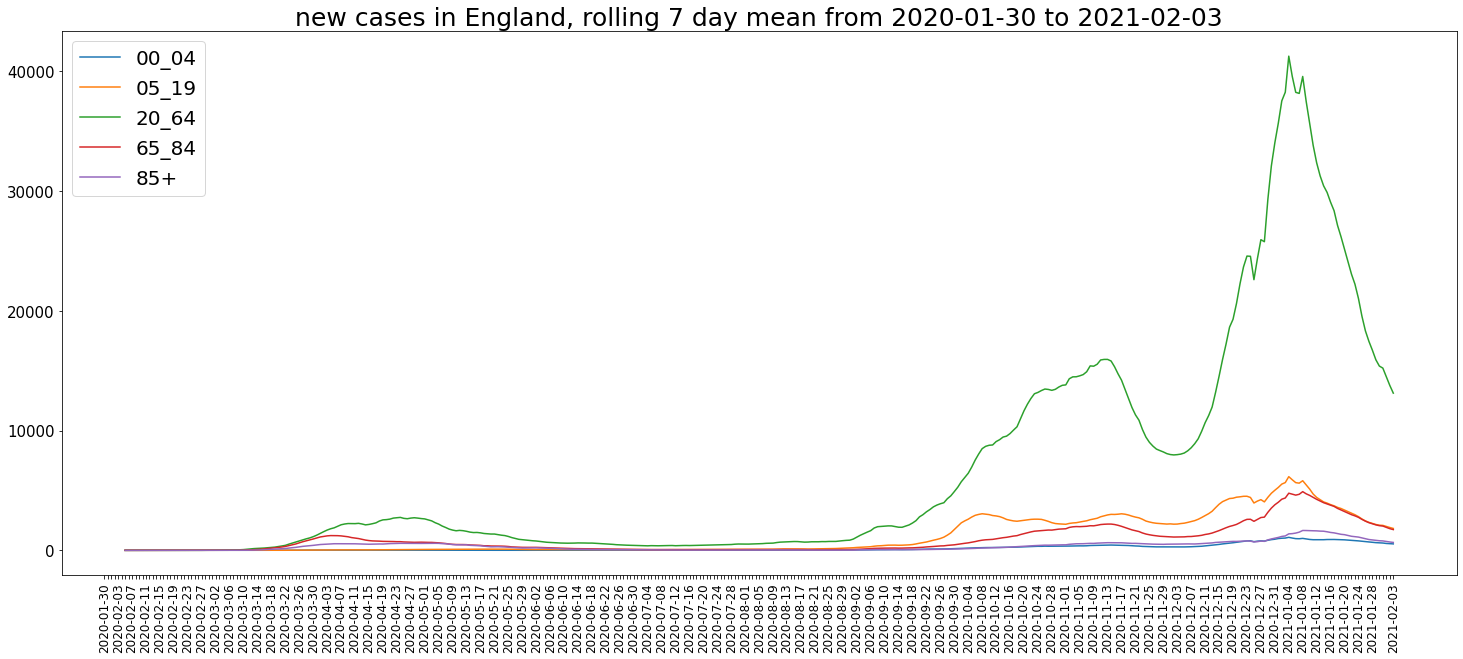

In [120]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'new cases in England, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [121]:
columns = ['00_04_rolling7','05_19_rolling7',
           '65_84_rolling7','85+_rolling7']
chart_titles = ['00_04','05_19','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

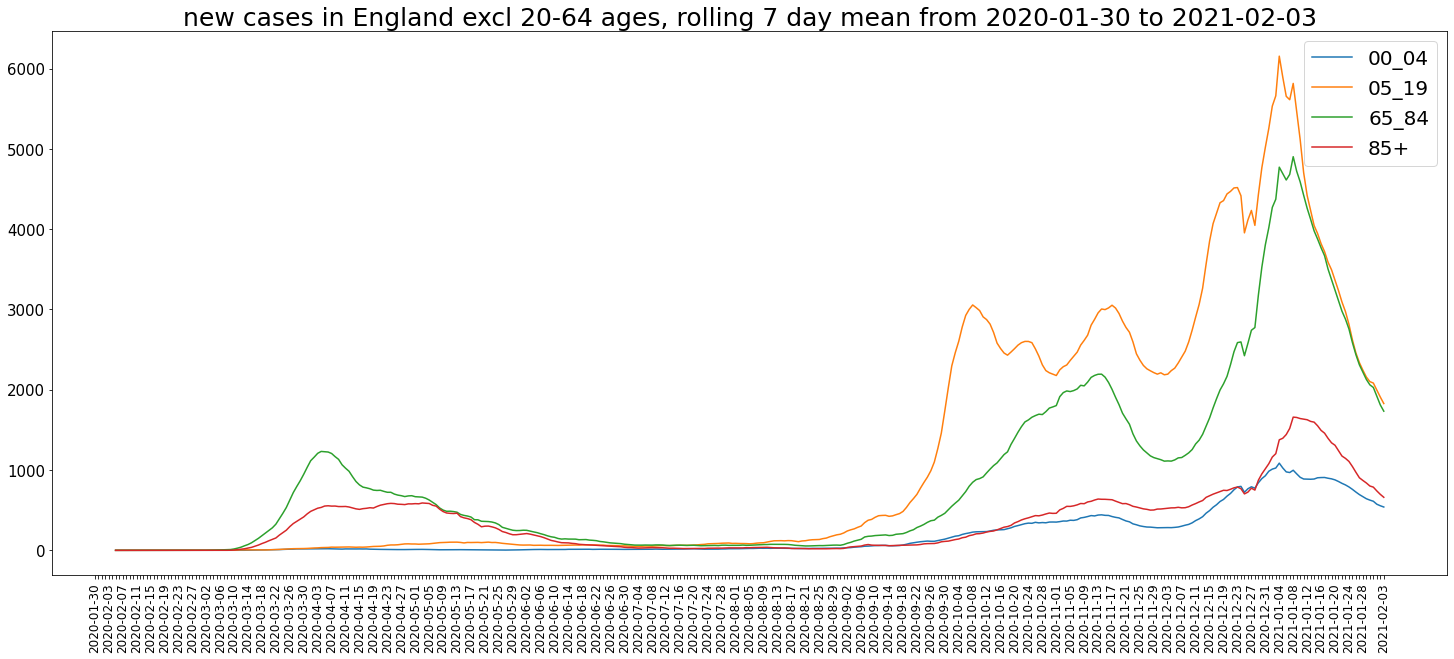

In [122]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'new cases in England excl 20-64 ages, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [123]:
columns = ['0_to_5_newrolling7','6_to_17_newrolling7','18_to_64_newrolling7',
            '65_to_84_newrolling7','85+_newrolling7']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[-1]

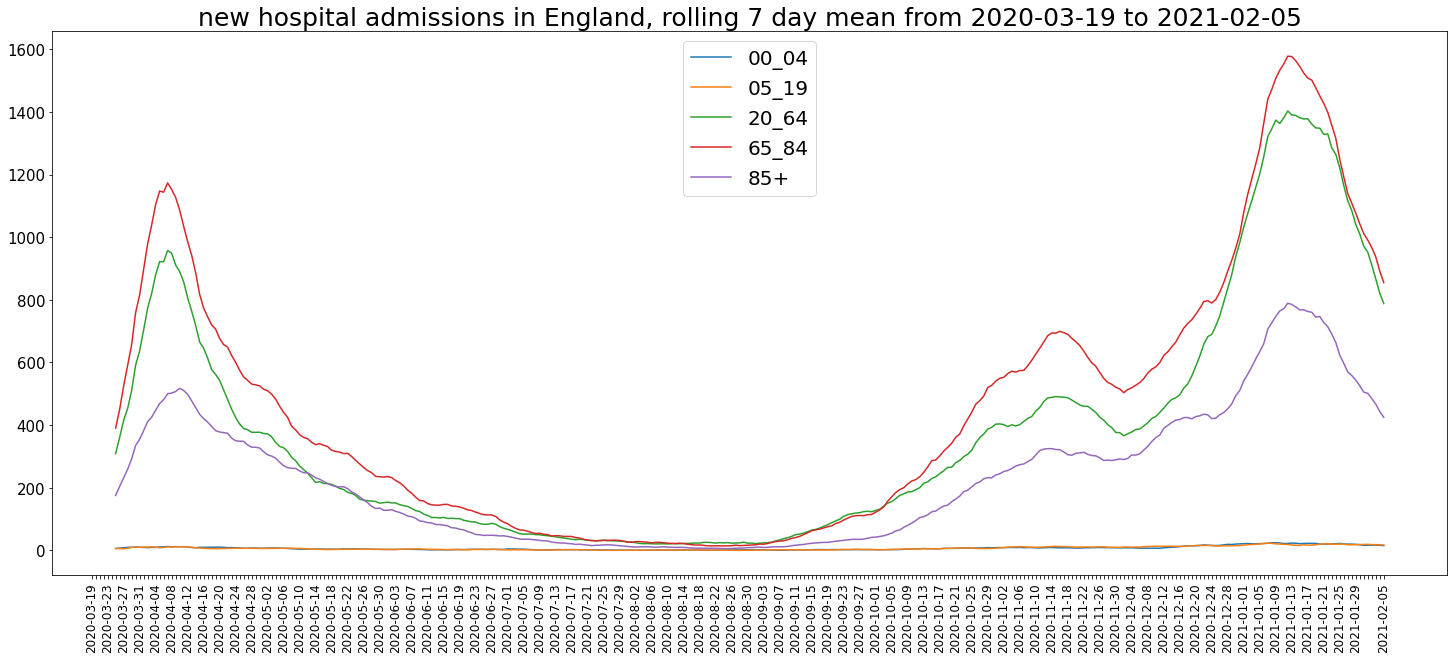

In [124]:
return1, return2, return3 = multiple_line_charts(df_eng_cumadmissionsbyage_Summary, columns, chart_titles, 
                                                 'new hospital admissions in England, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [125]:
columns = ['00_04_rolling7','05_19_rolling7','20_64_rolling7',
           '65_84_rolling7','85+_rolling7']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

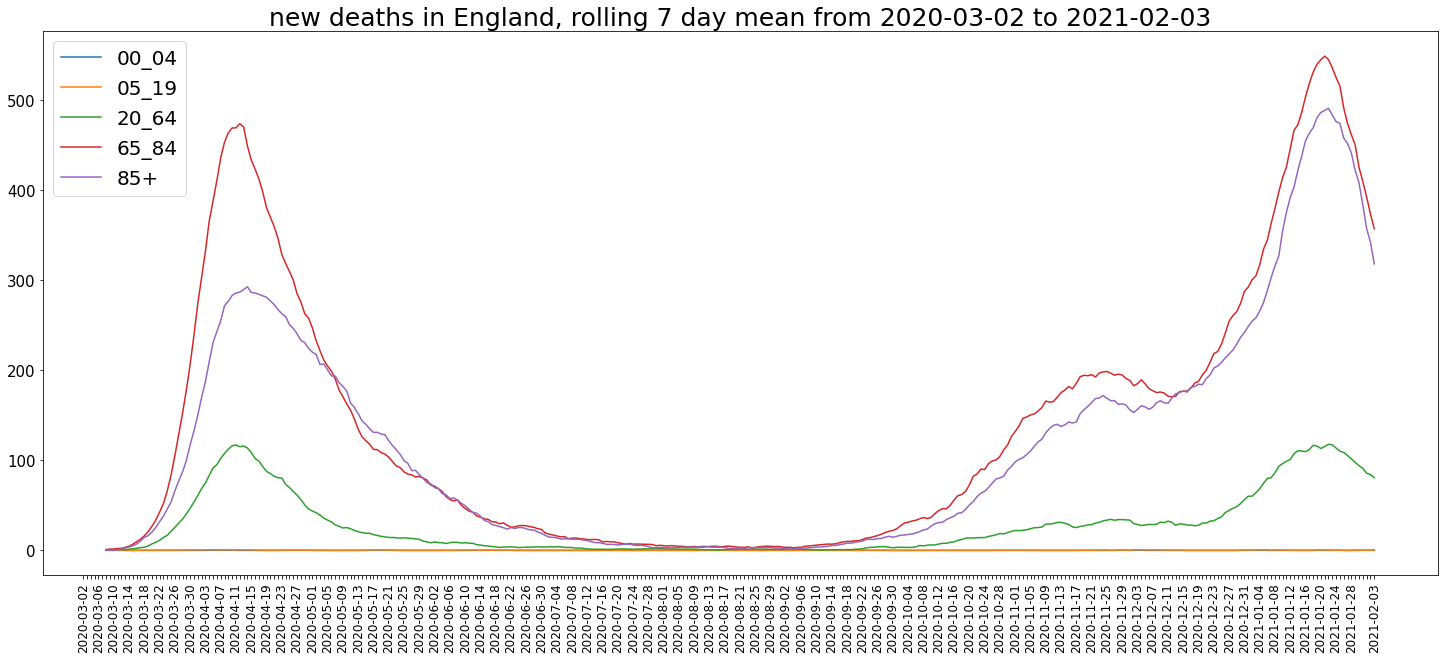

In [126]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'new deaths in England, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [127]:
columns = ['00_04_rolling7','05_19_rolling7','20_64_rolling7']
chart_titles = ['00_04','05_19','20_64']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

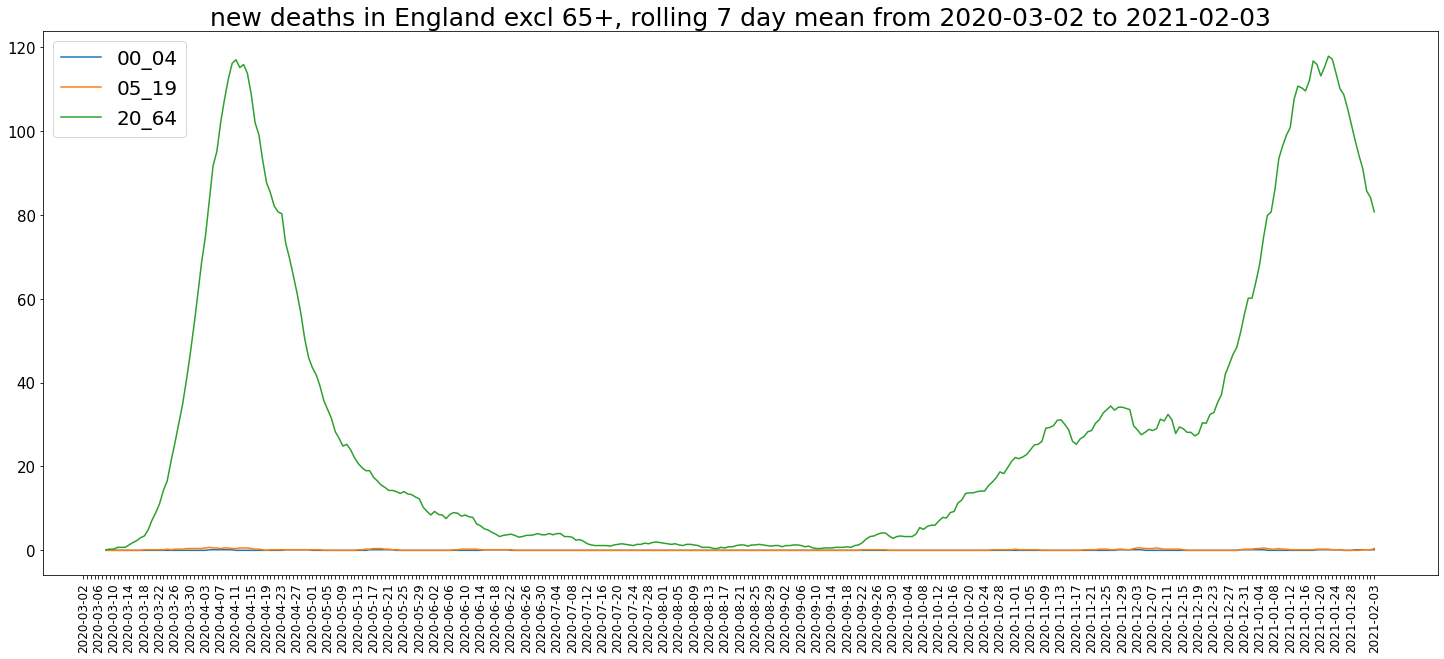

In [128]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'new deaths in England excl 65+, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [129]:
columns = ['00_04_cumsum','05_19_cumsum','20_64_cumsum',
           '65_84_cumsum','85+_cumsum']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

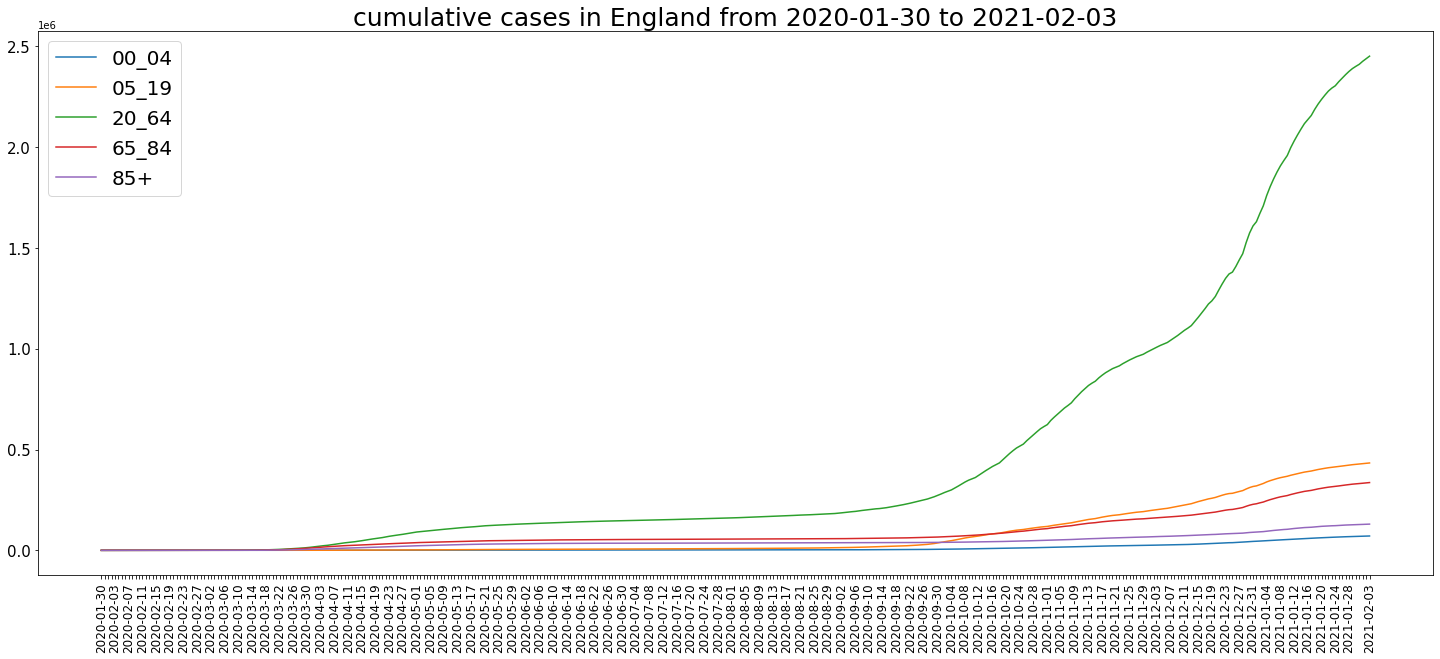

In [130]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'cumulative cases in England from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [131]:
columns = ['00_04_cumsum','05_19_cumsum',
           '65_84_cumsum','85+_cumsum']
chart_titles = ['00_04','05_19','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

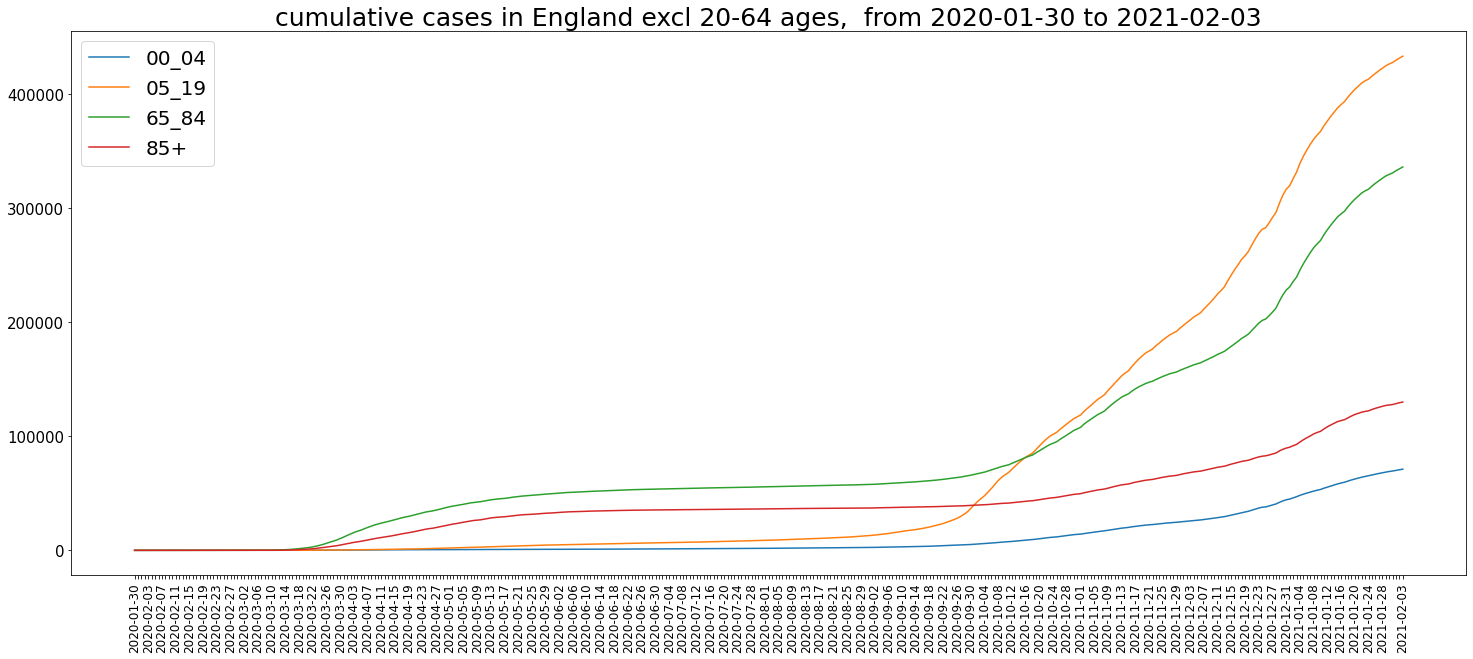

In [132]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'cumulative cases in England excl 20-64 ages,  from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [133]:
columns = ['0_to_5_newcumsum','6_to_17_newcumsum','18_to_64_newcumsum',
            '65_to_84_newcumsum','85+_newcumsum']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[-1]

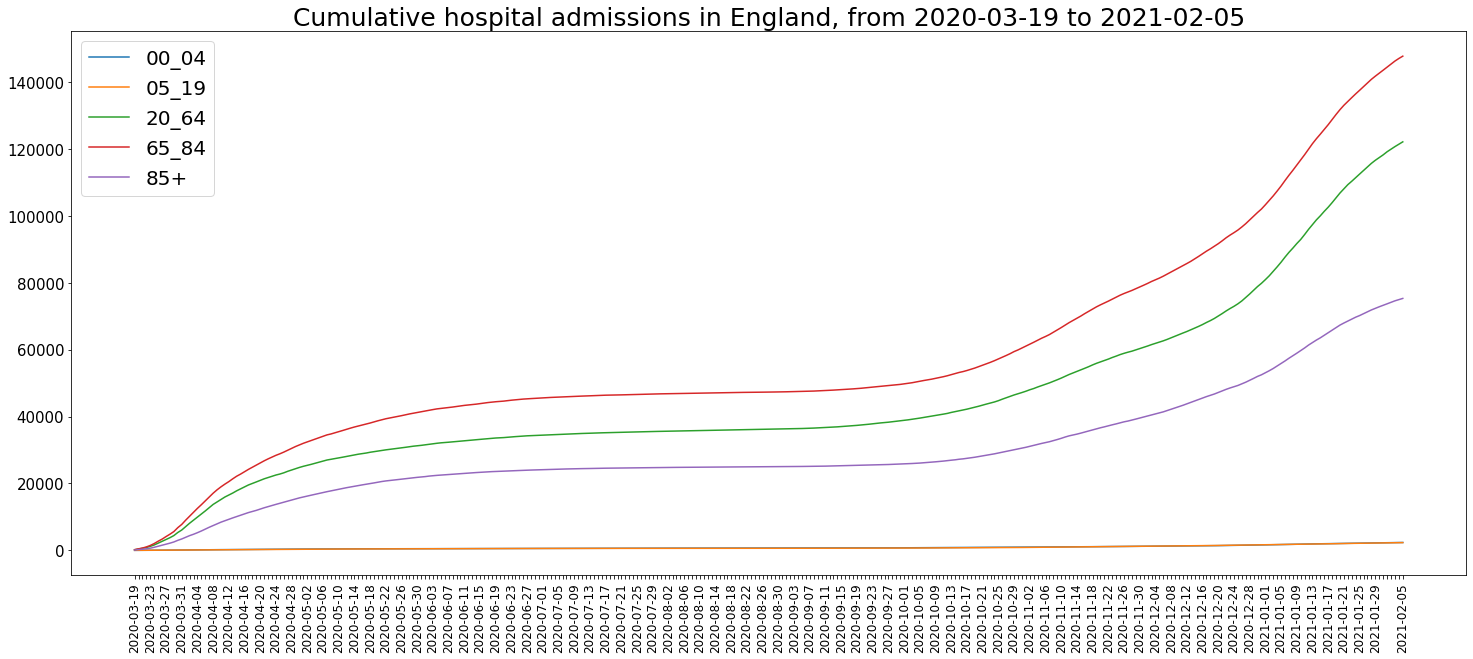

In [134]:
return1, return2, return3 = multiple_line_charts(df_eng_cumadmissionsbyage_Summary, columns, chart_titles, 
                                                 'Cumulative hospital admissions in England, from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [135]:
columns = ['00_04_cumsum','05_19_cumsum','20_64_cumsum',
           '65_84_cumsum','85+_cumsum']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

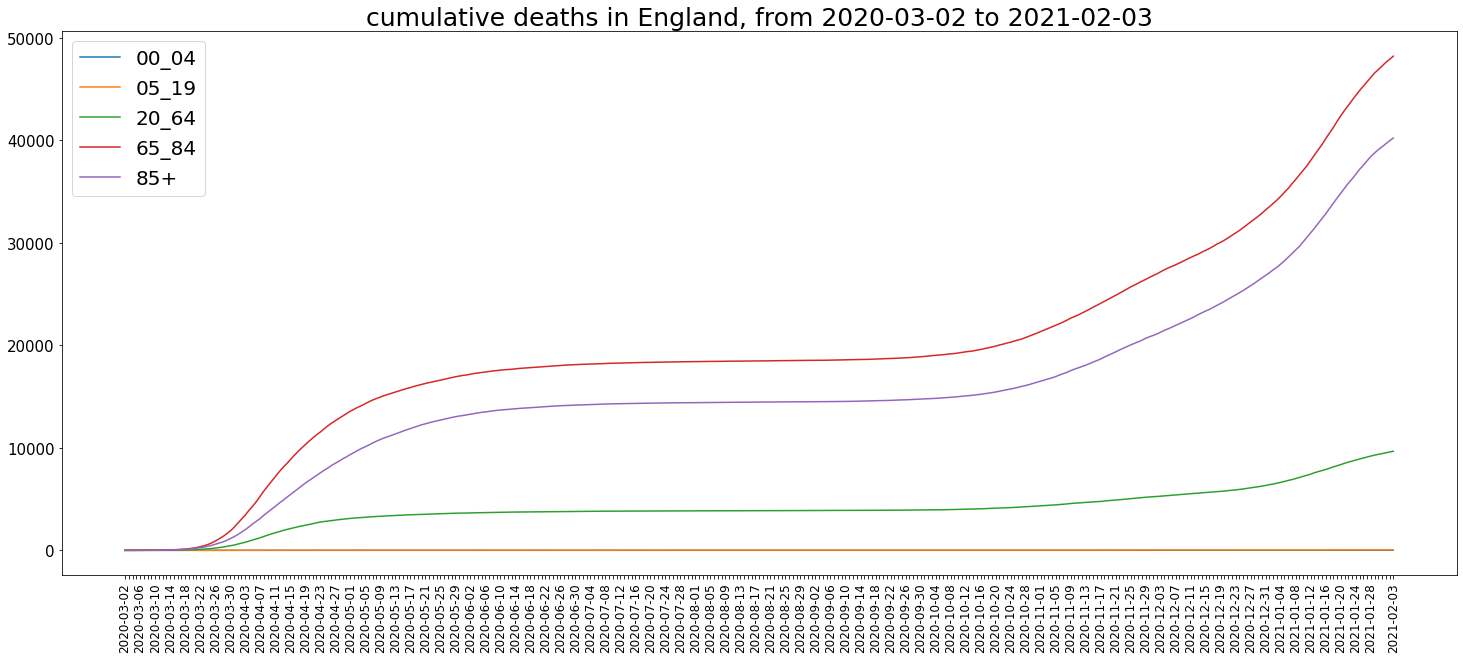

In [136]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'cumulative deaths in England, from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [137]:
columns = ['00_04_cumsum','05_19_cumsum','20_64_cumsum']
chart_titles = ['00_04','05_19','20_64']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

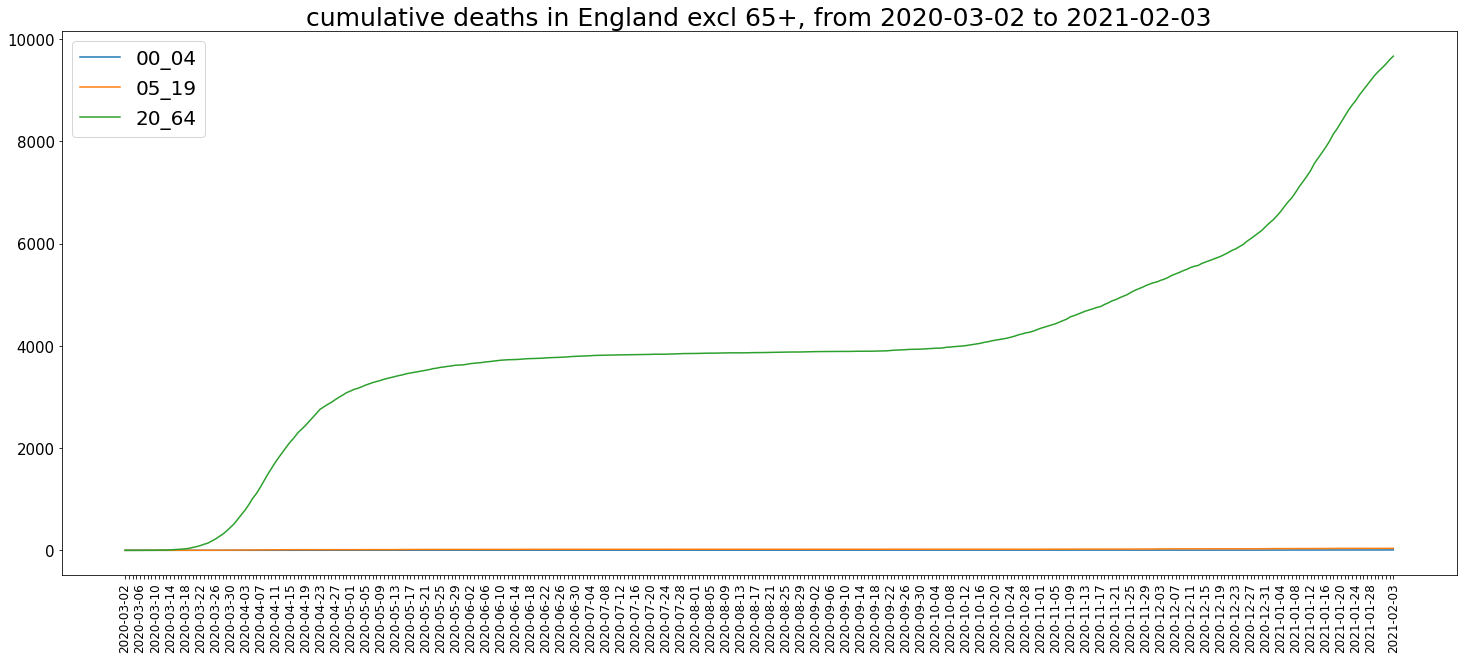

In [138]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'cumulative deaths in England excl 65+, from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [139]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Regional Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [140]:
df_EM.tail()

date areaType   areaCode       areaName  newCasesBySpecimenDate  \
348  2021-02-03   region  E12000004  East Midlands                    1740   
349  2021-02-04   region  E12000004  East Midlands                    1604   
350  2021-02-05   region  E12000004  East Midlands                    1394   
351  2021-02-06   region  E12000004  East Midlands                     979   
352  2021-02-07   region  E12000004  East Midlands                     395   

     newDeaths28DaysByDeathDate  
348                        54.0  
349                        46.0  
350                        40.0  
351                        23.0  
352                        10.0

In [141]:
# add a new column to each dataframe for the rolling 7 day mean

In [142]:
def rolling_seven(df, col_names):
    
    col_names = col_names
    
    for i in range(len(col_names)):
        df[str(col_names[i]) + '_rolling'] = df[str(col_names[i])].rolling(7).mean()

In [143]:
df_list = [df_EM, df_EE, df_LO, df_NE, df_NW, df_SE, df_SW, df_WM, df_YH]

col_names = ['newCasesBySpecimenDate', 'newDeaths28DaysByDeathDate']

In [144]:
for i in range(len(df_list)):
    rolling_seven(df_list[i], col_names)

In [145]:
def regional_charts(df, col_names, chart_titles, region):

    # bar charts showing number of new cases and deaths each day per region

    col_names = col_names

    #fig, ax = plt.subplots(nrows=int(len(col_names)/3)+1, ncols=3, figsize=(25,25))
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25,25))

    last_date = df['date'].iloc[-1]

    plt.subplots_adjust(hspace=0.4, wspace=0.6)
    plt.suptitle('Bar charts showing daily new cases and new deaths in ' + str(region) + ' to ' + last_date, fontsize = 20)
    #plt.suptitle("anything over 'Less than a year' indicates that returning members keep their history", fontsize = 20)

    x = df.index.values
    x1 = df.index.values[:-5] # for rolling deaths, dont plot the last 5 data points, incomplete

    labels = list(df['date'])

    # for i in range(1,len(labels),2):
    #     labels[i-1]=''
    # if len(labels) % 2 != 0:
    #     labels[-1]=''


    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''


    for ii in range(len(col_names)):
        #for i in range(len(df)):
        y1 = df[col_names[ii]]
        if ii == 1:
            y2 = df[str(col_names[ii]) + '_rolling'][:-5]
        else:
            y2 = df[str(col_names[ii]) + '_rolling']
        ax[ii].set_title(chart_titles[ii], fontsize=20)
        ax[ii].set_xticks(x)
        ax[ii].set_xticklabels(labels, rotation = 90, fontsize=12)
        ax[ii].yaxis.set_tick_params(labelsize=15)
        ax[ii].yaxis.set_major_locator(MaxNLocator(integer=True))
        ax[ii].bar(x,y1, color='#1f77b4')
        #ax[ii].plot(x,y2, color='#bcbd22', lw=4)
        if ii ==1:
            ax[ii].plot(x1,y2, color='black', lw=4)
        else:
            ax[ii].plot(x,y2, color='black', lw=4) 
        #ax[int(ii/3),ii - 3*int(ii/3)].bar(df_deaths_comp['date'][i],y1[i], color='#1f77b4')

    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]

    #fileName = 'Coviduk - Bar charts cumulative deaths each week by age group.png'

    #slideTitle.append('Bar charts cumulative deaths each week by age group to ' + last_date)
    #slideText.append(str(start_date) + ' to ' + str(end_date))
    #imagePath.append(fileName)

    # need to remove any dates filename when saved as .png given they change
    #plt.savefig(fileName, bbox_inches = 'tight')

    #     slideTitle_ = 'Bar charts cumulative deaths each week by age group to ' + last_date
    #     slideText_ = (str(start_date) + ' to ' + str(end_date))
    #     imagePath_ = (fileName)  

    #plt.show()

    fileName = 'Coviduk - regional charts for ' + str(region) + '.png'  
    
    
    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName, bbox_inches = 'tight')
    
    slideTitle_ = str(region) + ': daily cases and daily deaths'
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName)  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_ 

In [146]:
col_names = ['newCasesBySpecimenDate', 'newDeaths28DaysByDeathDate']

chart_titles = ['daily new cases and 7 day rolling mean',
                'daily new deaths by date of death and 7 day rolling mean']

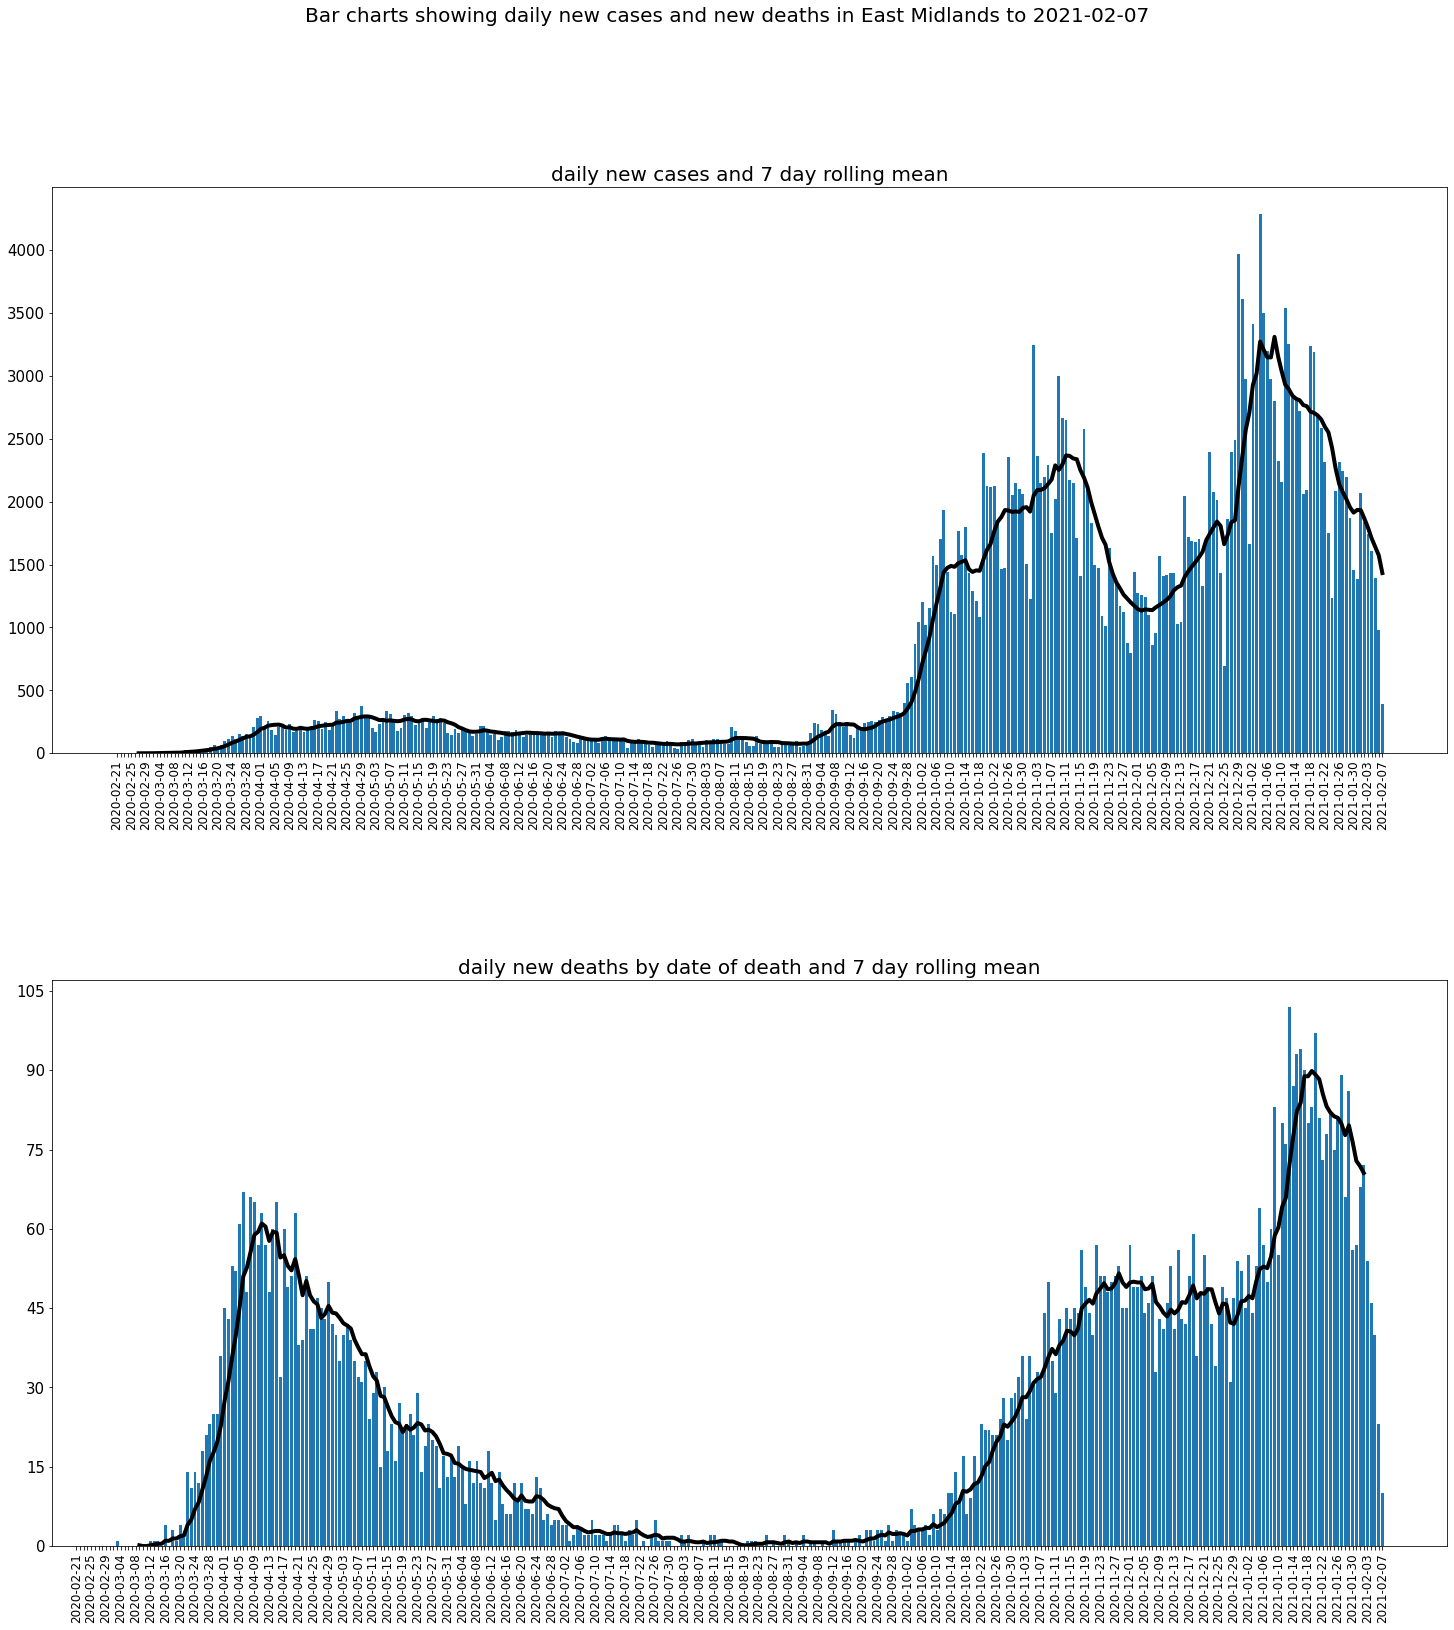

In [147]:
return1, return2, return3 = regional_charts(df_EM, col_names, chart_titles, 'East Midlands')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

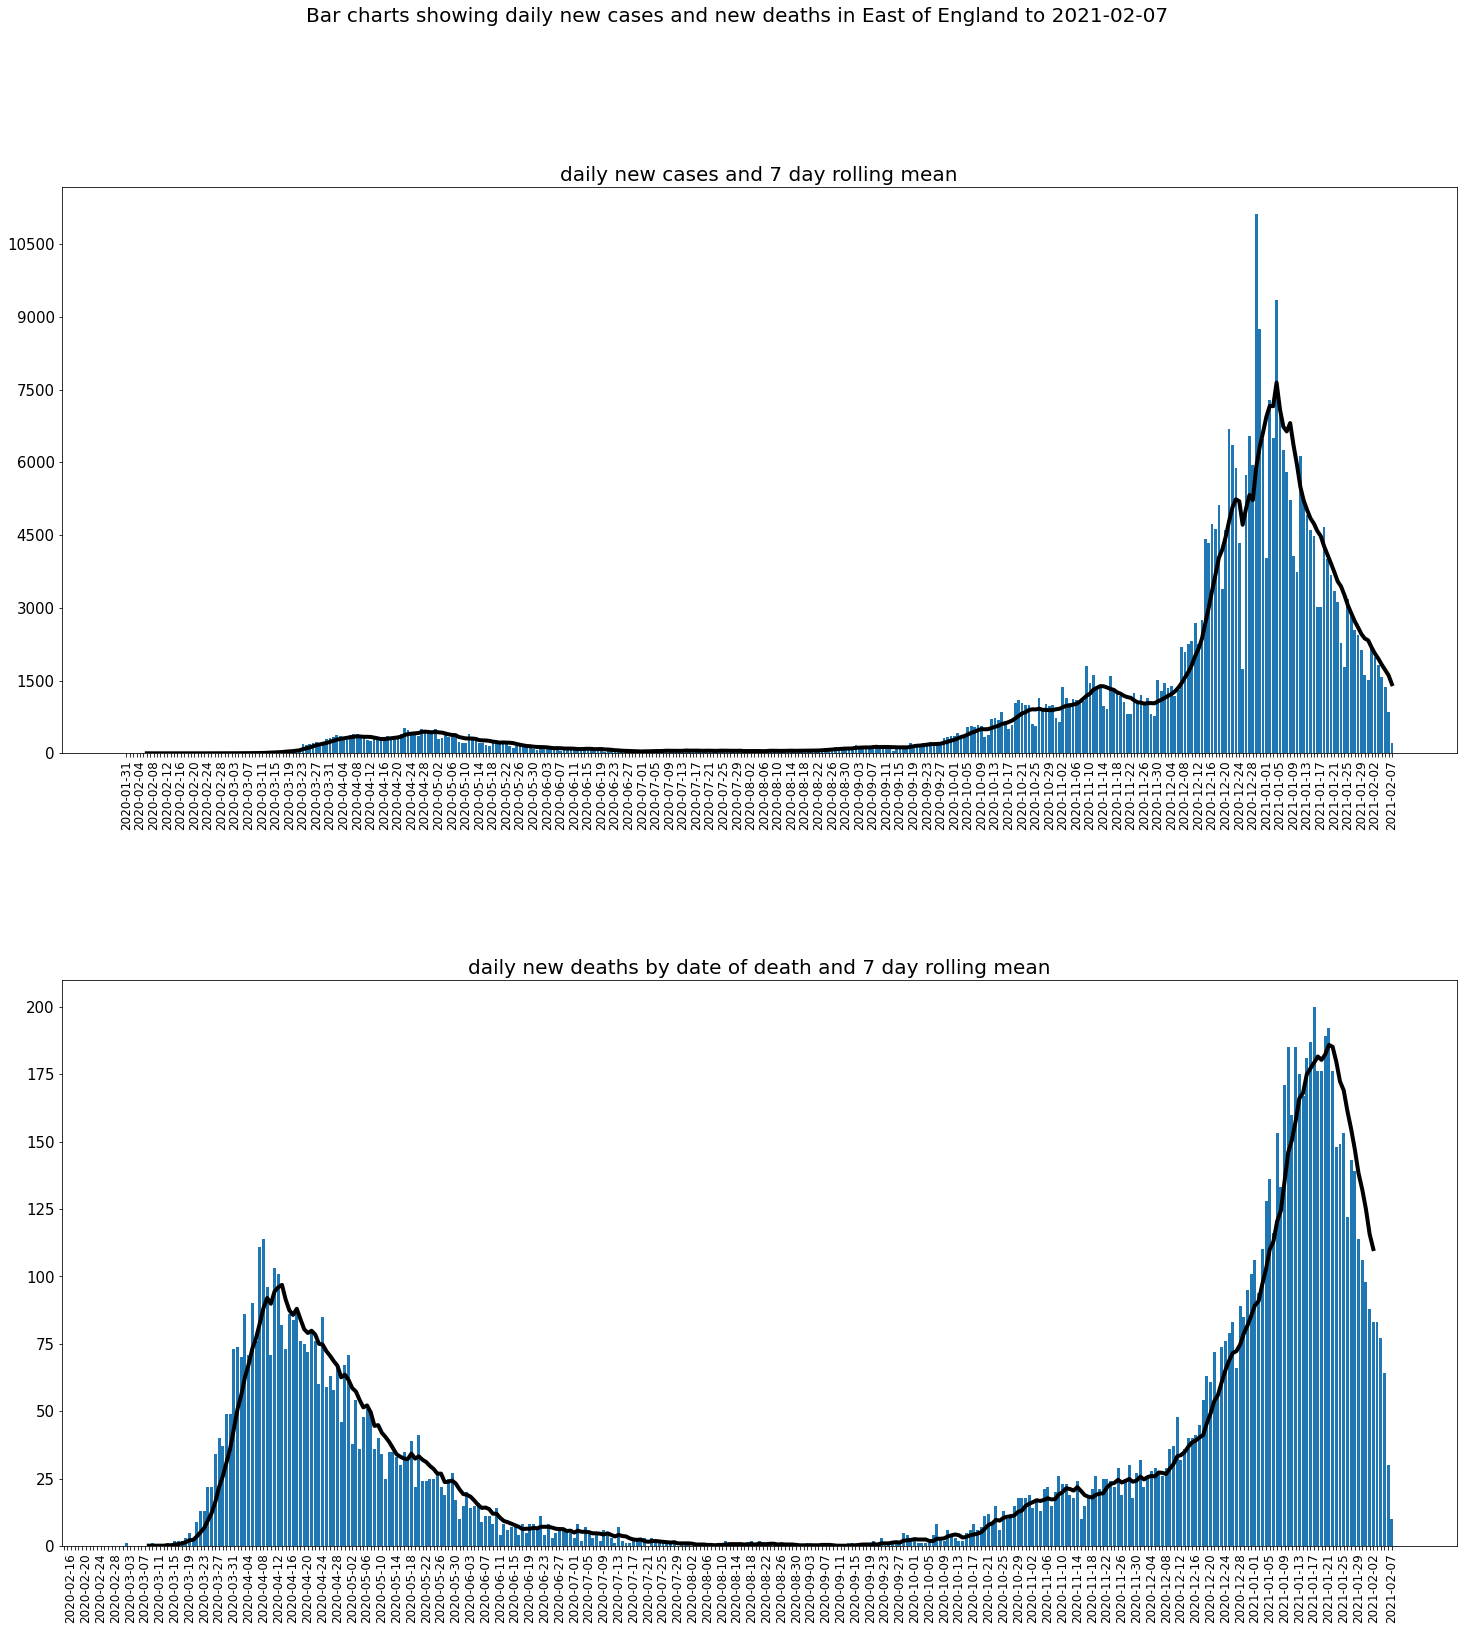

In [148]:
return1, return2, return3 = regional_charts(df_EE, col_names, chart_titles, 'East of England')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

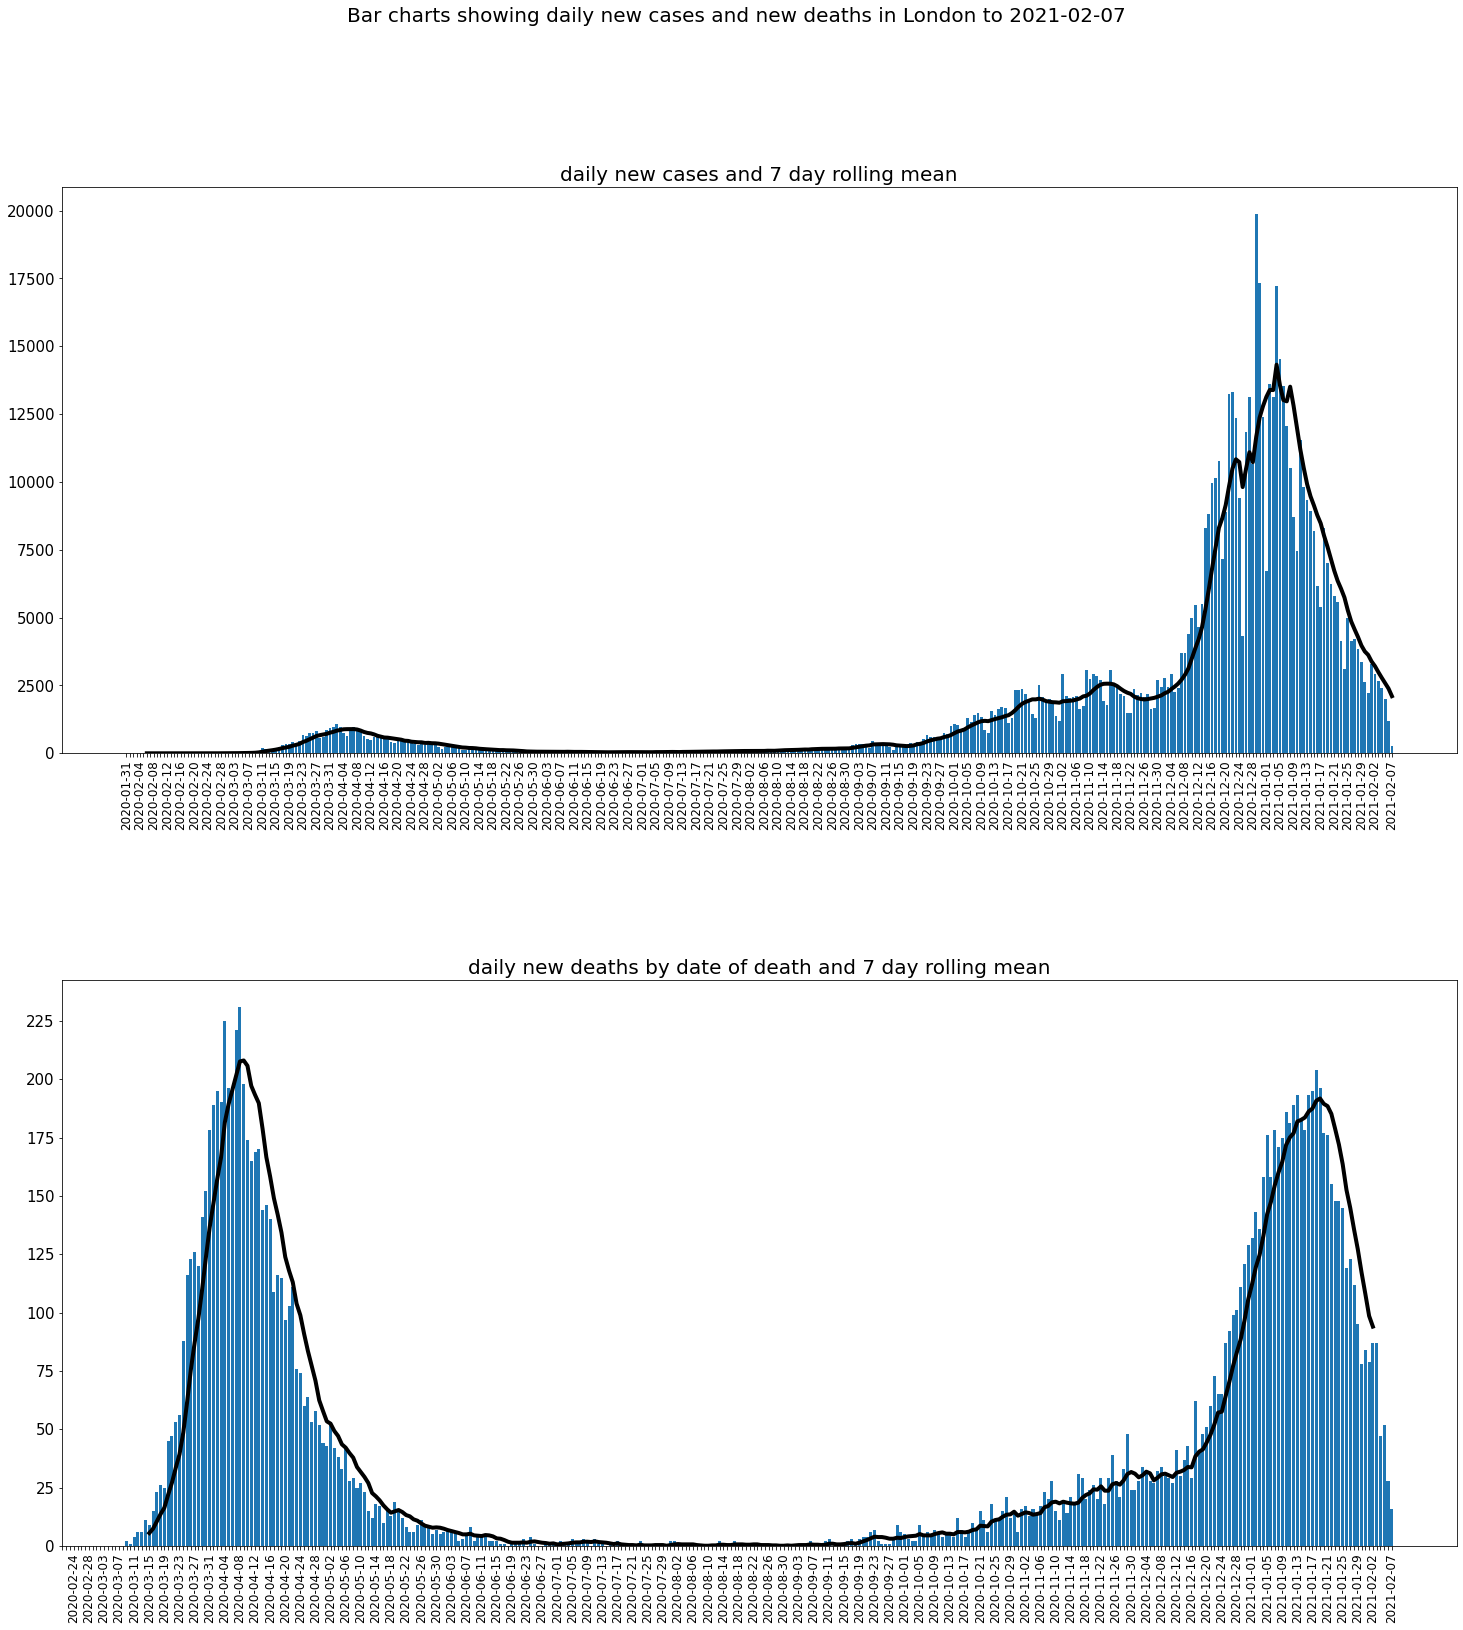

In [149]:
return1, return2, return3 = regional_charts(df_LO, col_names, chart_titles, 'London')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

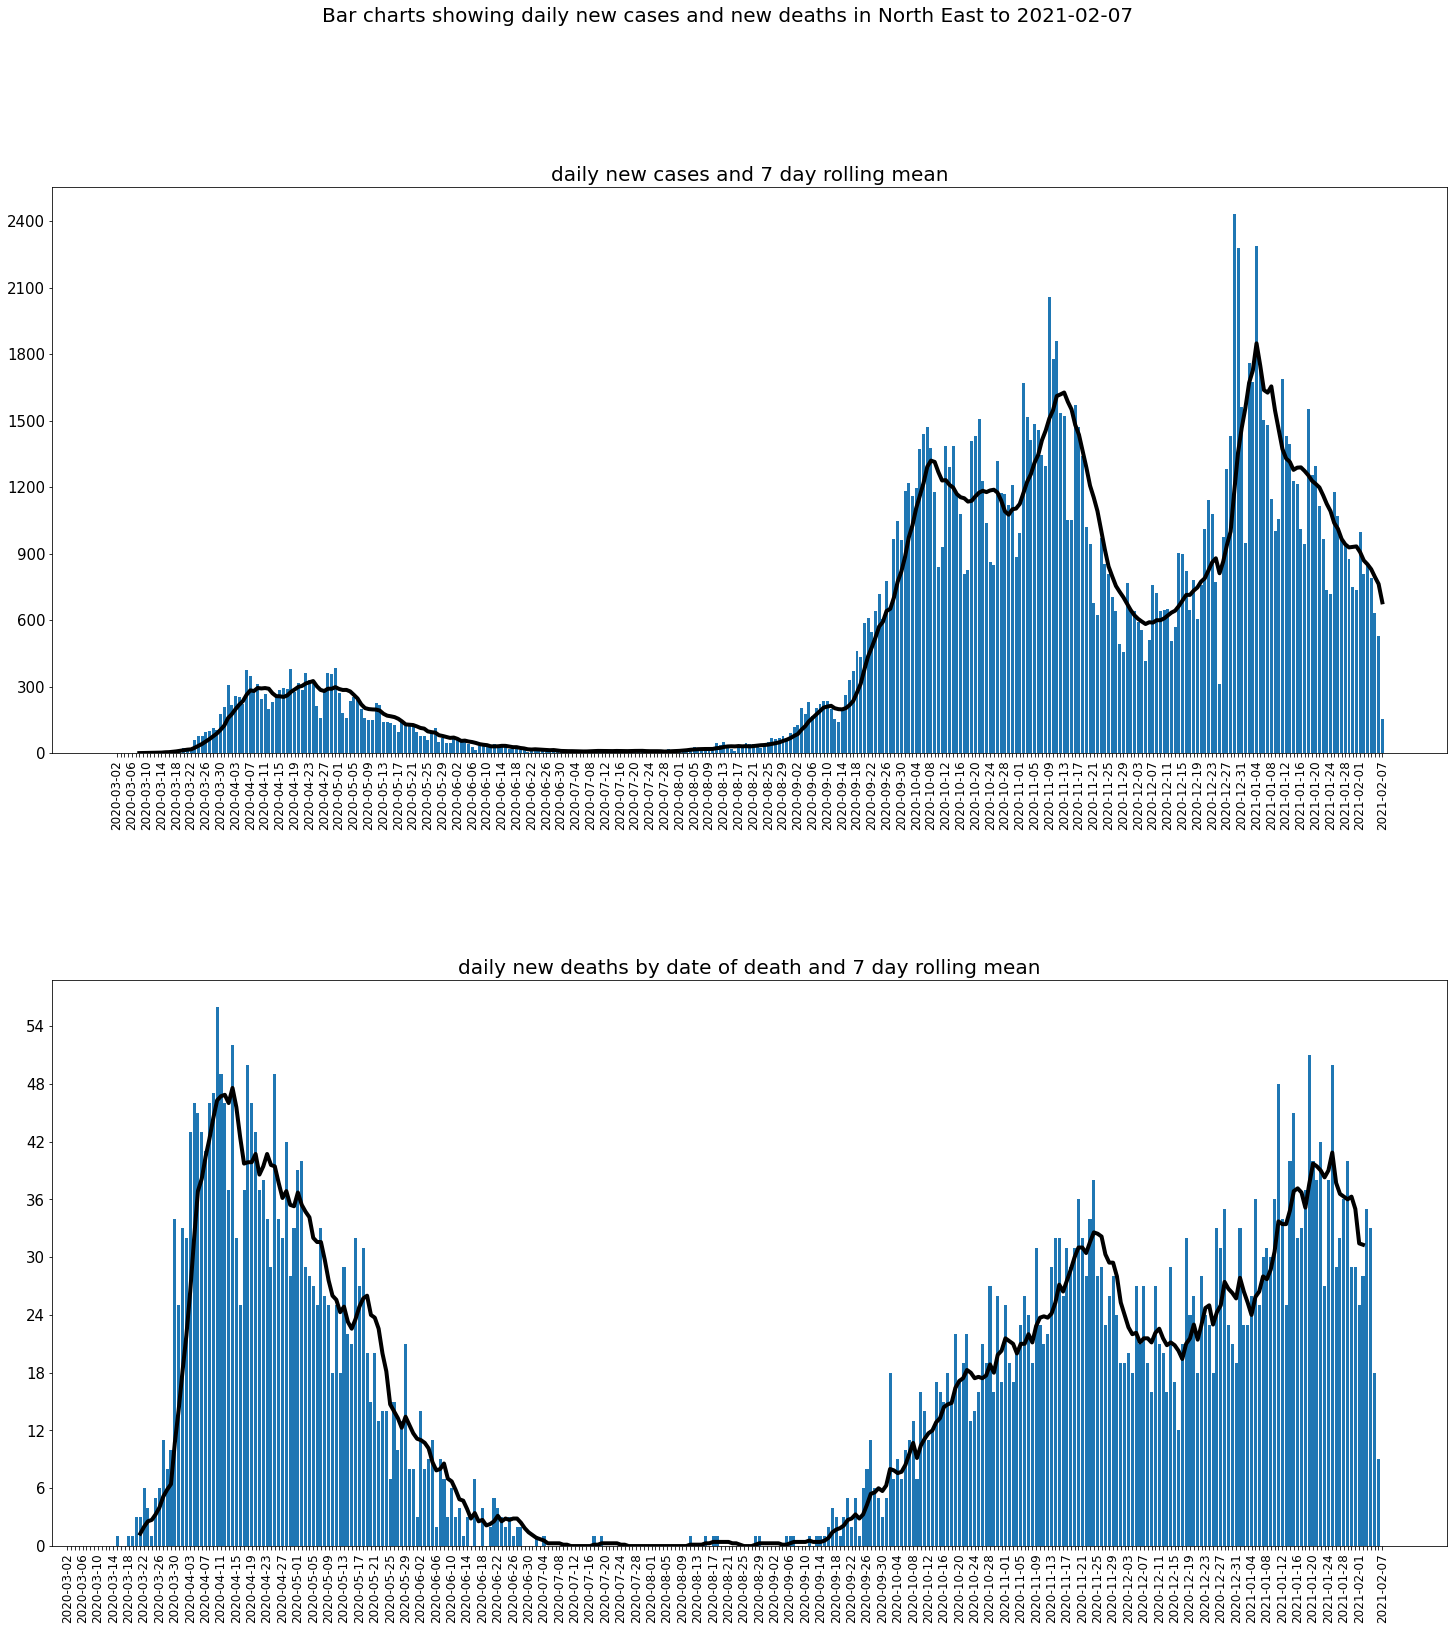

In [150]:
return1, return2, return3 = regional_charts(df_NE, col_names, chart_titles, 'North East')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

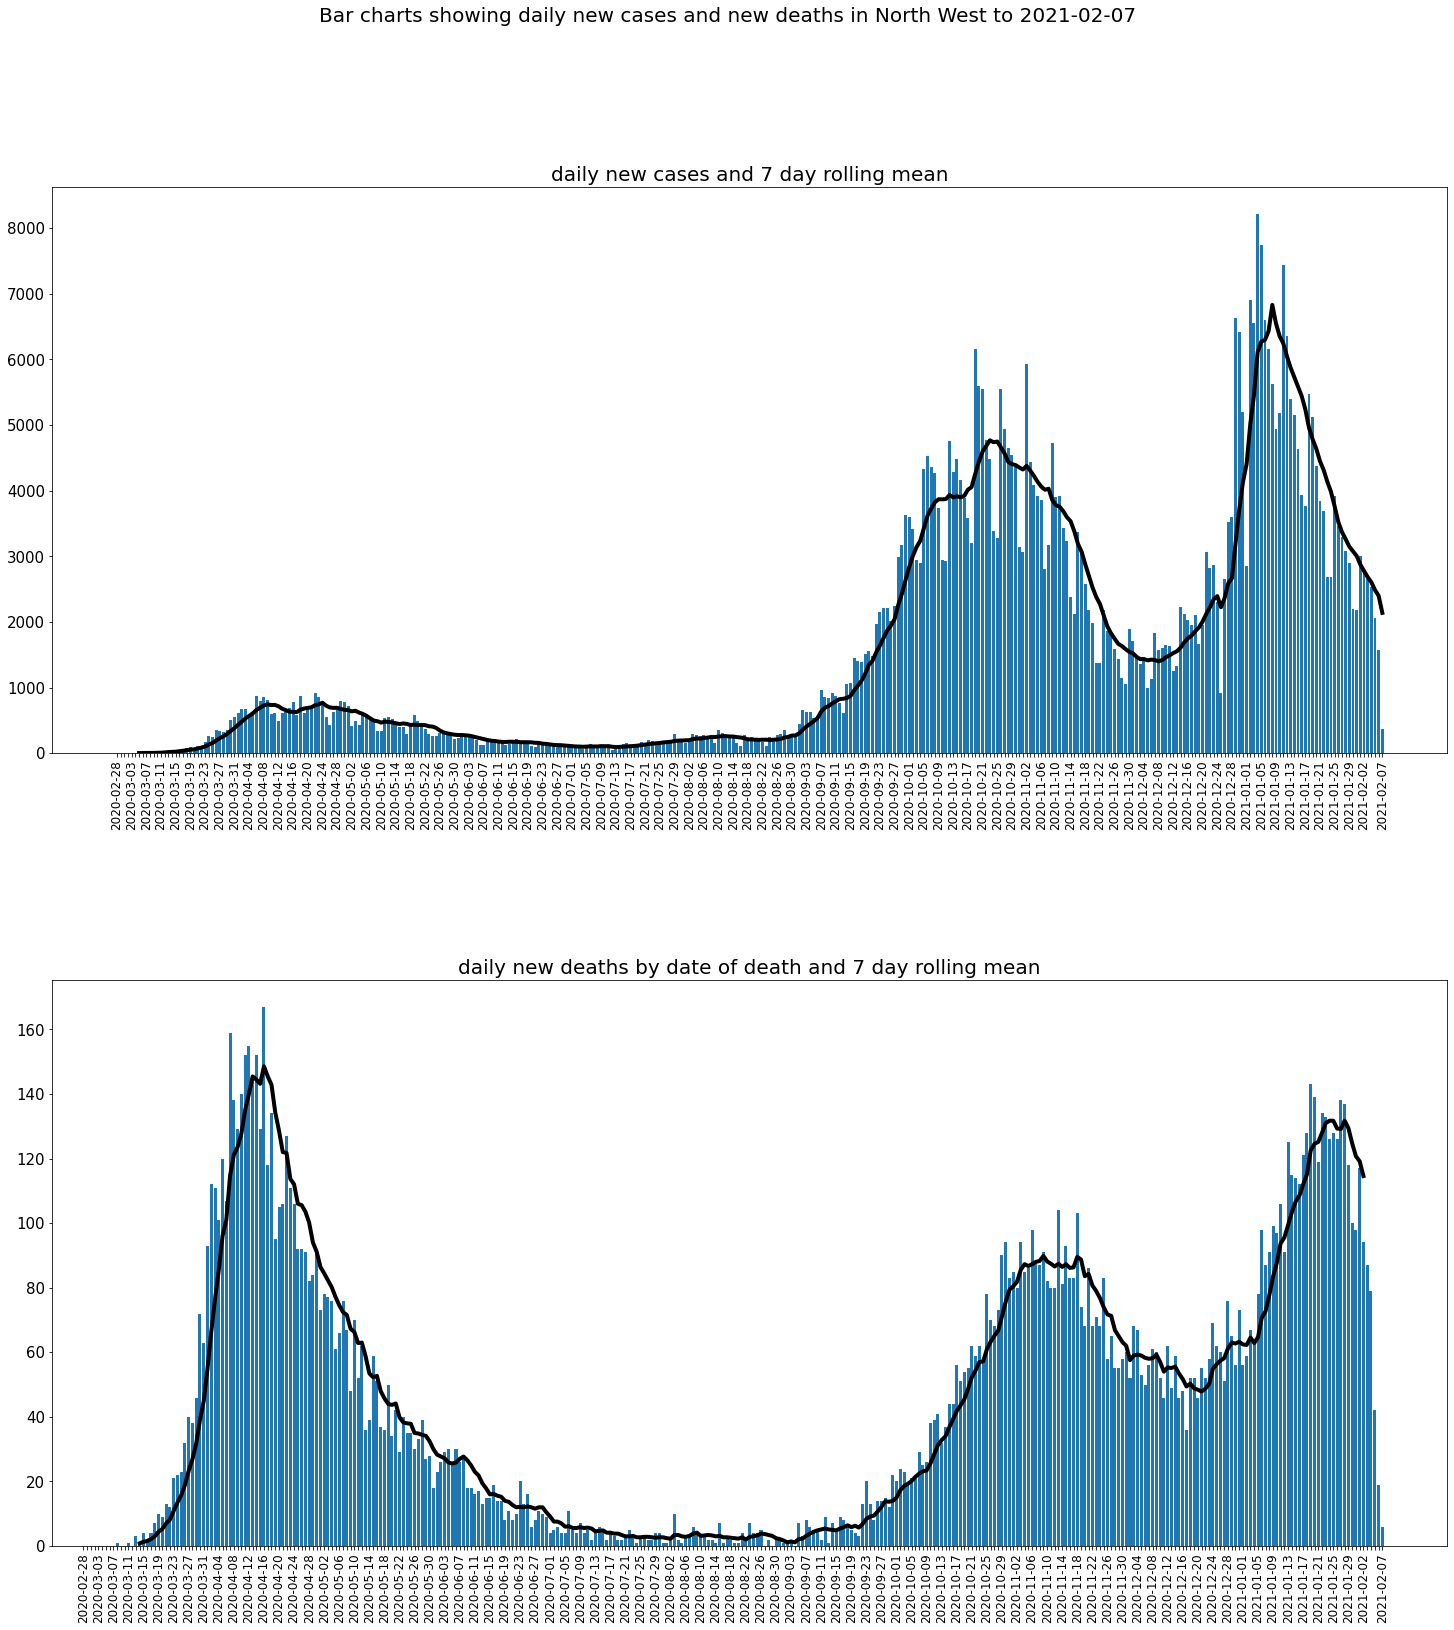

In [151]:
return1, return2, return3 = regional_charts(df_NW, col_names, chart_titles, 'North West')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

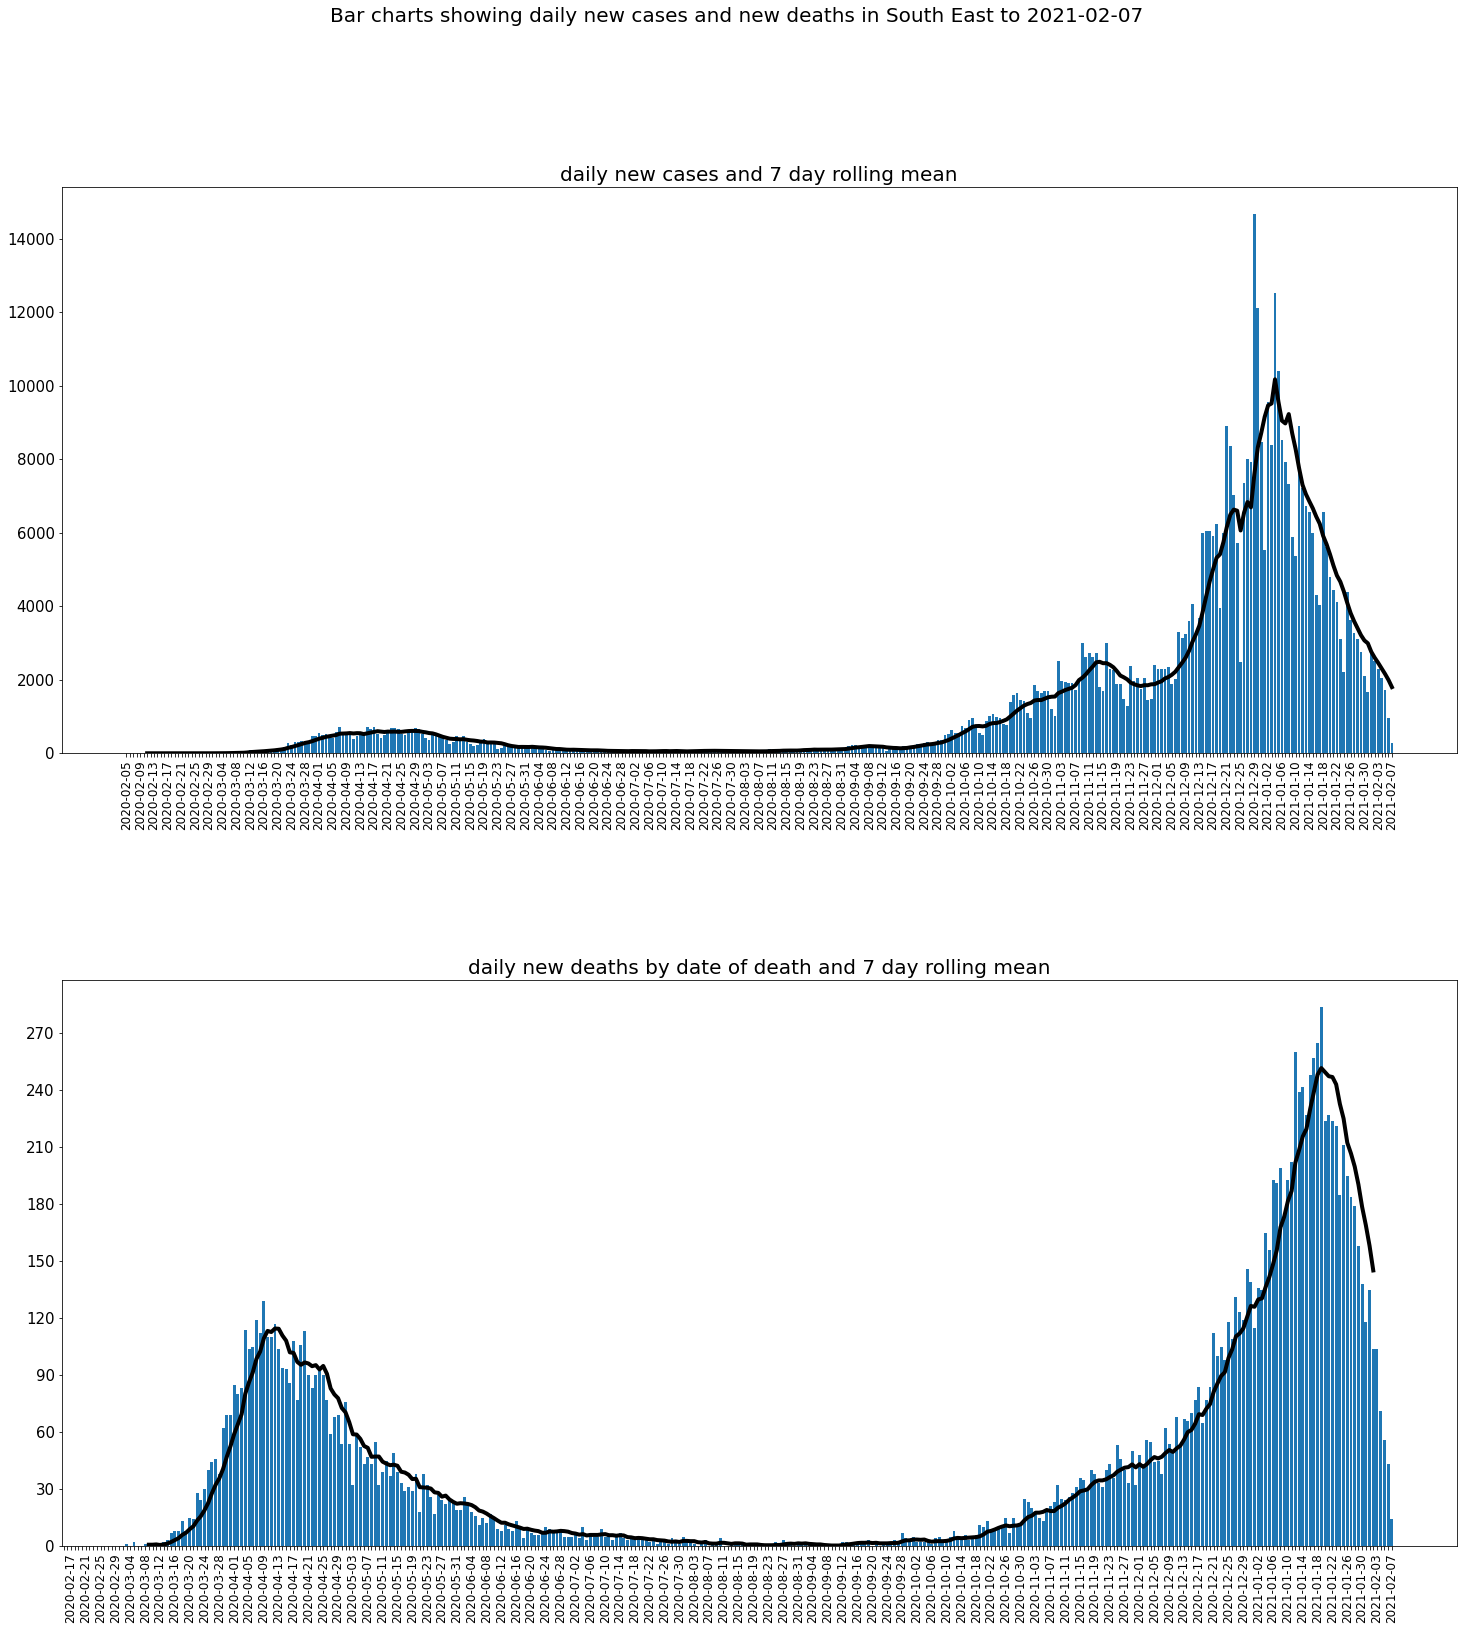

In [152]:
return1, return2, return3 = regional_charts(df_SE, col_names, chart_titles, 'South East')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

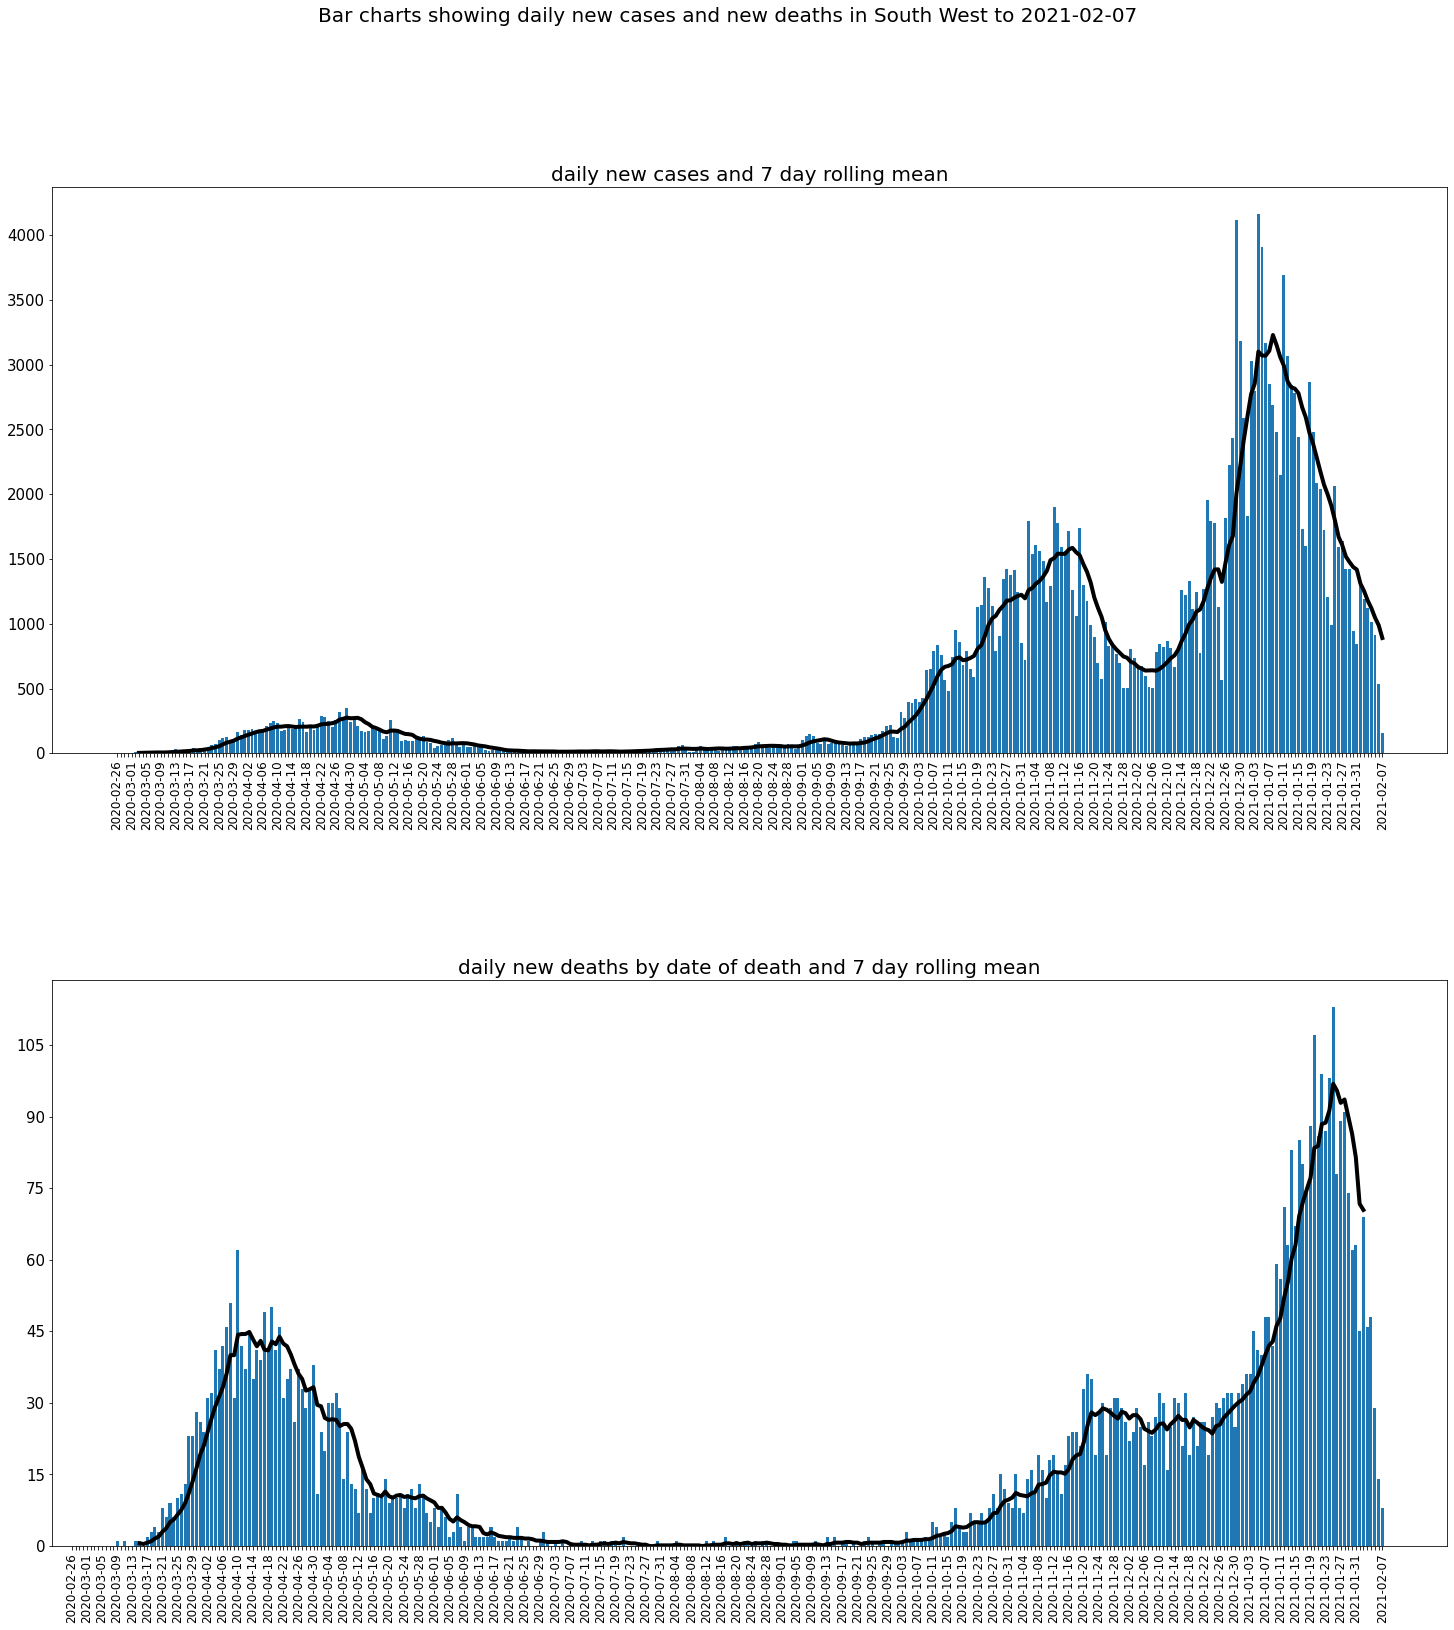

In [153]:
return1, return2, return3 = regional_charts(df_SW, col_names, chart_titles, 'South West')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

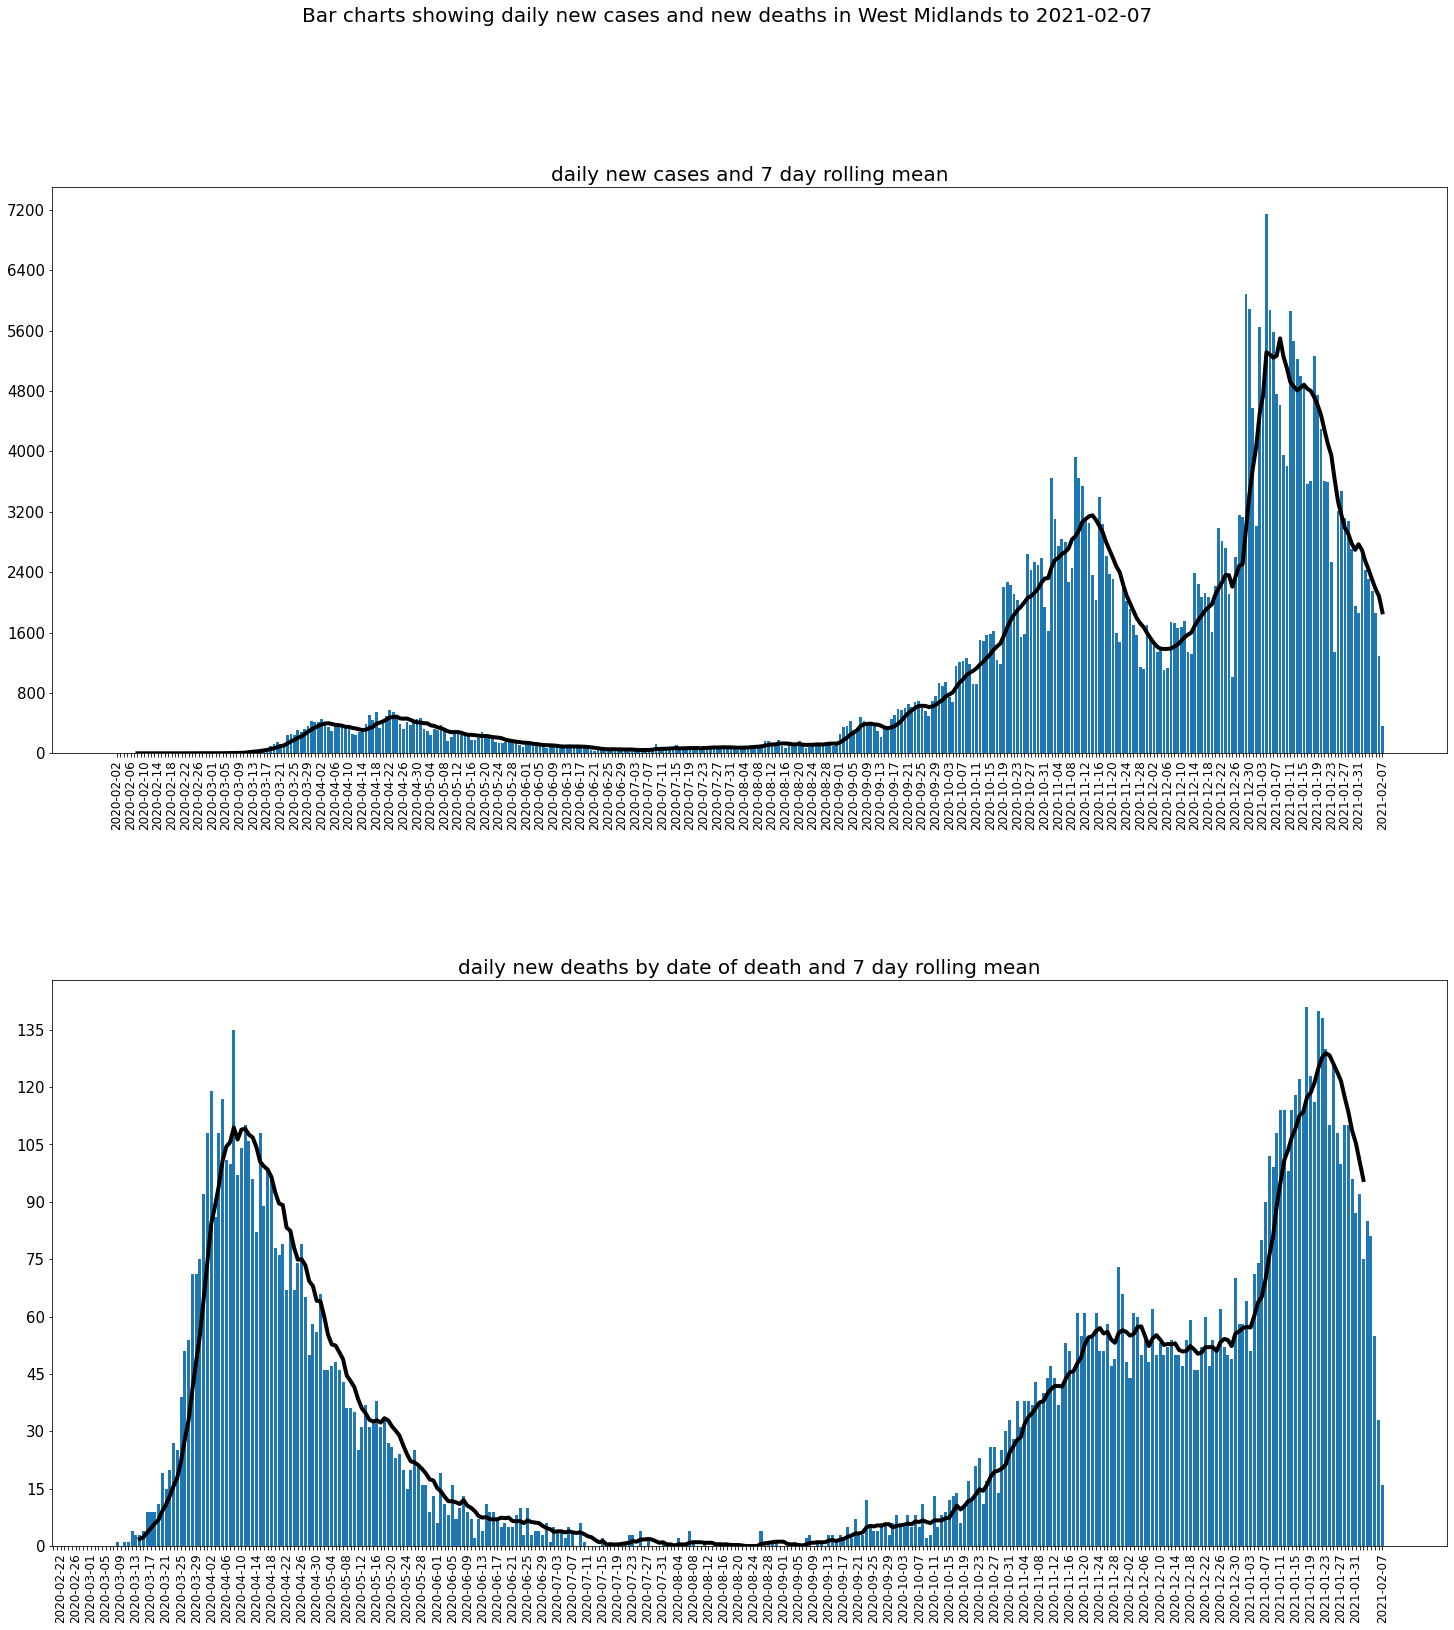

In [154]:
return1, return2, return3 = regional_charts(df_WM, col_names, chart_titles, 'West Midlands')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

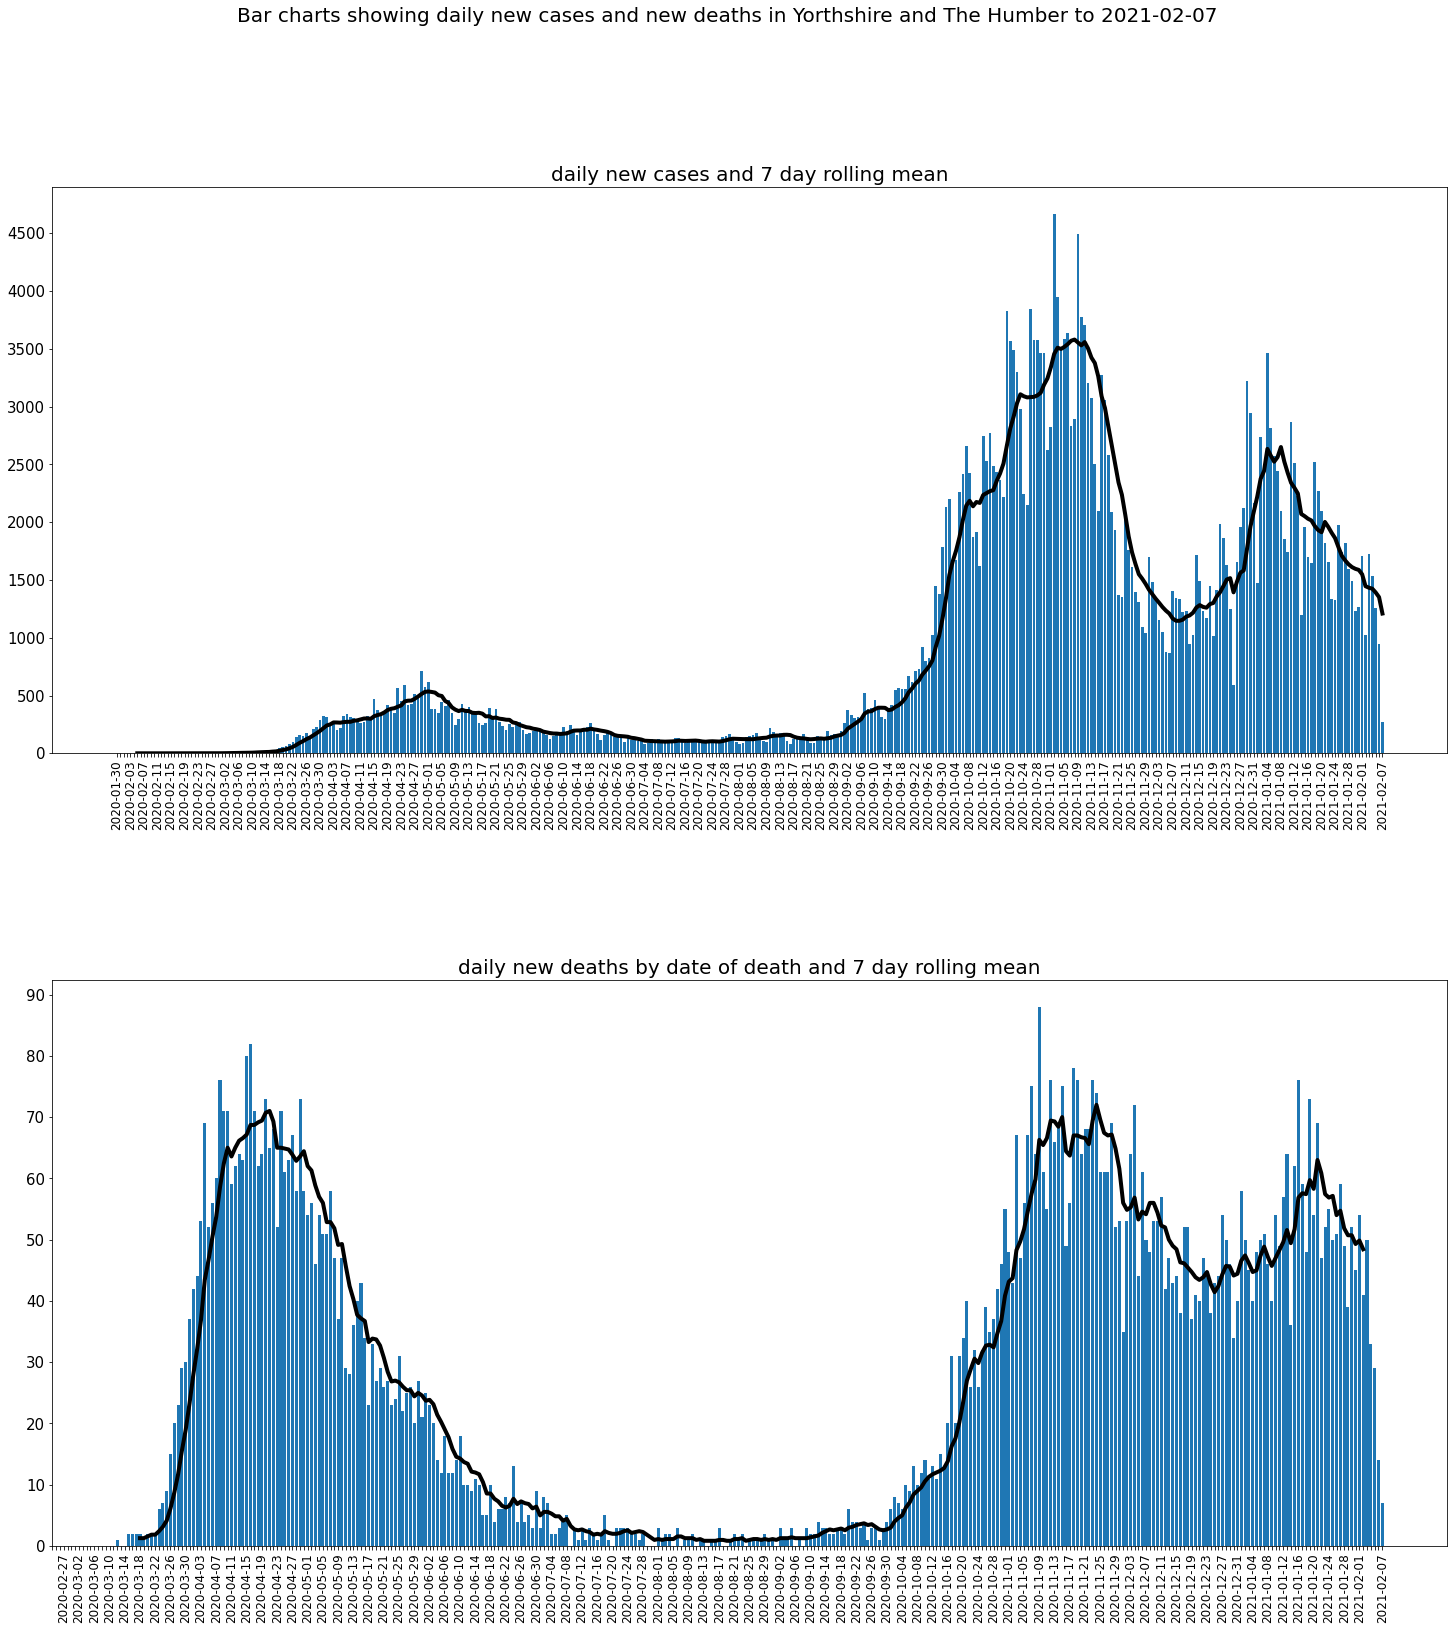

In [155]:
return1, return2, return3 = regional_charts(df_YH, col_names, chart_titles, 'Yorthshire and The Humber')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [156]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data for the UK by Age (Deaths is always a couple of weeks old): Cases and Deaths')
    slideText.append('')
    imagePath.append('')

plt.show()

In [157]:
df_casesAge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 9 columns):
date           8162 non-null object
areaType       8162 non-null object
areaCode       8162 non-null object
areaName       8162 non-null object
metric         8162 non-null object
age            8162 non-null object
cases          8162 non-null int64
rollingRate    7791 non-null float64
rollingSum     8162 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 574.0+ KB


In [158]:
df_casesAge.drop_duplicates(inplace=True)
df_casesAge.reset_index(drop=True)

date  areaType   areaCode        areaName  \
0     2020-01-30  overview  K02000001  United Kingdom   
1     2020-01-30  overview  K02000001  United Kingdom   
2     2020-01-30  overview  K02000001  United Kingdom   
3     2020-01-30  overview  K02000001  United Kingdom   
4     2020-01-30  overview  K02000001  United Kingdom   
...          ...       ...        ...             ...   
8157  2021-02-03  overview  K02000001  United Kingdom   
8158  2021-02-03  overview  K02000001  United Kingdom   
8159  2021-02-03  overview  K02000001  United Kingdom   
8160  2021-02-03  overview  K02000001  United Kingdom   
8161  2021-02-03  overview  K02000001  United Kingdom   

                                     metric         age  cases  rollingRate  \
0     newCasesBySpecimenDateAgeDemographics       00_59      2          0.0   
1     newCasesBySpecimenDateAgeDemographics       00_04      0          0.0   
2     newCasesBySpecimenDateAgeDemographics       05_09      0          0.0   
3     newCasesBySpecimenDateAgeDemographics       10_14      0          0.0   
4     newCasesBySpecimenDateAgeDemographics       15_19      0          0.0   
...                                     ...         ...    ...          ...   
8157  newCasesBySpecimenDateAgeDemographics  unassigned     17          NaN   
8158  newCasesBySpecimenDateAgeDemographics         60+   3183        145.9   
8159  newCasesBySpecimenDateAgeDemographics       00_59  14103        200.9   
8160  newCasesBySpecimenDateAgeDemographics       55_59   1219        210.0   
8161  newCasesBySpecimenDateAgeDemographics       00_04    520         97.9   

      rollingSum  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
8157         103  
8158       23536  
8159      101805  
8160        9254  
8161        3777  

[8162 rows x 9 columns]

In [159]:
# making the age values the column headers
# make a new dataframe

dates = df_casesAge['date'].tolist()
dates = list(set(dates))

df_casesAge_Summary = pd.DataFrame(dates, columns = ['date'])
df_casesAge_Summary.sort_values('date', inplace = True)
df_casesAge_Summary.reset_index(drop=True, inplace=True)


In [160]:
df_casesAge_Summary.head()

date
0  2020-01-30
1  2020-01-31
2  2020-02-01
3  2020-02-02
4  2020-02-03

In [161]:
# create the column headers and associated case numbers

headers = df_casesAge['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_casesAge[df_casesAge['age'] == headers[i]]['cases'].tolist()
    df_casesAge_Summary[headers[i]] = listOfValues


In [162]:
df_casesAge_Summary.tail(10)

date  00_59  00_04  05_09  10_14  15_19  20_24  25_29  30_34  \
361  2021-01-25  21871    808    679    769   1160   2186   2538   2657   
362  2021-01-26  19700    693    613    727   1046   2069   2303   2390   
363  2021-01-27  18920    630    618    748    993   1907   2127   2266   
364  2021-01-28  17705    604    564    656    941   1776   2023   2201   
365  2021-01-29  15805    605    567    634    920   1510   1654   1977   
366  2021-01-30  12353    504    416    433    746   1248   1352   1505   
367  2021-01-31  11354    435    354    404    595   1076   1321   1443   
368  2021-02-01  16252    550    516    561    912   1578   1875   2007   
369  2021-02-02  14233    559    519    526    739   1384   1719   1724   
370  2021-02-03  14103    520    486    506    801   1340   1706   1749   

     35_39  40_44  45_49   60+  55_59  unassigned  90+  85_89  80_84  50_54  \
361   2414   2218   2106  5306   2037          35  586    568    556   2264   
362   2212   1975   1901  4789   1823          30  538    500    540   1918   
363   2208   1900   1800  4352   1818          23  452    438    428   1882   
364   2031   1724   1717  4174   1654          27  420    407    399   1787   
365   1745   1605   1474  3903   1479          12  378    394    457   1623   
366   1416   1251   1194  2636   1129           7  180    224    253   1152   
367   1339   1162   1118  2396    964           9  197    229    245   1134   
368   1845   1631   1575  3886   1511          17  426    397    381   1674   
369   1602   1390   1372  3358   1298          14  405    333    383   1387   
370   1672   1393   1322  3183   1219          17  311    323    337   1372   

     70_74  65_69  60_64  75_79  
361    694    902   1449    551  
362    620    742   1309    540  
363    574    746   1270    444  
364    568    682   1213    485  
365    489    658   1080    447  
366    382    487    819    291  
367    338    426    705    256  
368    494    654   1120    414  
369    395    535    940    367  
370    431    557    904    320

In [163]:
#df_casesAge_Summary['date'] = df_casesAge_Summary['datetime'].dt.strftime('%d-%m-%Y')

In [164]:
# creat new columns

nursery = ['00_04']
school = ['15_19','10_14','05_09']
university = ['20_24']
working = ['55_59', '50_54','45_49','40_44','35_39','30_34','25_29']
sixties = ['60_64','65_69']
seventies = ['70_74','75_79']
eighties = ['80_84','85_89']
nineties = ['90+']


In [165]:
create_new_columns(df_casesAge_Summary,nursery,'nursery')
create_new_columns(df_casesAge_Summary,school,'school')
create_new_columns(df_casesAge_Summary,university,'university')
create_new_columns(df_casesAge_Summary,working,'working')
create_new_columns(df_casesAge_Summary,sixties,'sixties')
create_new_columns(df_casesAge_Summary,seventies,'seventies')
create_new_columns(df_casesAge_Summary,eighties,'eighties')
create_new_columns(df_casesAge_Summary,nineties,'nineties')


In [166]:
# add rolling 7 day columns

columns_rolling = ['nursery','school','university','working',
                   'sixties','seventies','eighties','nineties']


In [167]:
for i in range(len(columns_rolling)):
    df_casesAge_Summary[columns_rolling[i] + '_roll'] = df_casesAge_Summary[columns_rolling[i]].rolling(7).mean()

In [168]:
df_casesAge_Summary.tail(10)

date  00_59  00_04  05_09  10_14  15_19  20_24  25_29  30_34  \
361  2021-01-25  21871    808    679    769   1160   2186   2538   2657   
362  2021-01-26  19700    693    613    727   1046   2069   2303   2390   
363  2021-01-27  18920    630    618    748    993   1907   2127   2266   
364  2021-01-28  17705    604    564    656    941   1776   2023   2201   
365  2021-01-29  15805    605    567    634    920   1510   1654   1977   
366  2021-01-30  12353    504    416    433    746   1248   1352   1505   
367  2021-01-31  11354    435    354    404    595   1076   1321   1443   
368  2021-02-01  16252    550    516    561    912   1578   1875   2007   
369  2021-02-02  14233    559    519    526    739   1384   1719   1724   
370  2021-02-03  14103    520    486    506    801   1340   1706   1749   

     35_39  40_44  45_49   60+  55_59  unassigned  90+  85_89  80_84  50_54  \
361   2414   2218   2106  5306   2037          35  586    568    556   2264   
362   2212   1975   1901  4789   1823          30  538    500    540   1918   
363   2208   1900   1800  4352   1818          23  452    438    428   1882   
364   2031   1724   1717  4174   1654          27  420    407    399   1787   
365   1745   1605   1474  3903   1479          12  378    394    457   1623   
366   1416   1251   1194  2636   1129           7  180    224    253   1152   
367   1339   1162   1118  2396    964           9  197    229    245   1134   
368   1845   1631   1575  3886   1511          17  426    397    381   1674   
369   1602   1390   1372  3358   1298          14  405    333    383   1387   
370   1672   1393   1322  3183   1219          17  311    323    337   1372   

     70_74  65_69  60_64  75_79  nursery  school  university  working  \
361    694    902   1449    551      808    2608        2186    16234   
362    620    742   1309    540      693    2386        2069    14522   
363    574    746   1270    444      630    2359        1907    14001   
364    568    682   1213    485      604    2161        1776    13137   
365    489    658   1080    447      605    2121        1510    11557   
366    382    487    819    291      504    1595        1248     8999   
367    338    426    705    256      435    1353        1076     8481   
368    494    654   1120    414      550    1989        1578    12118   
369    395    535    940    367      559    1784        1384    10492   
370    431    557    904    320      520    1793        1340    10433   

     sixties  seventies  eighties  nineties  nursery_roll  school_roll  \
361     2351       1245      1124       586    759.285714  2619.857143   
362     2051       1160      1040       538    725.714286  2457.000000   
363     2016       1018       866       452    694.285714  2337.571429   
364     1895       1053       806       420    668.571429  2243.428571   
365     1738        936       851       378    642.571429  2157.857143   
366     1306        673       477       180    625.571429  2101.428571   
367     1131        594       474       197    611.285714  2083.285714   
368     1774        908       778       426    574.428571  1994.857143   
369     1475        762       716       405    555.285714  1908.857143   
370     1461        751       660       311    539.571429  1828.000000   

     university_roll  working_roll  sixties_roll  seventies_roll  \
361      2188.285714  15933.142857   2277.714286     1209.428571   
362      2059.857143  14916.571429   2140.000000     1149.142857   
363      1952.142857  14224.571429   2043.857143     1080.285714   
364      1862.428571  13629.571429   1952.428571     1044.714286   
365      1755.857143  12988.571429   1863.142857     1002.857143   
366      1708.285714  12546.714286   1809.428571      970.571429   
367      1681.714286  12418.714286   1784.000000      954.142857   
368      1594.857143  11830.714286   1701.571429      906.000000   
369      1497.000000  11255.000000   1619.285714      849.142857   
370      1416.00

In [169]:
columns = ['nursery_roll', 'school_roll', 'university_roll', 'working_roll', 
           'sixties_roll', 'seventies_roll', 'eighties_roll', 'nineties_roll']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

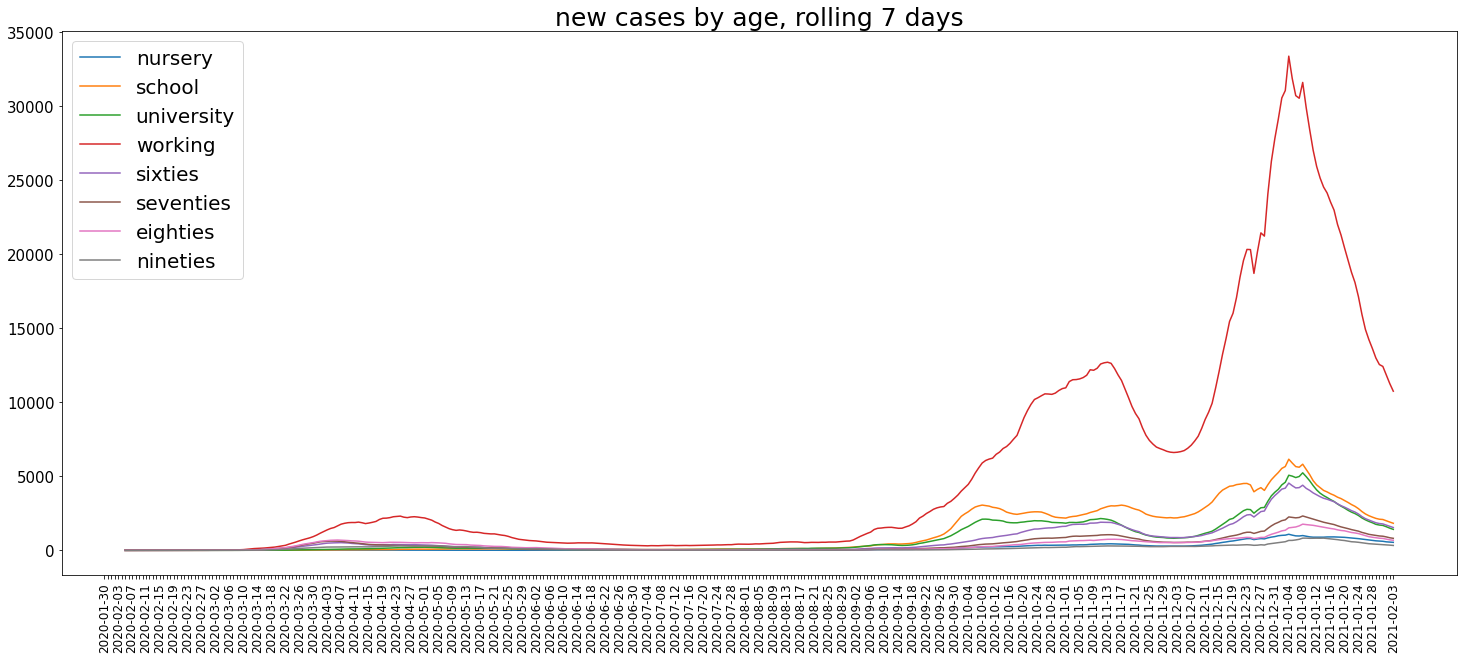

In [170]:
return1, return2, return3 = multiple_line_charts(df_casesAge_Summary, columns, chart_titles, 'new cases by age, rolling 7 days')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [171]:
columns = ['nursery_roll', 'school_roll', 'university_roll', 
           'sixties_roll', 'seventies_roll', 'eighties_roll', 'nineties_roll']
chart_titles = ['nursery', 'school', 'university', 
                'sixties', 'seventies', 'eighties', 'nineties']

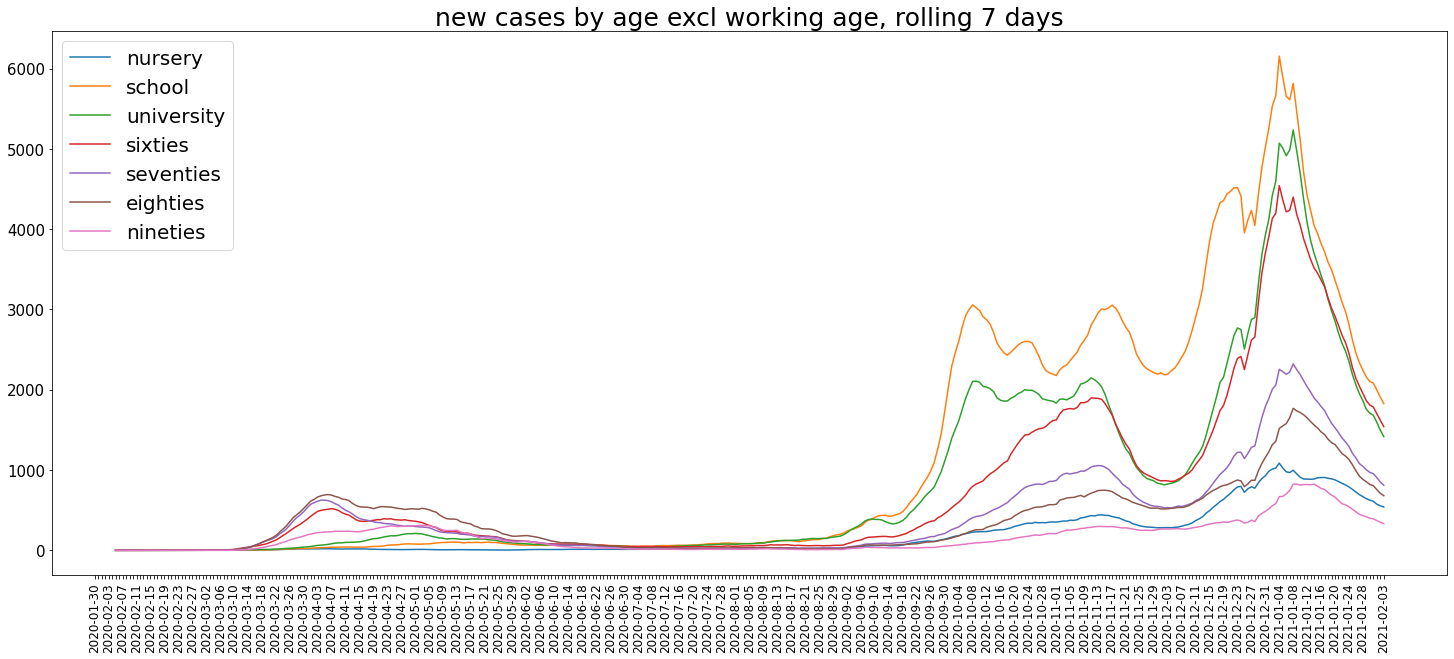

In [172]:
return1, return2, return3 = multiple_line_charts(df_casesAge_Summary, columns, chart_titles, 'new cases by age excl working age, rolling 7 days')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [173]:
# looking at deaths by ages

df_deathsAges.head()

age  2020-01-03  2020-01-10  2020-01-17  2020-01-24  2020-01-31  \
0     <1         0.0         0.0         0.0         0.0         0.0   
1    1-4         0.0         0.0         0.0         0.0         0.0   
2    5-9         0.0         0.0         0.0         0.0         0.0   
3  10-14         0.0         0.0         0.0         0.0         0.0   
4  15-19         0.0         0.0         0.0         0.0         0.0   

   2020-02-07  2020-02-14  2020-02-21  2020-02-28  2020-03-06  2020-03-13  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-03-20  2020-03-27  2020-04-03  2020-04-10  2020-04-17  2020-04-24  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         1.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         1.0         0.0         0.0   
4         0.0         2.0         3.0         1.0         2.0         0.0   

   2020-05-01  2020-05-08  2020-05-15  2020-05-22  2020-05-29  2020-06-05  \
0         0.0         1.0         1.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         1.0         0.0         1.0   
4         0.0         0.0         1.0         0.0         0.0         0.0   

   2020-06-12  2020-06-19  2020-06-26  2020-07-03  2020-07-10  2020-07-17  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-07-24  2020-07-31  2020-08-07  2020-08-14  2020-08-21  2020-08-28  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-09-04  2020-09-11  2020-09-18  2020-09-25  2020-10-02  2020-10-09  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-10-16  2020-10-23  2020-10-30  2020-11-06  2020-11-13  2020-11-20  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         1.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         1.0   

   2020-11-27  2020-12-04  2020-12-11  2020-12-18  2020-12-25  2021-01-01  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         2.0   
3         1.0         0

In [174]:
df_deathsAges.set_index('age', inplace=True)
df_deathsAges = df_deathsAges.T
df_deathsAges.reset_index(inplace=True)
df_deathsAges.rename(columns={"index": "date"}, inplace=True)
df_deathsAges.columns.name=''

In [175]:
df_deathsAges.head()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  40-44  \
0  2020-01-03  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  2020-01-10  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  2020-01-17  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  2020-01-24  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  2020-01-31  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90+  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  0.0

In [176]:
df_deathsAges.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    4.0    6.0    3.0   
52  2021-01-01  0.0  0.0  2.0    0.0    0.0    1.0    5.0    9.0   14.0   
53  2021-01-08  0.0  0.0  0.0    0.0    2.0    3.0    7.0   10.0   21.0   
54  2021-01-15  0.0  0.0  0.0    0.0    1.0    2.0    2.0    7.0   22.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79   80-84   85-89  \
50   11.0   22.0   44.0   80.0  108.0  173.0  287.0  414.0   627.0   681.0   
51   13.0   30.0   62.0   92.0  134.0  218.0  384.0  484.0   689.0   782.0   
52   19.0   42.0   77.0  131.0  223.0  264.0  447.0  640.0   871.0   964.0   
53   24.0   57.0  114.0  176.0  266.0  348.0  575.0  719.0  1064.0  1132.0   
54   31.0   69.0  105.0  177.0  282.0  397.0  613.0  885.0  1150.0  1295.0   

       90+  
50   762.0  
51   839.0  
52   988.0  
53  1224.0  
54  1550.0

In [177]:
last_date = df_deathsAges['date'].iloc[-1]

In [178]:
nursery = ['<1', '1-4']
school = ['15-19','10-14','5-9']
university = ['20-24']
working = ['55-59', '50-54','45-49','40-44','35-39','30-34','25-29']
sixties = ['60-64','65-69']
seventies = ['70-74','75-79']
eighties = ['80-84','85-89']
nineties = ['90+']

In [179]:
create_new_columns(df_deathsAges,nursery,'nursery')
create_new_columns(df_deathsAges,school,'school')
create_new_columns(df_deathsAges,university,'university')
create_new_columns(df_deathsAges,working,'working')
create_new_columns(df_deathsAges,sixties,'sixties')
create_new_columns(df_deathsAges,seventies,'seventies')
create_new_columns(df_deathsAges,eighties,'eighties')
create_new_columns(df_deathsAges,nineties,'nineties')

In [180]:
columns = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

In [181]:
return3 = 'new deaths by age, weekly to 2020-12-11'

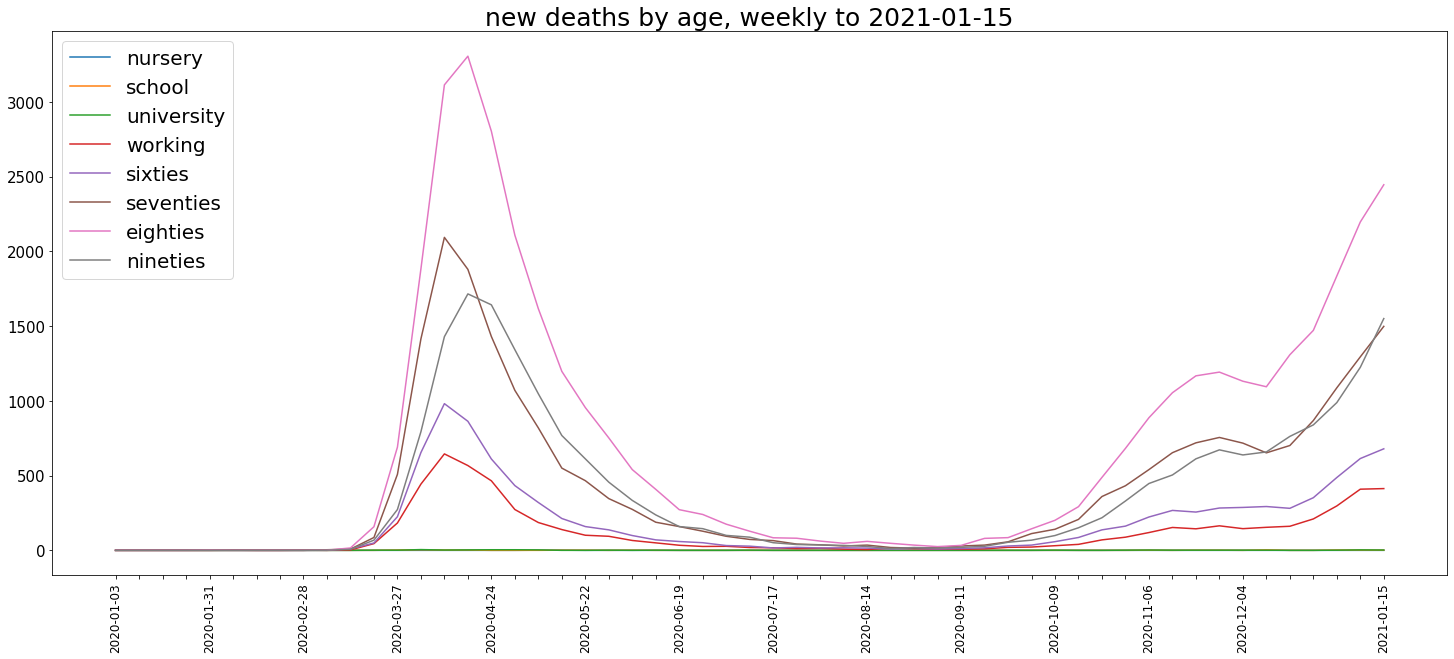

In [182]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'new deaths by age, weekly to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [183]:
columns = ['nursery','school','university','working',
           'sixties']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties']

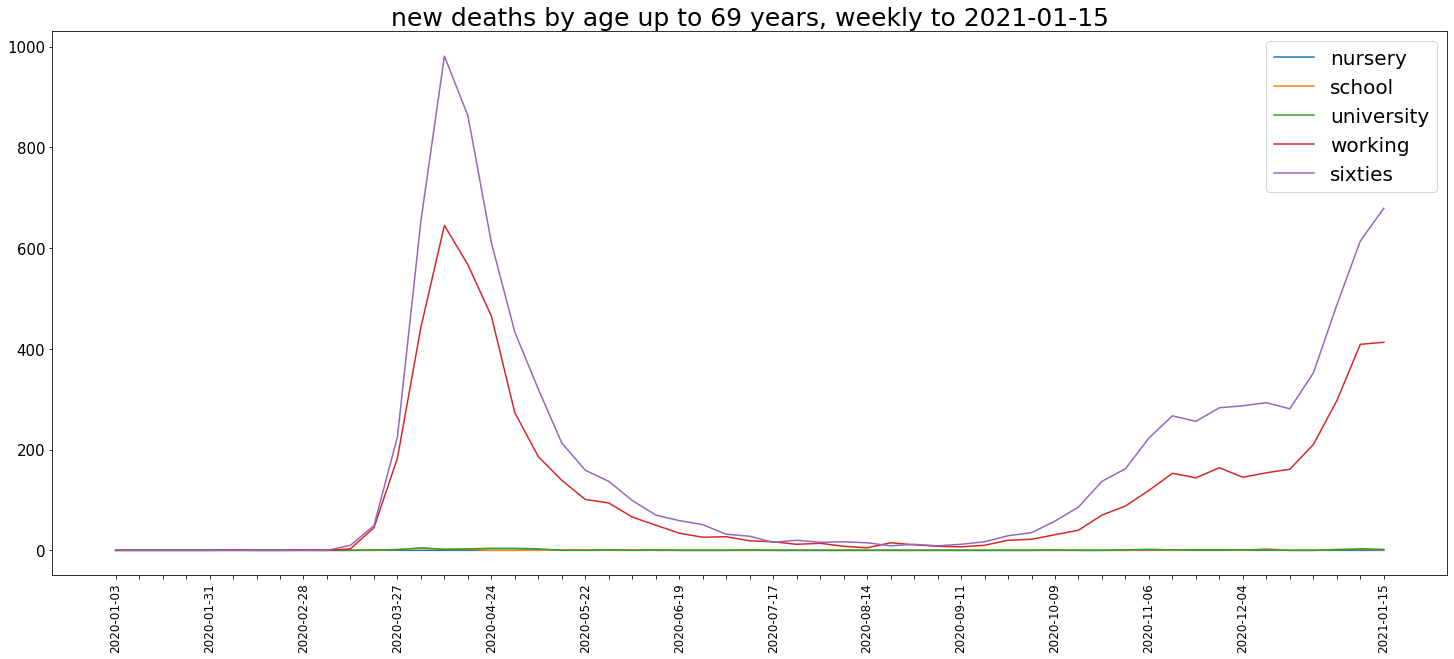

In [184]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'new deaths by age up to 69 years, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [185]:
# cumulative deaths

columns = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

for i in range(len(columns)):
    df_deathsAges[columns[i] + '_cum'] = df_deathsAges[columns[i]].cumsum()

In [186]:
columns = ['nursery_cum','school_cum','university_cum','working_cum',
           'sixties_cum','seventies_cum','eighties_cum','nineties_cum']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

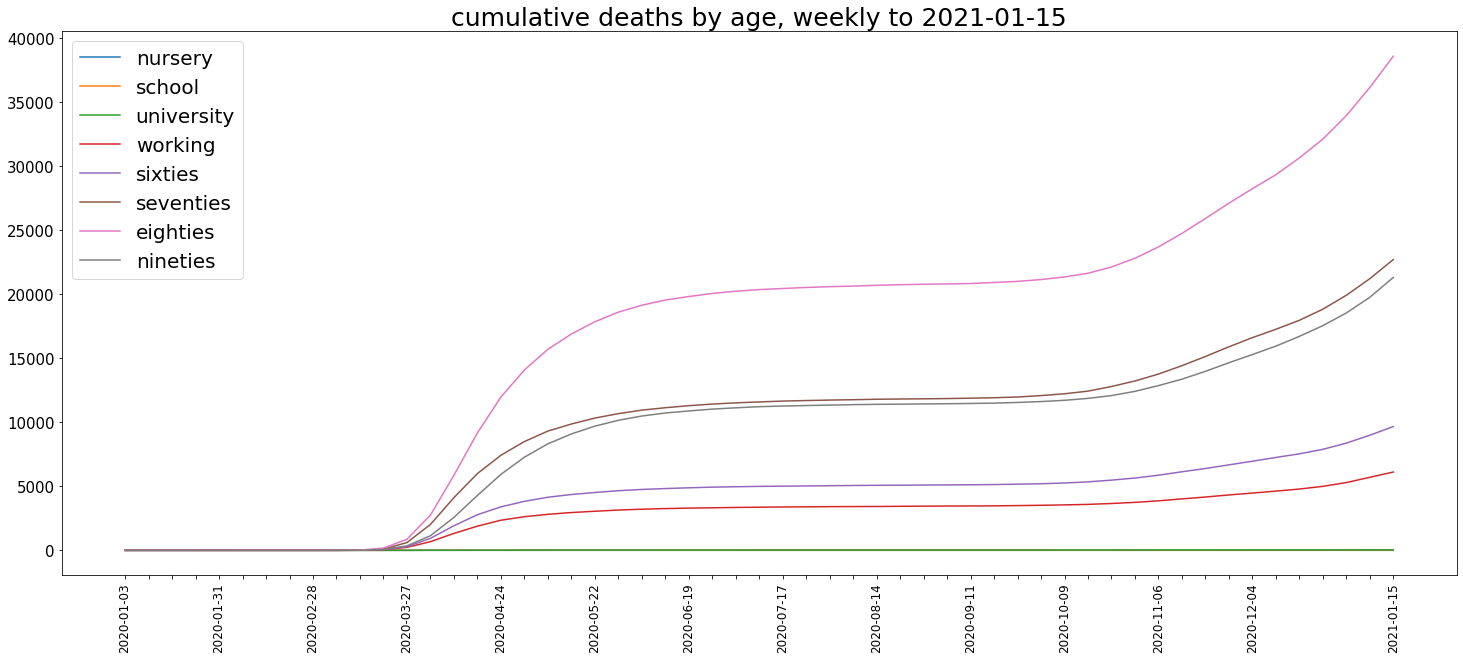

In [187]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'cumulative deaths by age, weekly to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [188]:
columns = ['nursery_cum','school_cum','university_cum','working_cum',
           'sixties_cum']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties']

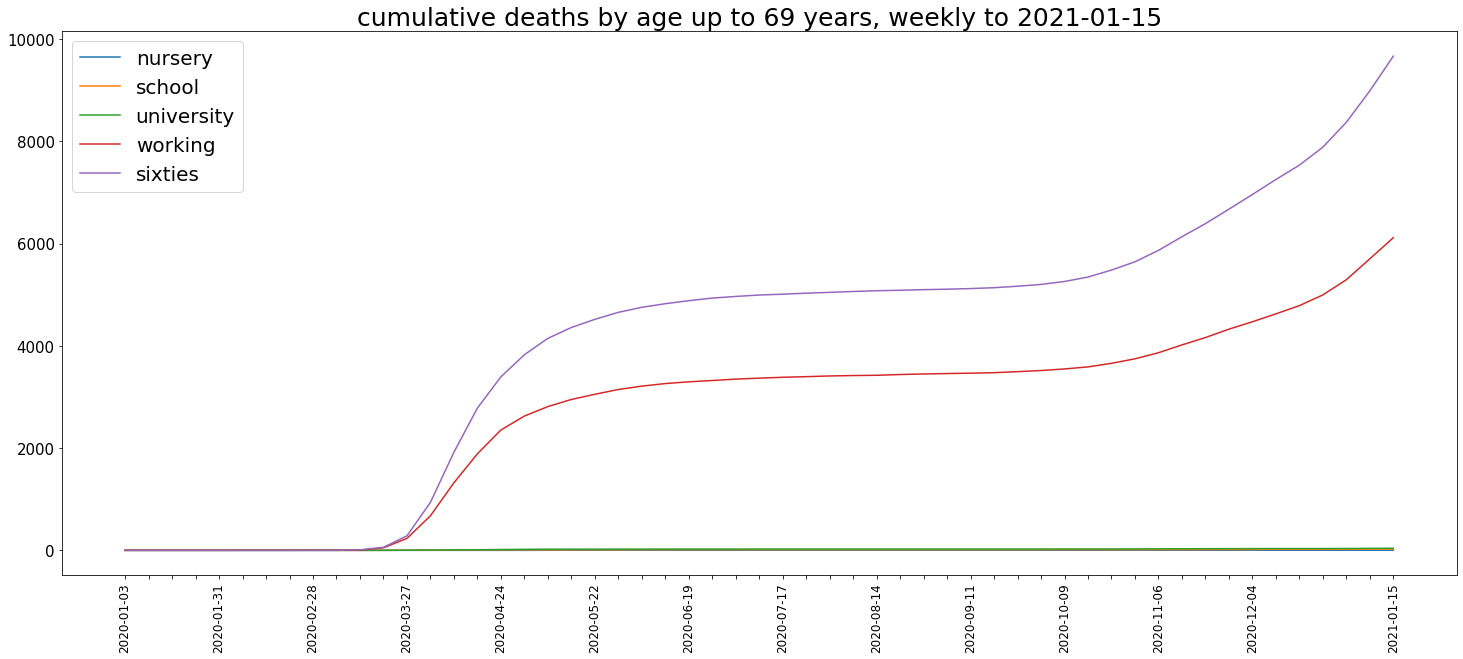

In [189]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'cumulative deaths by age up to 69 years, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [190]:
columns = ['nursery_cum','school_cum','university_cum']
chart_titles = ['nursery', 'school', 'university']

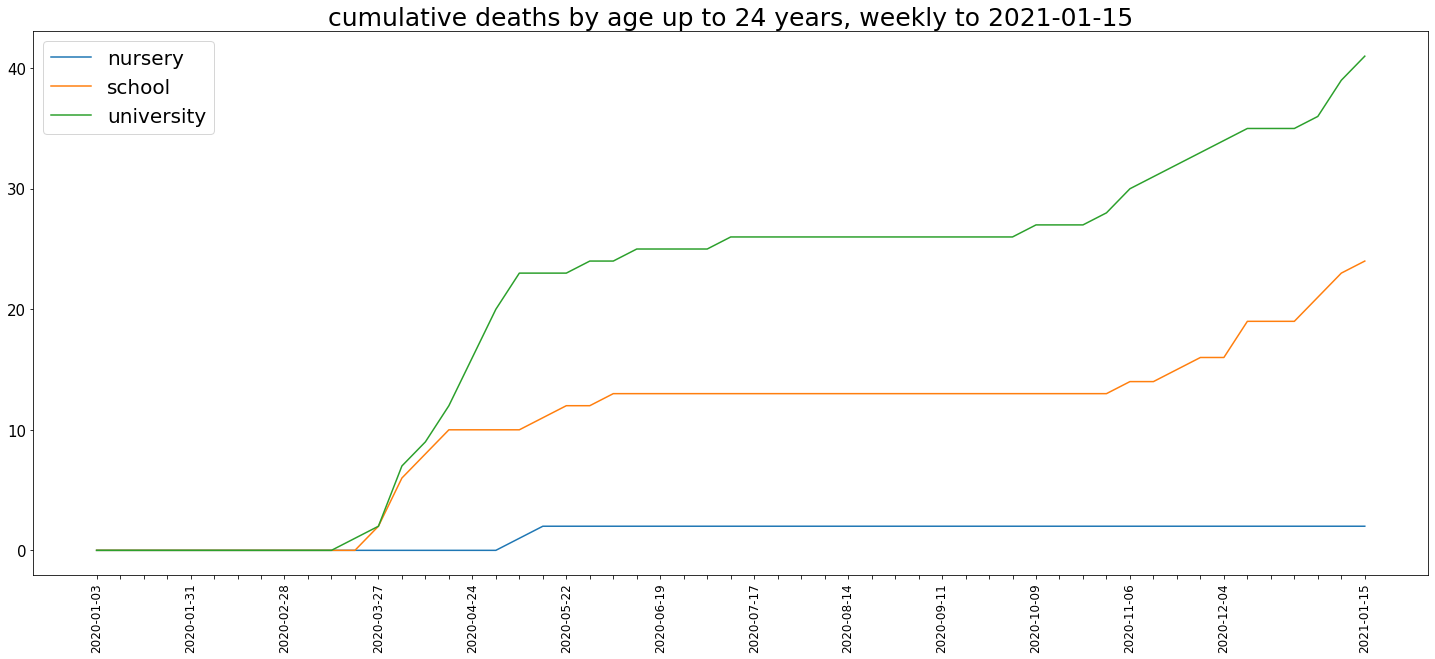

In [191]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'cumulative deaths by age up to 24 years, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [192]:
df_deathsAges.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    4.0    6.0    3.0   
52  2021-01-01  0.0  0.0  2.0    0.0    0.0    1.0    5.0    9.0   14.0   
53  2021-01-08  0.0  0.0  0.0    0.0    2.0    3.0    7.0   10.0   21.0   
54  2021-01-15  0.0  0.0  0.0    0.0    1.0    2.0    2.0    7.0   22.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79   80-84   85-89  \
50   11.0   22.0   44.0   80.0  108.0  173.0  287.0  414.0   627.0   681.0   
51   13.0   30.0   62.0   92.0  134.0  218.0  384.0  484.0   689.0   782.0   
52   19.0   42.0   77.0  131.0  223.0  264.0  447.0  640.0   871.0   964.0   
53   24.0   57.0  114.0  176.0  266.0  348.0  575.0  719.0  1064.0  1132.0   
54   31.0   69.0  105.0  177.0  282.0  397.0  613.0  885.0  1150.0  1295.0   

       90+  nursery  school  university  working  sixties  seventies  \
50   762.0      0.0     0.0         0.0    161.0    281.0      701.0   
51   839.0      0.0     0.0         0.0    210.0    352.0      868.0   
52   988.0      0.0     2.0         1.0    297.0    487.0     1087.0   
53  1224.0      0.0     2.0         3.0    409.0    614.0     1294.0   
54  1550.0      0.0     1.0         2.0    413.0    679.0     1498.0   

    eighties  nineties  nursery_cum  school_cum  university_cum  working_cum  \
50    1308.0     762.0          2.0        19.0            35.0       4786.0   
51    1471.0     839.0          2.0        19.0            35.0       4996.0   
52    1835.0     988.0          2.0        21.0            36.0       5293.0   
53    2196.0    1224.0          2.0        23.0            39.0       5702.0   
54    2445.0    1550.0          2.0        24.0            41.0       6115.0   

    sixties_cum  seventies_cum  eighties_cum  nineties_cum  
50       7534.0        17961.0       30639.0       16707.0  
51       7886.0        18829.0       32110.0       17546.0  
52       8373.0        19916.0       33945.0       18534.0  
53       8987.0        21210.0       36141.0       19758.0  
54       9666.0        22708.0       38586.0       21308.0

In [193]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data looking at all deaths and covid deaths by age (always a couple of weeks behind)')
    slideText.append('')
    imagePath.append('')

plt.show()

In [194]:
df_deathsAges_all.head()

age  2020-01-03  2020-01-10  2020-01-17  2020-01-24  2020-01-31  \
0     <1        48.0        50.0        69.0        53.0        50.0   
1    1-4         8.0         9.0         7.0         9.0         6.0   
2    5-9         4.0         8.0         5.0         4.0         5.0   
3  10-14         4.0         9.0         4.0         8.0         4.0   
4  15-19         6.0        16.0        10.0        15.0        23.0   

   2020-02-07  2020-02-14  2020-02-21  2020-02-28  2020-03-06  2020-03-13  \
0        30.0        43.0        51.0        49.0        56.0        53.0   
1         8.0         6.0         5.0         7.0        11.0        13.0   
2         4.0         2.0         6.0         6.0         2.0         3.0   
3         4.0         4.0         7.0         7.0         7.0         6.0   
4        10.0        16.0        20.0        24.0        21.0        18.0   

   2020-03-20  2020-03-27  2020-04-03  2020-04-10  2020-04-17  2020-04-24  \
0        44.0        49.0        51.0        38.0        51.0        54.0   
1         2.0         8.0         8.0         6.0         6.0         6.0   
2         6.0         1.0         5.0         4.0         5.0         3.0   
3         4.0         4.0         8.0         4.0         4.0         3.0   
4        15.0        12.0         9.0         8.0        20.0        11.0   

   2020-05-01  2020-05-08  2020-05-15  2020-05-22  2020-05-29  2020-06-05  \
0        48.0        28.0        56.0        51.0        40.0        44.0   
1         8.0         6.0        10.0         4.0         6.0         4.0   
2         0.0         4.0         5.0         5.0         3.0         4.0   
3         3.0        10.0         4.0         7.0         5.0         8.0   
4        14.0         9.0        13.0        13.0         7.0        10.0   

   2020-06-12  2020-06-19  2020-06-26  2020-07-03  2020-07-10  2020-07-17  \
0        44.0        48.0        47.0        47.0        58.0        35.0   
1         4.0        10.0         4.0         7.0         3.0         6.0   
2         2.0         5.0         4.0         2.0         2.0         4.0   
3         5.0         4.0         3.0         4.0         5.0         0.0   
4        10.0         9.0         2.0        14.0        11.0        10.0   

   2020-07-24  2020-07-31  2020-08-07  2020-08-14  2020-08-21  2020-08-28  \
0        49.0        45.0        44.0        50.0        49.0        38.0   
1         3.0        11.0         4.0         5.0         7.0         5.0   
2         5.0         5.0         5.0         2.0         4.0         7.0   
3         4.0         3.0         6.0         8.0         5.0         6.0   
4         9.0        12.0        13.0        12.0        14.0        14.0   

   2020-09-04  2020-09-11  2020-09-18  2020-09-25  2020-10-02  2020-10-09  \
0        29.0        39.0        36.0        45.0        47.0        45.0   
1         3.0         6.0         4.0         7.0         3.0         6.0   
2         2.0         5.0         4.0         3.0         3.0         5.0   
3         5.0         3.0         7.0         7.0        10.0         6.0   
4         7.0        15.0        15.0        13.0        12.0        12.0   

   2020-10-16  2020-10-23  2020-10-30  2020-11-06  2020-11-13  2020-11-20  \
0        41.0        34.0        31.0        43.0        45.0        54.0   
1         6.0         2.0         6.0         6.0         8.0        11.0   
2         4.0         7.0         2.0         2.0         7.0         6.0   
3         3.0         5.0         5.0         4.0         3.0         4.0   
4        15.0        14.0        15.0        12.0         7.0        17.0   

   2020-11-27  2020-12-04  2020-12-11  2020-12-18  2020-12-25  2021-01-01  \
0        44.0        50.0        45.0        46.0        33.0        32.0   
1         7.0         4.0         3.0         5.0         7.0         4.0   
2         5.0         3.0        11.0         4.0         5.0         1.0   
3         5.0         8

In [195]:
df_deathsAges_all.set_index('age', inplace=True)
df_deathsAges_all = df_deathsAges_all.T
df_deathsAges_all.reset_index(inplace=True)
df_deathsAges_all.rename(columns={"index": "date"}, inplace=True)
df_deathsAges_all.columns.name=''

In [196]:
nursery = ['<1', '1-4']
school = ['15-19','10-14','5-9']
university = ['20-24']
working = ['55-59', '50-54','45-49','40-44','35-39','30-34','25-29']
sixties = ['60-64','65-69']
seventies = ['70-74','75-79']
eighties = ['80-84','85-89']
nineties = ['90+']

In [197]:
create_new_columns(df_deathsAges_all,nursery,'nursery')
create_new_columns(df_deathsAges_all,school,'school')
create_new_columns(df_deathsAges_all,university,'university')
create_new_columns(df_deathsAges_all,working,'working')
create_new_columns(df_deathsAges_all,sixties,'sixties')
create_new_columns(df_deathsAges_all,seventies,'seventies')
create_new_columns(df_deathsAges_all,eighties,'eighties')
create_new_columns(df_deathsAges_all,nineties,'nineties')

In [198]:
# cumulative deaths

columns = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

for i in range(len(columns)):
    df_deathsAges_all[columns[i] + '_cum'] = df_deathsAges_all[columns[i]].cumsum()

In [199]:
df_deathsAges_all.columns += '_all'
df_deathsAges_all.columns.values[0] = 'date'

In [200]:
df_deathsAges_all.head()

date  <1_all  1-4_all  5-9_all  10-14_all  15-19_all  20-24_all  \
0  2020-01-03    48.0      8.0      4.0        4.0        6.0       11.0   
1  2020-01-10    50.0      9.0      8.0        9.0       16.0       23.0   
2  2020-01-17    69.0      7.0      5.0        4.0       10.0       25.0   
3  2020-01-24    53.0      9.0      4.0        8.0       15.0       30.0   
4  2020-01-31    50.0      6.0      5.0        4.0       23.0       23.0   

   25-29_all  30-34_all  35-39_all  40-44_all  45-49_all  50-54_all  \
0       17.0       32.0       54.0       69.0      115.0      239.0   
1       37.0       46.0       68.0       85.0      191.0      279.0   
2       37.0       47.0       77.0      118.0      189.0      306.0   
3       36.0       38.0       79.0      116.0      160.0      280.0   
4       28.0       58.0       76.0      100.0      163.0      278.0   

   55-59_all  60-64_all  65-69_all  70-74_all  75-79_all  80-84_all  \
0      361.0      486.0      696.0     1164.0     1535.0     2049.0   
1      426.0      604.0      857.0     1341.0     1724.0     2290.0   
2      461.0      562.0      803.0     1210.0     1612.0     2103.0   
3      381.0      535.0      791.0     1167.0     1474.0     1863.0   
4      382.0      525.0      732.0     1196.0     1445.0     1811.0   

   85-89_all  90+_all  nursery_all  school_all  university_all  working_all  \
0     2457.0   2898.0         56.0        14.0            11.0        887.0   
1     2697.0   3297.0         59.0        33.0            23.0       1132.0   
2     2421.0   2924.0         76.0        19.0            25.0       1235.0   
3     2188.0   2626.0         62.0        27.0            30.0       1090.0   
4     2124.0   2583.0         56.0        32.0            23.0       1085.0   

   sixties_all  seventies_all  eighties_all  nineties_all  nursery_cum_all  \
0       1182.0         2699.0        4506.0        2898.0             56.0   
1       1461.0         3065.0        4987.0        3297.0            115.0   
2       1365.0         2822.0        4524.0        2924.0            191.0   
3       1326.0         2641.0        4051.0        2626.0            253.0   
4       1257.0         2641.0        3935.0        2583.0            309.0   

   school_cum_all  university_cum_all  working_cum_all  sixties_cum_all  \
0            14.0                11.0            887.0           1182.0   
1            47.0                34.0           2019.0           2643.0   
2            66.0                59.0           3254.0           4008.0   
3            93.0                89.0           4344.0           5334.0   
4           125.0               112.0           5429.0           6591.0   

   seventies_cum_all  eighties_cum_all  nineties_cum_all  
0             2699.0            4506.0            2898.0  
1             5764.0            9493.0            6195.0  
2             8586.0           14017.0            9119.0  
3            11227.0           18068.0           11745.0  
4            13868.0           22003.0           14328.0

In [201]:
df_deathsAges.head()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  40-44  \
0  2020-01-03  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  2020-01-10  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  2020-01-17  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  2020-01-24  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  2020-01-31  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90+  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  0.0   

   nursery  school  university  working  sixties  seventies  eighties  \
0      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
1      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
2      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
3      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
4      0.0     0.0         0.0      0.0      0.0        0.0       1.0   

   nineties  nursery_cum  school_cum  university_cum  working_cum  \
0       0.0          0.0         0.0             0.0          0.0   
1       0.0          0.0         0.0             0.0          0.0   
2       0.0          0.0         0.0             0.0          0.0   
3       0.0          0.0         0.0             0.0          0.0   
4       0.0          0.0         0.0             0.0          0.0   

   sixties_cum  seventies_cum  eighties_cum  nineties_cum  
0          0.0            0.0           0.0           0.0  
1          0.0            0.0           0.0           0.0  
2          0.0            0.0           0.0           0.0  
3          0.0            0.0           0.0           0.0  
4          0.0            0.0           1.0           0.0

In [202]:
df_deaths_comp = pd.merge(df_deathsAges, df_deathsAges_all, left_on='date', right_on='date', how='left')

In [203]:
df_deaths_comp.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    4.0    6.0    3.0   
52  2021-01-01  0.0  0.0  2.0    0.0    0.0    1.0    5.0    9.0   14.0   
53  2021-01-08  0.0  0.0  0.0    0.0    2.0    3.0    7.0   10.0   21.0   
54  2021-01-15  0.0  0.0  0.0    0.0    1.0    2.0    2.0    7.0   22.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79   80-84   85-89  \
50   11.0   22.0   44.0   80.0  108.0  173.0  287.0  414.0   627.0   681.0   
51   13.0   30.0   62.0   92.0  134.0  218.0  384.0  484.0   689.0   782.0   
52   19.0   42.0   77.0  131.0  223.0  264.0  447.0  640.0   871.0   964.0   
53   24.0   57.0  114.0  176.0  266.0  348.0  575.0  719.0  1064.0  1132.0   
54   31.0   69.0  105.0  177.0  282.0  397.0  613.0  885.0  1150.0  1295.0   

       90+  nursery  school  university  working  sixties  seventies  \
50   762.0      0.0     0.0         0.0    161.0    281.0      701.0   
51   839.0      0.0     0.0         0.0    210.0    352.0      868.0   
52   988.0      0.0     2.0         1.0    297.0    487.0     1087.0   
53  1224.0      0.0     2.0         3.0    409.0    614.0     1294.0   
54  1550.0      0.0     1.0         2.0    413.0    679.0     1498.0   

    eighties  nineties  nursery_cum  school_cum  university_cum  working_cum  \
50    1308.0     762.0          2.0        19.0            35.0       4786.0   
51    1471.0     839.0          2.0        19.0            35.0       4996.0   
52    1835.0     988.0          2.0        21.0            36.0       5293.0   
53    2196.0    1224.0          2.0        23.0            39.0       5702.0   
54    2445.0    1550.0          2.0        24.0            41.0       6115.0   

    sixties_cum  seventies_cum  eighties_cum  nineties_cum  <1_all  1-4_all  \
50       7534.0        17961.0       30639.0       16707.0    46.0      5.0   
51       7886.0        18829.0       32110.0       17546.0    33.0      7.0   
52       8373.0        19916.0       33945.0       18534.0    32.0      4.0   
53       8987.0        21210.0       36141.0       19758.0    52.0      6.0   
54       9666.0        22708.0       38586.0       21308.0    52.0      3.0   

    5-9_all  10-14_all  15-19_all  20-24_all  25-29_all  30-34_all  35-39_all  \
50      4.0        5.0       11.0       24.0       38.0       57.0       73.0   
51      5.0        6.0       10.0       21.0       35.0       46.0       70.0   
52      1.0        9.0        8.0       10.0       24.0       27.0       43.0   
53      4.0        2.0       15.0       23.0       29.0       57.0       72.0   
54      1.0        5.0       14.0       26.0       37.0       56.0      102.0   

    40-44_all  45-49_all  50-54_all  55-59_all  60-64_all  65-69_all  \
50      115.0      189.0      317.0      437.0      581.0      805.0   
51       99.0      179.0      262.0      359.0      515.0      729.0   
52       68.0      123.0      203.0      311.0      449.0      619.0   
53      107.0      231.0      392.0      547.0      808.0     1097.0   
54      152.0      241.0      419.0      572.0      869.0     1145.0   

    70-74_all  75-79_all  80-84_all  85-89_all  90+_all  nursery_all  \
50     1246.0     1614.0     2124.0     2439.0   2881.0         51.0   
51     1154.0     1436.0     1892.0     2154.0   2508.0         40.0   
52      990.0     1262.0     1651.0     1980.0   2255.0         36.0   
53     1748.0     2284.0     2985.0     3296.0   3996.0         58.0   
54     1799.0     2280.0     3004.0     3278.0   3987.0         55.0   

    school_all  university_all  working_all  sixties_all  seventies_all  \
50        20.0            24.0       1226.0       1386.0         2860.0   
51        21.0            21.0       1050.0       1244.0         2590.0   
52        18.0            10.0        799.0       1068.0         2252.0   
53        21.0            23.0       1435.0     

In [204]:
col_names = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

for i in range(len(col_names)):
    df_deaths_comp[str(col_names[i]) + '_%'] = (df_deaths_comp[str(col_names[i]) + '_cum']
                                                /df_deaths_comp[str(col_names[i]) + '_cum_all'])

In [205]:
col_names = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

col_names_new = [s + '_cum_all' for s in col_names]

In [206]:
df_deaths_comp['total_cum_all'] = df_deaths_comp[col_names_new].sum(axis=1)

In [207]:
col_names = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

col_names_new = [s + '_cum' for s in col_names]

In [208]:
df_deaths_comp['total_cum'] = df_deaths_comp[col_names_new].sum(axis=1)

In [209]:
df_deaths_comp.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    4.0    6.0    3.0   
52  2021-01-01  0.0  0.0  2.0    0.0    0.0    1.0    5.0    9.0   14.0   
53  2021-01-08  0.0  0.0  0.0    0.0    2.0    3.0    7.0   10.0   21.0   
54  2021-01-15  0.0  0.0  0.0    0.0    1.0    2.0    2.0    7.0   22.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79   80-84   85-89  \
50   11.0   22.0   44.0   80.0  108.0  173.0  287.0  414.0   627.0   681.0   
51   13.0   30.0   62.0   92.0  134.0  218.0  384.0  484.0   689.0   782.0   
52   19.0   42.0   77.0  131.0  223.0  264.0  447.0  640.0   871.0   964.0   
53   24.0   57.0  114.0  176.0  266.0  348.0  575.0  719.0  1064.0  1132.0   
54   31.0   69.0  105.0  177.0  282.0  397.0  613.0  885.0  1150.0  1295.0   

       90+  nursery  school  university  working  sixties  seventies  \
50   762.0      0.0     0.0         0.0    161.0    281.0      701.0   
51   839.0      0.0     0.0         0.0    210.0    352.0      868.0   
52   988.0      0.0     2.0         1.0    297.0    487.0     1087.0   
53  1224.0      0.0     2.0         3.0    409.0    614.0     1294.0   
54  1550.0      0.0     1.0         2.0    413.0    679.0     1498.0   

    eighties  nineties  nursery_cum  school_cum  university_cum  working_cum  \
50    1308.0     762.0          2.0        19.0            35.0       4786.0   
51    1471.0     839.0          2.0        19.0            35.0       4996.0   
52    1835.0     988.0          2.0        21.0            36.0       5293.0   
53    2196.0    1224.0          2.0        23.0            39.0       5702.0   
54    2445.0    1550.0          2.0        24.0            41.0       6115.0   

    sixties_cum  seventies_cum  eighties_cum  nineties_cum  <1_all  1-4_all  \
50       7534.0        17961.0       30639.0       16707.0    46.0      5.0   
51       7886.0        18829.0       32110.0       17546.0    33.0      7.0   
52       8373.0        19916.0       33945.0       18534.0    32.0      4.0   
53       8987.0        21210.0       36141.0       19758.0    52.0      6.0   
54       9666.0        22708.0       38586.0       21308.0    52.0      3.0   

    5-9_all  10-14_all  15-19_all  20-24_all  25-29_all  30-34_all  35-39_all  \
50      4.0        5.0       11.0       24.0       38.0       57.0       73.0   
51      5.0        6.0       10.0       21.0       35.0       46.0       70.0   
52      1.0        9.0        8.0       10.0       24.0       27.0       43.0   
53      4.0        2.0       15.0       23.0       29.0       57.0       72.0   
54      1.0        5.0       14.0       26.0       37.0       56.0      102.0   

    40-44_all  45-49_all  50-54_all  55-59_all  60-64_all  65-69_all  \
50      115.0      189.0      317.0      437.0      581.0      805.0   
51       99.0      179.0      262.0      359.0      515.0      729.0   
52       68.0      123.0      203.0      311.0      449.0      619.0   
53      107.0      231.0      392.0      547.0      808.0     1097.0   
54      152.0      241.0      419.0      572.0      869.0     1145.0   

    70-74_all  75-79_all  80-84_all  85-89_all  90+_all  nursery_all  \
50     1246.0     1614.0     2124.0     2439.0   2881.0         51.0   
51     1154.0     1436.0     1892.0     2154.0   2508.0         40.0   
52      990.0     1262.0     1651.0     1980.0   2255.0         36.0   
53     1748.0     2284.0     2985.0     3296.0   3996.0         58.0   
54     1799.0     2280.0     3004.0     3278.0   3987.0         55.0   

    school_all  university_all  working_all  sixties_all  seventies_all  \
50        20.0            24.0       1226.0       1386.0         2860.0   
51        21.0            21.0       1050.0       1244.0         2590.0   
52        18.0            10.0        799.0       1068.0         2252.0   
53        21.0            23.0       1435.0     

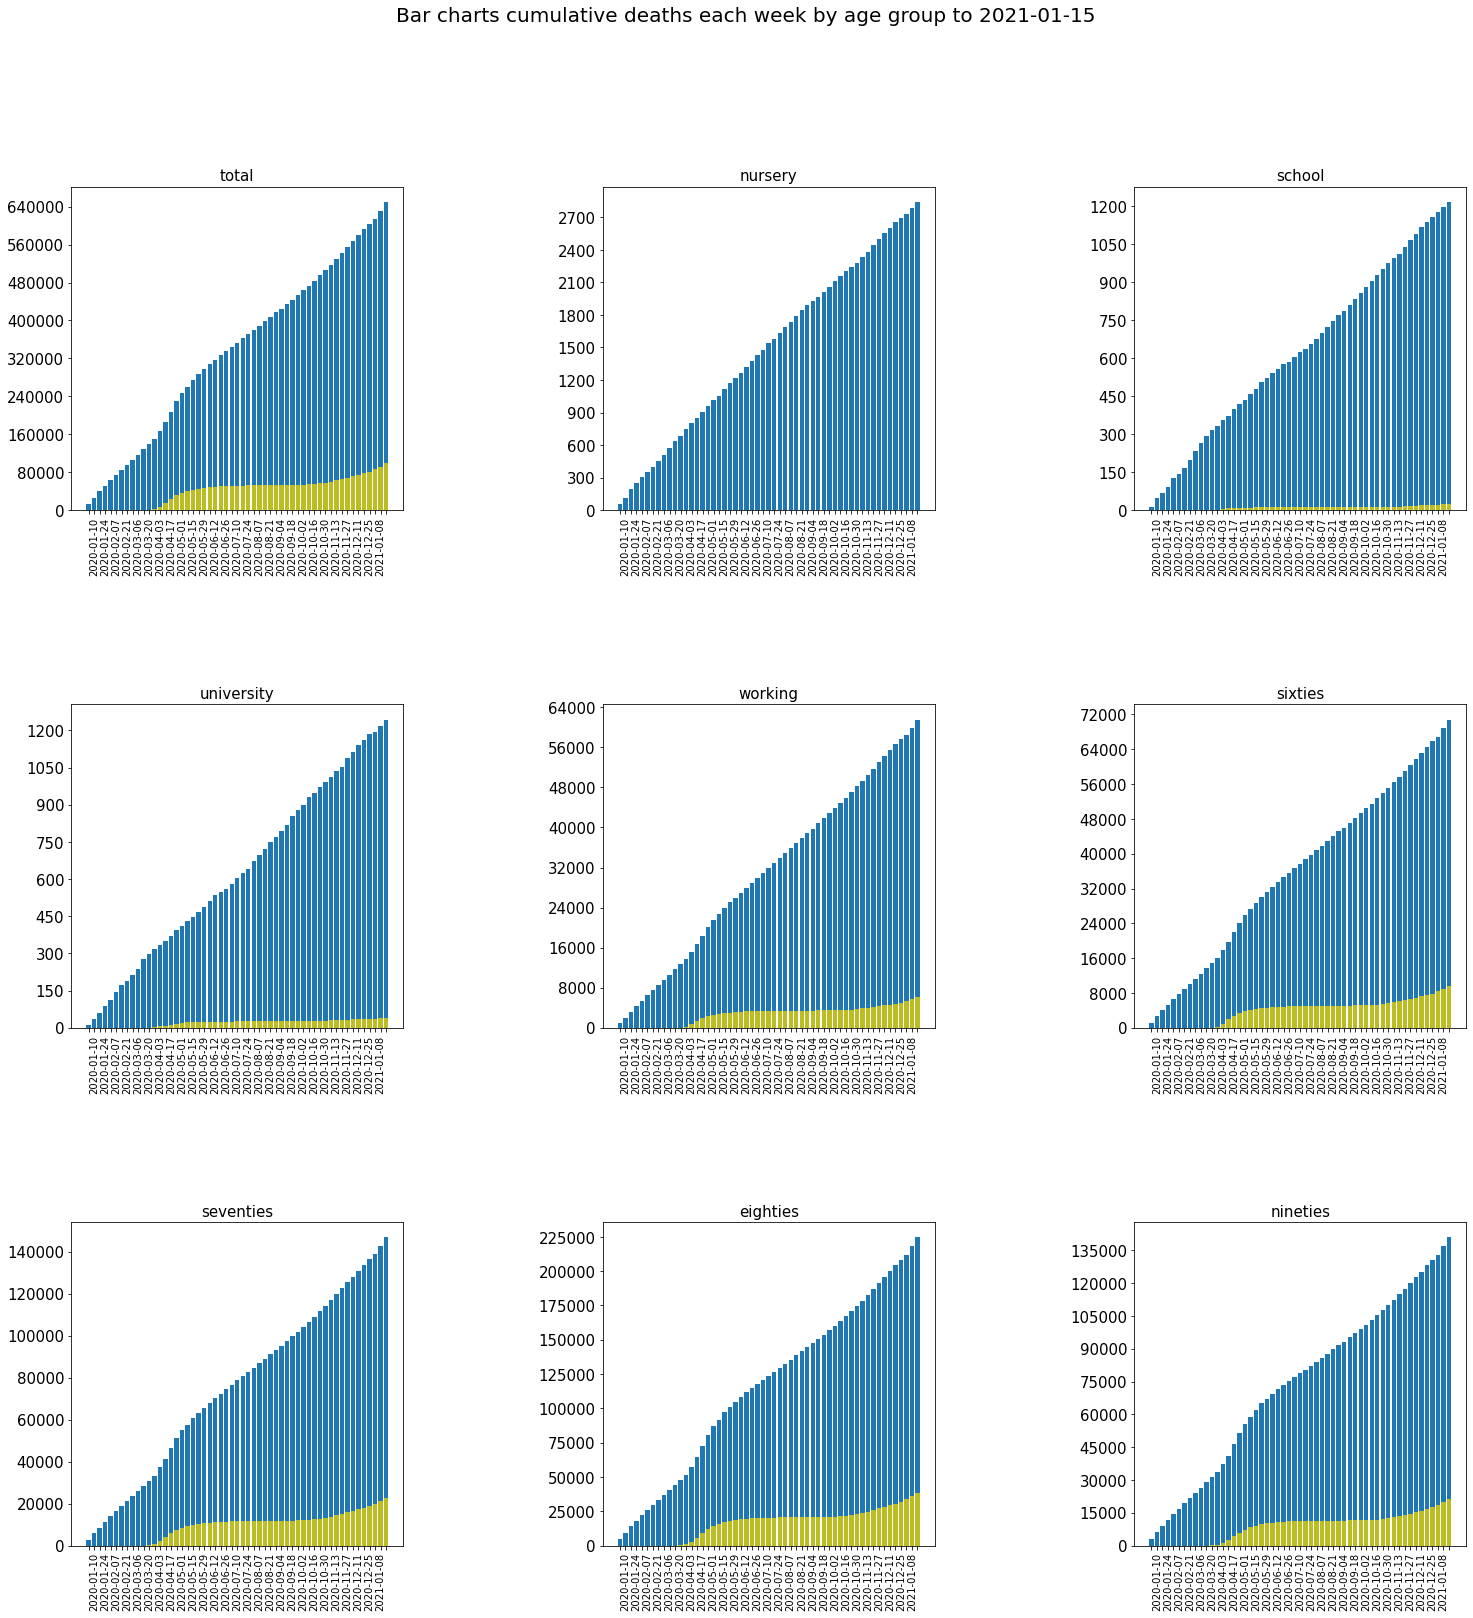

In [210]:
# bar charts showing number of deaths for each age group per week

col_names = ['total', 'nursery','school','university','working',
             'sixties','seventies','eighties','nineties']

#fig, ax = plt.subplots(nrows=int(len(col_names)/3)+1, ncols=3, figsize=(25,25))
fig, ax = plt.subplots(nrows=int(len(col_names)/3), ncols=3, figsize=(25,25))

plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.suptitle('Bar charts cumulative deaths each week by age group to ' + last_date, fontsize = 20)
#plt.suptitle("anything over 'Less than a year' indicates that returning members keep their history", fontsize = 20)

x = df_deaths_comp.index.values

labels = list(df_deaths_comp['date'])

for i in range(1,len(labels),2):
    labels[i-1]=''
if len(labels) % 2 != 0:
    labels[-1]=''

for ii in range(len(col_names)):
    #for i in range(len(df)):
    y1 = df_deaths_comp[col_names[ii] + '_cum_all']
    y2 = df_deaths_comp[col_names[ii] + '_cum']
    ax[int(ii/3),ii - 3*int(ii/3)].set_title(col_names[ii], fontsize=15)
    ax[int(ii/3),ii - 3*int(ii/3)].set_xticks(x)
    ax[int(ii/3),ii - 3*int(ii/3)].set_xticklabels(labels, rotation = 90)
    ax[int(ii/3),ii - 3*int(ii/3)].yaxis.set_tick_params(labelsize=15)
    ax[int(ii/3),ii - 3*int(ii/3)].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[int(ii/3),ii - 3*int(ii/3)].bar(x,y1, color='#1f77b4')
    ax[int(ii/3),ii - 3*int(ii/3)].bar(x,y2, color='#bcbd22')
    #ax[int(ii/3),ii - 3*int(ii/3)].bar(df_deaths_comp['date'][i],y1[i], color='#1f77b4')

start_date = df_deaths_comp['date'].iloc[0]
end_date = df_deaths_comp['date'].iloc[-1]

if savePNG == 1 or PwrptPrep == 1:
    fileName = 'Coviduk - Bar charts cumulative deaths each week by age group.png'
    
    slideTitle.append('Bar charts cumulative deaths each week by age group to ' + last_date)
    slideText.append(str(start_date) + ' to ' + str(end_date))
    imagePath.append(fileName)

    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName, bbox_inches = 'tight')
    
#     slideTitle_ = 'Bar charts cumulative deaths each week by age group to ' + last_date
#     slideText_ = (str(start_date) + ' to ' + str(end_date))
#     imagePath_ = (fileName)  
    
plt.show()

In [211]:
columns = ['nursery_%','school_%','university_%','working_%',
           'sixties_%','seventies_%','eighties_%','nineties_%']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

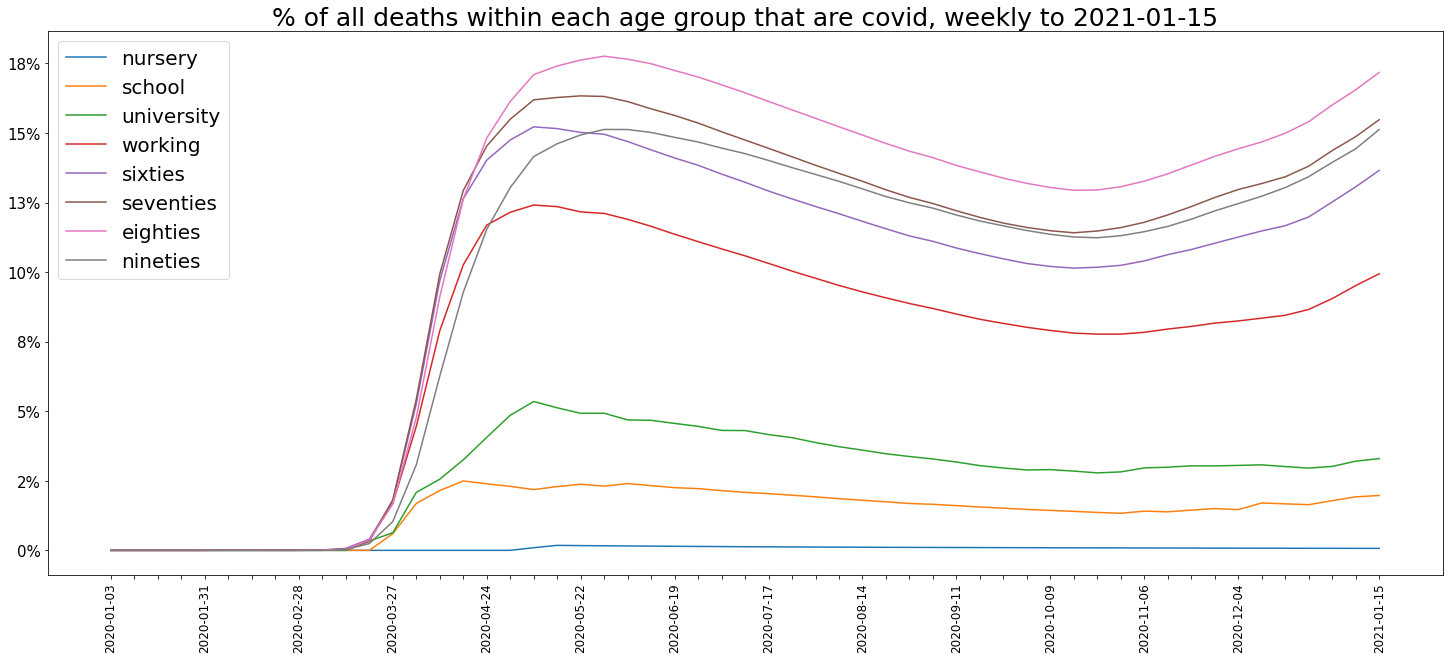

In [212]:
return1, return2, return3 = multiple_line_charts(df_deaths_comp, columns, chart_titles, '% of all deaths within each age group that are covid, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [213]:
df_deathsAges_all_totals.head()

Week ended  2020-01-03  2020-01-10  \
0                             Total deaths, all ages     12254.0     14058.0   
1  week over the previous 5 years 1, 10, 11 (Engl...     12175.0     13822.0   

   2020-01-17  2020-01-24  2020-01-31  2020-02-07  2020-02-14  2020-02-21  \
0     12990.0     11856.0     11612.0     10986.0     10944.0     10841.0   
1     13216.0     12760.0     12206.0     11925.0     11627.0     11548.0   

   2020-02-28  2020-03-06  2020-03-13  2020-03-20  2020-03-27  2020-04-03  \
0     10816.0     10895.0     11019.0     10645.0     11141.0     16387.0   
1     11183.0     11498.0     11205.0     10573.0     10130.0     10305.0   

   2020-04-10  2020-04-17  2020-04-24  2020-05-01  2020-05-08  2020-05-15  \
0     18516.0     22351.0     21997.0     17953.0     12657.0     14573.0   
1     10520.0     10497.0     10458.0      9941.0      9576.0     10188.0   

   2020-05-22  2020-05-29  2020-06-05  2020-06-12  2020-06-19  2020-06-26  \
0     12288.0      9824.0     10709.0      9976.0      9339.0      8979.0   
1      9940.0      8171.0      9977.0      9417.0      9404.0      9293.0   

   2020-07-03  2020-07-10  2020-07-17  2020-07-24  2020-07-31  2020-08-07  \
0      9140.0      8690.0      8823.0      8891.0      8946.0      8945.0   
1      9183.0      9250.0      9093.0      9052.0      9036.0      9102.0   

   2020-08-14  2020-08-21  2020-08-28  2020-09-04  2020-09-11  2020-09-18  \
0      9392.0      9631.0      9032.0      7739.0      9811.0      9523.0   
1      9085.0      9157.0      8241.0      9182.0      9306.0      9264.0   

   2020-09-25  2020-10-02  2020-10-09  2020-10-16  2020-10-23  2020-10-30  \
0      9634.0      9945.0      9954.0     10534.0     10739.0     10887.0   
1      9377.0      9555.0      9811.0      9865.0      9759.0      9891.0   

   2020-11-06  2020-11-13  2020-11-20  2020-11-27  2020-12-04  2020-12-11  \
0     11812.0     12254.0     12535.0     12456.0     12303.0     12292.0   
1     10331.0     10350.0     10380.0     10357.0     10695.0     10750.0   

   2020-12-18  2020-12-25  2021-01-01  2021-01-08  2021-01-15  
0     13011.0     11520.0     10069.0     17751.0     18042.0  
1     11548.0      7954.0      7954.0     12175.0     13822.0

In [214]:
df_deathsAges_all_totals.set_index('Week ended', inplace=True)
df_deathsAges_all_totals = df_deathsAges_all_totals.T
df_deathsAges_all_totals.reset_index(inplace=True)
df_deathsAges_all_totals.rename(columns={"index": "date"}, inplace=True)
df_deathsAges_all_totals.columns.name=''

In [215]:
df_deathsAges_all_totals.head()

date  Total deaths, all ages  \
0  2020-01-03                 12254.0   
1  2020-01-10                 14058.0   
2  2020-01-17                 12990.0   
3  2020-01-24                 11856.0   
4  2020-01-31                 11612.0   

   week over the previous 5 years 1, 10, 11 (England and Wales)  
0                                            12175.0             
1                                            13822.0             
2                                            13216.0             
3                                            12760.0             
4                                            12206.0

In [216]:
df_deaths_comp = pd.merge(df_deaths_comp, df_deathsAges_all_totals, left_on='date', right_on='date', how='left')

In [217]:
final_column = df_deathsAges_all_totals.columns.tolist()[-1]

In [218]:
df_deaths_comp['5_year_average_cum'] = df_deaths_comp[final_column].cumsum()

In [219]:
df_deaths_comp['all_ex_covid'] = df_deaths_comp['total_cum_all'] - df_deaths_comp['total_cum']

In [220]:
df_deaths_comp['excess_deaths_incl_covid'] = df_deaths_comp['total_cum_all'] - df_deaths_comp['5_year_average_cum']
df_deaths_comp['excess_deaths_ex_covid'] = df_deaths_comp['all_ex_covid'] - df_deaths_comp['5_year_average_cum']

In [221]:
df_deaths_comp.head()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  40-44  \
0  2020-01-03  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  2020-01-10  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  2020-01-17  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  2020-01-24  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  2020-01-31  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90+  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  0.0   

   nursery  school  university  working  sixties  seventies  eighties  \
0      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
1      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
2      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
3      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
4      0.0     0.0         0.0      0.0      0.0        0.0       1.0   

   nineties  nursery_cum  school_cum  university_cum  working_cum  \
0       0.0          0.0         0.0             0.0          0.0   
1       0.0          0.0         0.0             0.0          0.0   
2       0.0          0.0         0.0             0.0          0.0   
3       0.0          0.0         0.0             0.0          0.0   
4       0.0          0.0         0.0             0.0          0.0   

   sixties_cum  seventies_cum  eighties_cum  nineties_cum  <1_all  1-4_all  \
0          0.0            0.0           0.0           0.0    48.0      8.0   
1          0.0            0.0           0.0           0.0    50.0      9.0   
2          0.0            0.0           0.0           0.0    69.0      7.0   
3          0.0            0.0           0.0           0.0    53.0      9.0   
4          0.0            0.0           1.0           0.0    50.0      6.0   

   5-9_all  10-14_all  15-19_all  20-24_all  25-29_all  30-34_all  35-39_all  \
0      4.0        4.0        6.0       11.0       17.0       32.0       54.0   
1      8.0        9.0       16.0       23.0       37.0       46.0       68.0   
2      5.0        4.0       10.0       25.0       37.0       47.0       77.0   
3      4.0        8.0       15.0       30.0       36.0       38.0       79.0   
4      5.0        4.0       23.0       23.0       28.0       58.0       76.0   

   40-44_all  45-49_all  50-54_all  55-59_all  60-64_all  65-69_all  \
0       69.0      115.0      239.0      361.0      486.0      696.0   
1       85.0      191.0      279.0      426.0      604.0      857.0   
2      118.0      189.0      306.0      461.0      562.0      803.0   
3      116.0      160.0      280.0      381.0      535.0      791.0   
4      100.0      163.0      278.0      382.0      525.0      732.0   

   70-74_all  75-79_all  80-84_all  85-89_all  90+_all  nursery_all  \
0     1164.0     1535.0     2049.0     2457.0   2898.0         56.0   
1     1341.0     1724.0     2290.0     2697.0   3297.0         59.0   
2     1210.0     1612.0     2103.0     2421.0   2924.0         76.0   
3     1167.0     1474.0     1863.0     2188.0   2626.0         62.0   
4     1196.0     1445.0     1811.0     2124.0   2583.0         56.0   

   school_all  university_all  working_all  sixties_all  seventies_all  \
0        14.0            11.0        887.0       1182.0         2699.0   
1        33.0            23.0       1132.0       1461.0         3065.0   
2        19.0            25.0       1235.0       1365.0         2822.0   
3        27.0            30.0       1090.0       1326.0         2641.0   
4        32.0            23.0       1085.0       1257.0

In [222]:
columns = ['total_cum_all', 'all_ex_covid', '5_year_average_cum']
chart_titles = ['All deaths incl covid', 'All deaths ex covid', '5 year average']

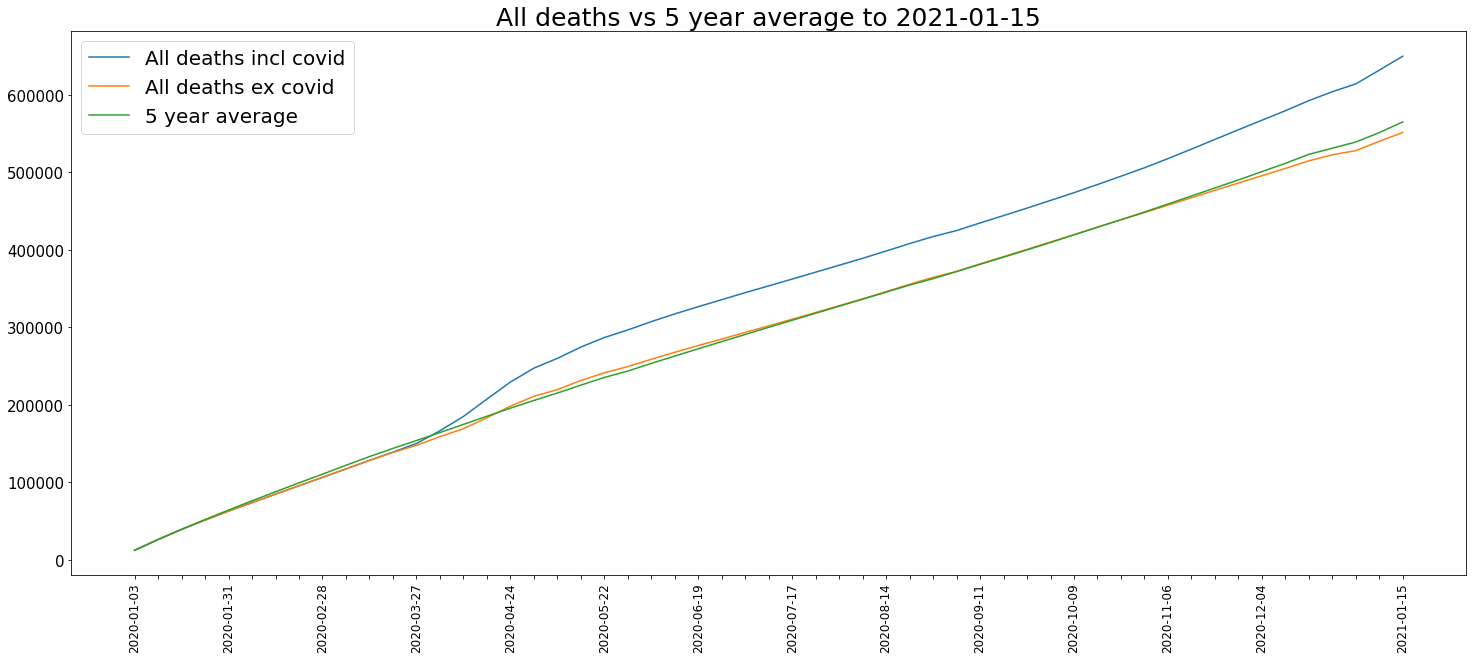

In [223]:
return1, return2, return3 = multiple_line_charts(df_deaths_comp, columns, chart_titles, 'All deaths vs 5 year average to '  + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [224]:
def one_chart_incl_df(df, column, chart_title, bar, percent):

    # plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

    fig, ax = plt.subplots(figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.2)

    x = df.index.values

    labels = list(df['date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y1 = df[column]
    #y2 = df_rightmove['STCs_value_scdhd']/df_rightmove['resi_value_scdhd']
    #y3 = df_rightmove['STCs_value_new']/df_rightmove['resi_value_new']

    ax.set_title(chart_title, fontsize=25)
    ax.set_xticklabels(labels, rotation=90, fontsize=12)
    ax.set_xticks(x)
    
    if percent == 1:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    
    ax.yaxis.set_tick_params(labelsize=15)
    
    if bar == 1:
        ax.bar(x, y1)
    else:
        ax.plot(x, y1)
        
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax.legend(('New Cases by Specimen Date'),fontsize=20)

    # if savePNG == 1 or PwrptPrep == 1:
    #     savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units.png'
    #     plt.savefig(savefig, bbox_inches = 'tight')    
    #     slideTitle.append('Weekly offers on the site as a % of all units')
    #     slideText.append(str(first_data) + ' to '+ str(monthNow))
    #     imagePath.append(savefig)

    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]
    
    fileName = 'Coviduk - onechart ' + str(chart_title) + '.png'  

    plt.savefig(fileName.split('202')[0] + '.png', bbox_inches = 'tight')
    
    slideTitle_ = chart_title
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName.split('202')[0] + '.png')  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_

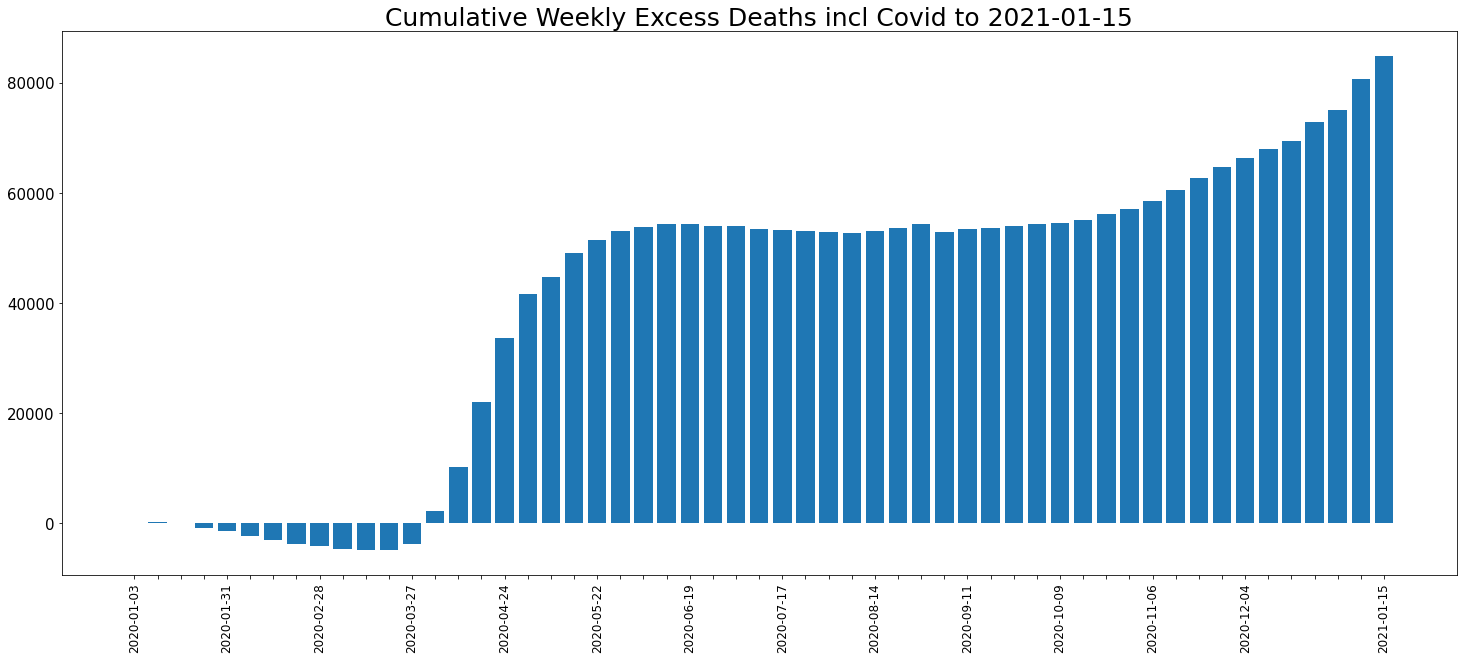

In [225]:
return1, return2, return3 = one_chart_incl_df(df_deaths_comp, 'excess_deaths_incl_covid', 'Cumulative Weekly Excess Deaths incl Covid to '  + last_date,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

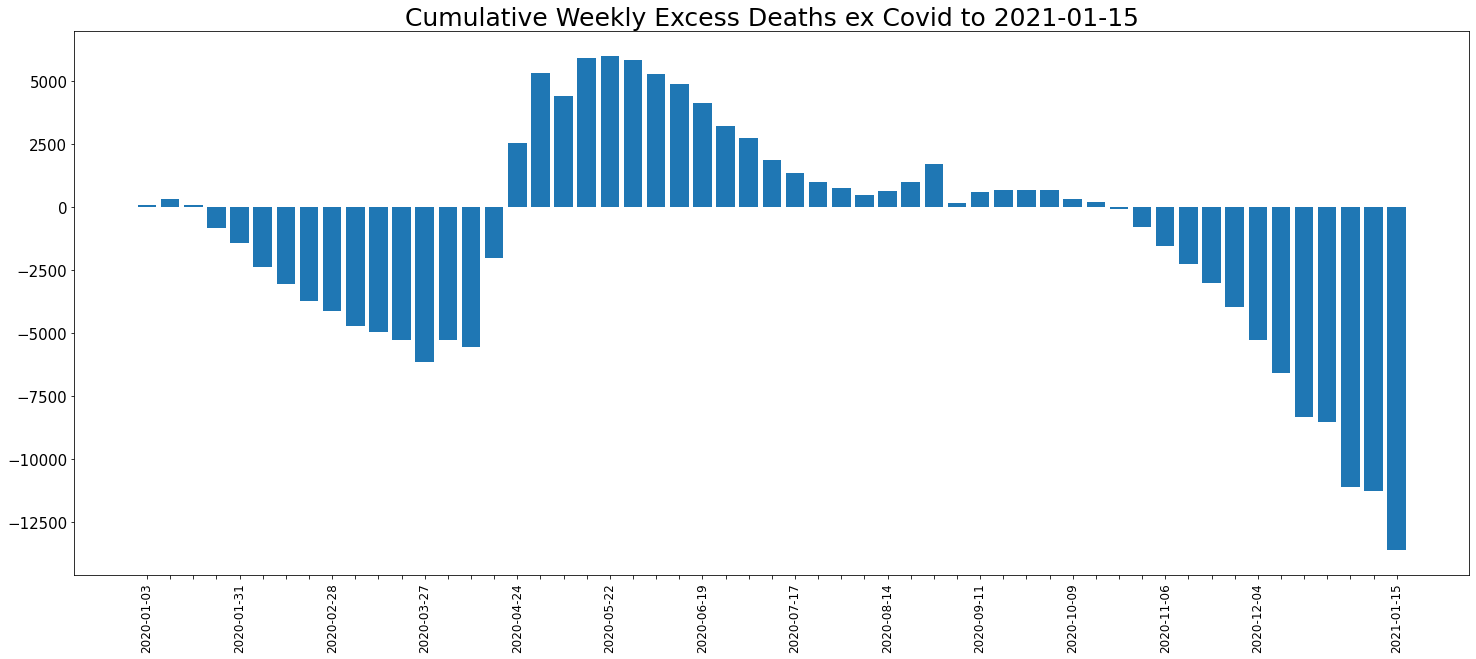

In [226]:
return1, return2, return3 = one_chart_incl_df(df_deaths_comp, 'excess_deaths_ex_covid', 'Cumulative Weekly Excess Deaths ex Covid to '  + last_date,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [227]:
df_deaths_comp.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    4.0    6.0    3.0   
52  2021-01-01  0.0  0.0  2.0    0.0    0.0    1.0    5.0    9.0   14.0   
53  2021-01-08  0.0  0.0  0.0    0.0    2.0    3.0    7.0   10.0   21.0   
54  2021-01-15  0.0  0.0  0.0    0.0    1.0    2.0    2.0    7.0   22.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79   80-84   85-89  \
50   11.0   22.0   44.0   80.0  108.0  173.0  287.0  414.0   627.0   681.0   
51   13.0   30.0   62.0   92.0  134.0  218.0  384.0  484.0   689.0   782.0   
52   19.0   42.0   77.0  131.0  223.0  264.0  447.0  640.0   871.0   964.0   
53   24.0   57.0  114.0  176.0  266.0  348.0  575.0  719.0  1064.0  1132.0   
54   31.0   69.0  105.0  177.0  282.0  397.0  613.0  885.0  1150.0  1295.0   

       90+  nursery  school  university  working  sixties  seventies  \
50   762.0      0.0     0.0         0.0    161.0    281.0      701.0   
51   839.0      0.0     0.0         0.0    210.0    352.0      868.0   
52   988.0      0.0     2.0         1.0    297.0    487.0     1087.0   
53  1224.0      0.0     2.0         3.0    409.0    614.0     1294.0   
54  1550.0      0.0     1.0         2.0    413.0    679.0     1498.0   

    eighties  nineties  nursery_cum  school_cum  university_cum  working_cum  \
50    1308.0     762.0          2.0        19.0            35.0       4786.0   
51    1471.0     839.0          2.0        19.0            35.0       4996.0   
52    1835.0     988.0          2.0        21.0            36.0       5293.0   
53    2196.0    1224.0          2.0        23.0            39.0       5702.0   
54    2445.0    1550.0          2.0        24.0            41.0       6115.0   

    sixties_cum  seventies_cum  eighties_cum  nineties_cum  <1_all  1-4_all  \
50       7534.0        17961.0       30639.0       16707.0    46.0      5.0   
51       7886.0        18829.0       32110.0       17546.0    33.0      7.0   
52       8373.0        19916.0       33945.0       18534.0    32.0      4.0   
53       8987.0        21210.0       36141.0       19758.0    52.0      6.0   
54       9666.0        22708.0       38586.0       21308.0    52.0      3.0   

    5-9_all  10-14_all  15-19_all  20-24_all  25-29_all  30-34_all  35-39_all  \
50      4.0        5.0       11.0       24.0       38.0       57.0       73.0   
51      5.0        6.0       10.0       21.0       35.0       46.0       70.0   
52      1.0        9.0        8.0       10.0       24.0       27.0       43.0   
53      4.0        2.0       15.0       23.0       29.0       57.0       72.0   
54      1.0        5.0       14.0       26.0       37.0       56.0      102.0   

    40-44_all  45-49_all  50-54_all  55-59_all  60-64_all  65-69_all  \
50      115.0      189.0      317.0      437.0      581.0      805.0   
51       99.0      179.0      262.0      359.0      515.0      729.0   
52       68.0      123.0      203.0      311.0      449.0      619.0   
53      107.0      231.0      392.0      547.0      808.0     1097.0   
54      152.0      241.0      419.0      572.0      869.0     1145.0   

    70-74_all  75-79_all  80-84_all  85-89_all  90+_all  nursery_all  \
50     1246.0     1614.0     2124.0     2439.0   2881.0         51.0   
51     1154.0     1436.0     1892.0     2154.0   2508.0         40.0   
52      990.0     1262.0     1651.0     1980.0   2255.0         36.0   
53     1748.0     2284.0     2985.0     3296.0   3996.0         58.0   
54     1799.0     2280.0     3004.0     3278.0   3987.0         55.0   

    school_all  university_all  working_all  sixties_all  seventies_all  \
50        20.0            24.0       1226.0       1386.0         2860.0   
51        21.0            21.0       1050.0       1244.0         2590.0   
52        18.0            10.0        799.0       1068.0         2252.0   
53        21.0            23.0       1435.0     

In [228]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data looking at the Vaccine Rollout)')
    slideText.append('')
    imagePath.append('')

plt.show()

In [229]:
df_vac.head()

date  areaType   areaCode        areaName  \
0  2021-01-10  overview  K02000001  United Kingdom   
1  2021-01-11  overview  K02000001  United Kingdom   
2  2021-01-12  overview  K02000001  United Kingdom   
3  2021-01-13  overview  K02000001  United Kingdom   
4  2021-01-14  overview  K02000001  United Kingdom   

   cumPeopleVaccinatedFirstDoseByPublishDate  \
0                                    2286572   
1                                    2431648   
2                                    2639309   
3                                    2918252   
4                                    3234946   

   newPeopleVaccinatedFirstDoseByPublishDate  \
0                                        NaN   
1                                   145076.0   
2                                   207661.0   
3                                   278943.0   
4                                   316694.0   

   newPeopleVaccinatedSecondDoseByPublishDate  \
0                                         NaN   
1                                     20768.0   
2                                     16065.0   
3                                      9745.0   
4                                      5257.0   

   cumPeopleVaccinatedSecondDoseByPublishDate  
0                                      391399  
1                                      412167  
2                                      428232  
3                                      437977  
4                                      443234

In [230]:
last_date = df_vac['date'].iloc[-1]

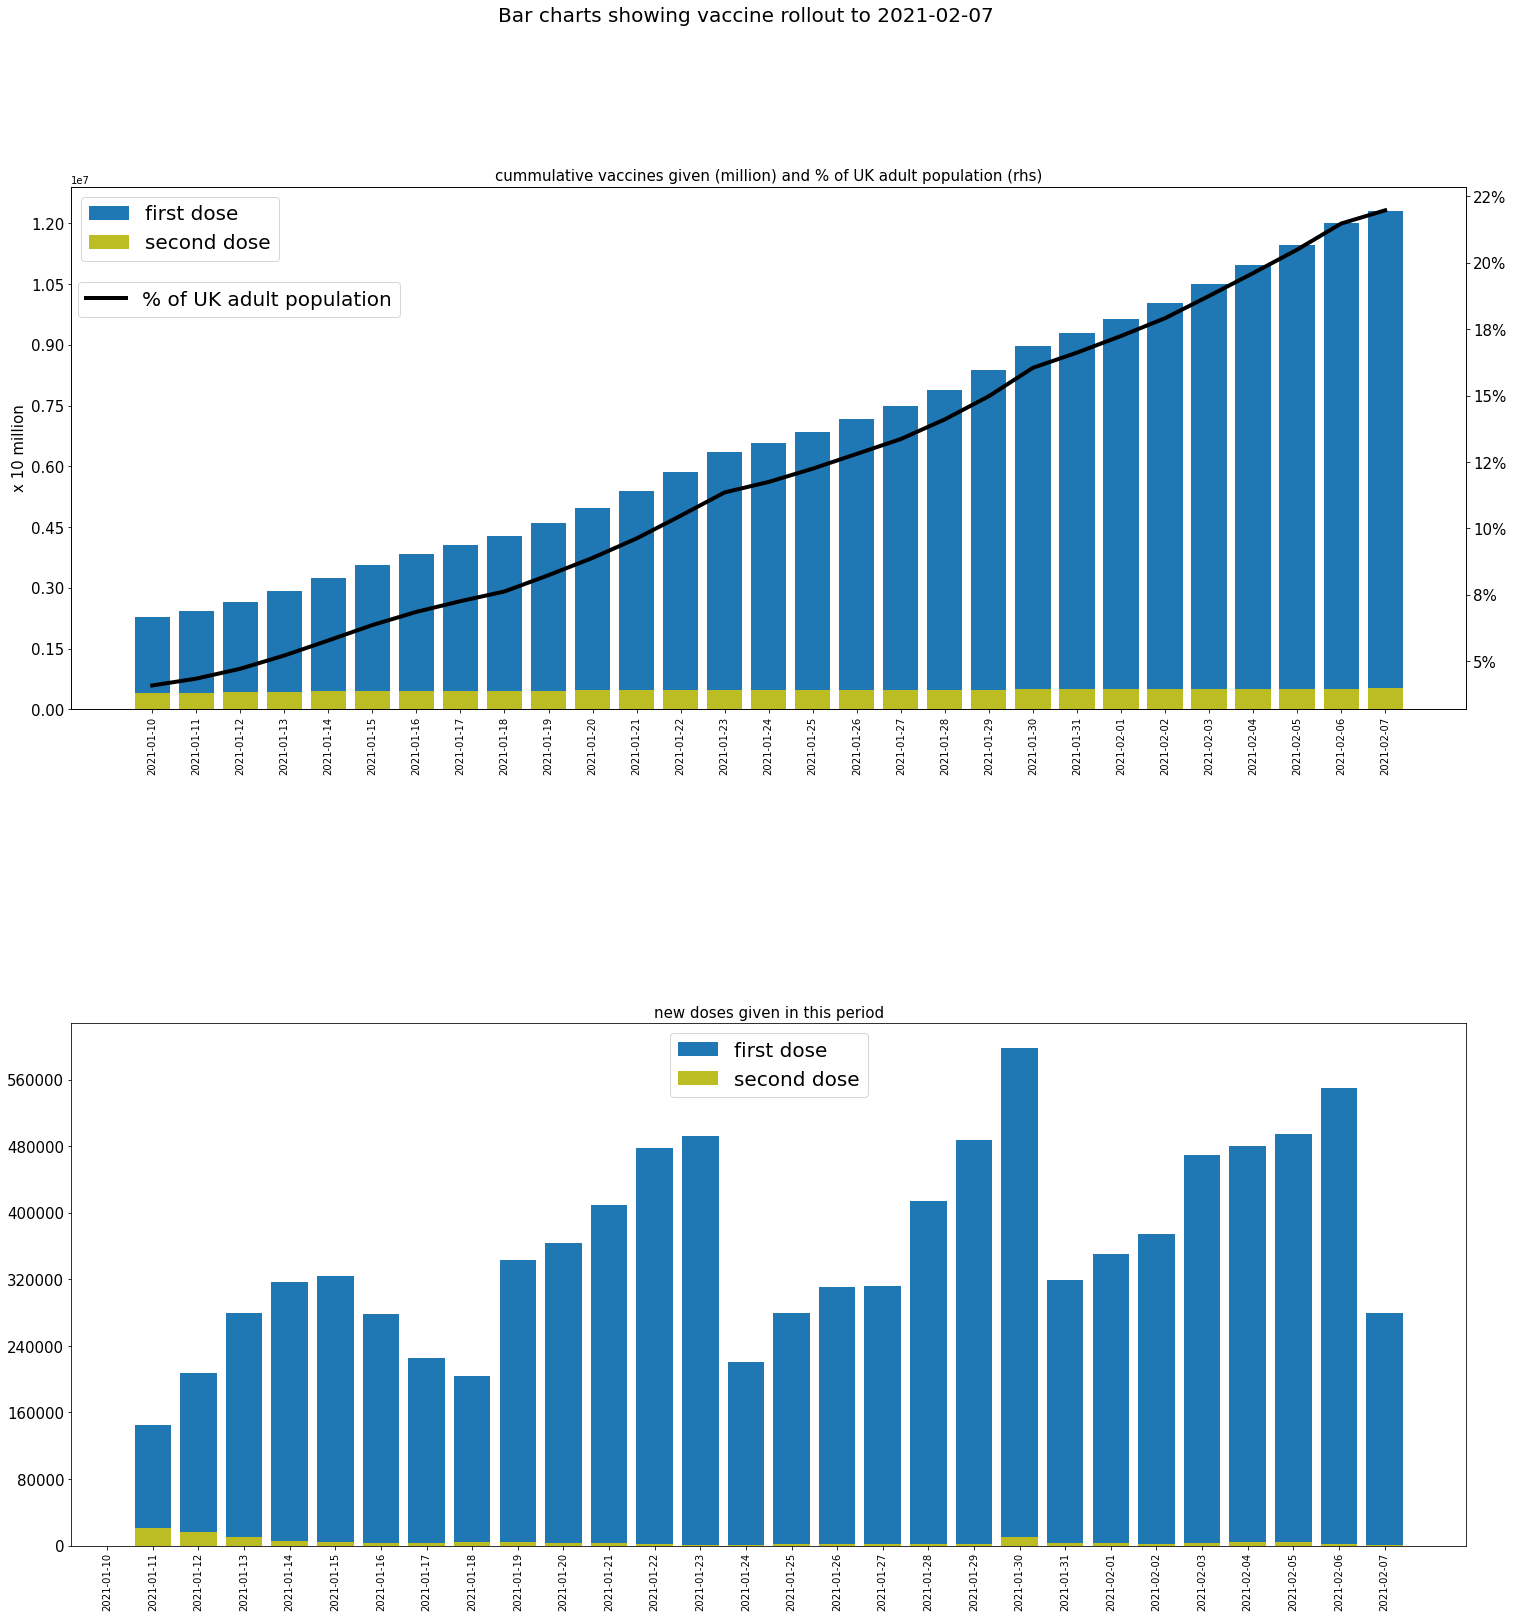

In [231]:
# bar charts showing vaccine rollout

col_names = ['cumPeopleVaccinatedFirstDoseByPublishDate', 'cumPeopleVaccinatedSecondDoseByPublishDate',
             'newPeopleVaccinatedFirstDoseByPublishDate', 'newPeopleVaccinatedSecondDoseByPublishDate']

titles = ['cummulative vaccines given (million) and % of UK adult population (rhs)', 'new doses given in this period']

#fig, ax = plt.subplots(nrows=int(len(col_names)/3)+1, ncols=3, figsize=(25,25))
fig, ax = plt.subplots(nrows=int(len(col_names)/2), ncols=1, figsize=(25,25))

plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.suptitle('Bar charts showing vaccine rollout to ' + last_date, fontsize = 20)
#plt.suptitle("anything over 'Less than a year' indicates that returning members keep their history", fontsize = 20)

x = df_vac.index.values

labels = list(df_vac['date'])

# for i in range(1,len(labels),2):
#     labels[i-1]=''
# if len(labels) % 2 != 0:
#     labels[-1]=''

for ii in range(0,len(col_names),2):
    #for i in range(len(df)):
    y1 = df_vac[col_names[ii]]
    y2 = df_vac[col_names[ii+1]]
    ax[int(ii/2)].set_title(titles[int(ii/2)], fontsize=15)
    ax[int(ii/2)].set_xticks(x)
    ax[int(ii/2)].set_xticklabels(labels, rotation = 90)
    ax[int(ii/2)].yaxis.set_tick_params(labelsize=15)
    ax[int(ii/2)].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[int(ii/2)].bar(x,y1, color='#1f77b4', label = 'first dose')
    ax[int(ii/2)].bar(x,y2, color='#bcbd22', label = 'second dose')
    #ax[int(ii/3),ii - 3*int(ii/3)].bar(df_deaths_comp['date'][i],y1[i], color='#1f77b4')
    ax[int(ii/2)].legend(fontsize=20)
    
    if ii == 0:
        ax[int(ii/2)].set_ylabel('x 10 million', fontsize=15)
        ax2 = ax[int(ii/2)].twinx()
        ax2.plot(x,y1/55940000, color='black', lw=4, label = '% of UK adult population')
        ax2.legend(fontsize=20, loc=(.005,.75))
        ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
        ax2.yaxis.set_tick_params(labelsize=15)        

start_date = df_vac['date'].iloc[0]
end_date = df_vac['date'].iloc[-1]

if savePNG == 1 or PwrptPrep == 1:
    fileName = 'Coviduk - bar charts vaccine rollout.png'
    
    slideTitle.append('Bar charts showing vaccine rollout to ' + last_date)
    slideText.append(str(start_date) + ' to ' + str(end_date))
    imagePath.append(fileName)

    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName, bbox_inches = 'tight')
    
#     slideTitle_ = 'Bar charts cumulative deaths each week by age group to ' + last_date
#     slideText_ = (str(start_date) + ' to ' + str(end_date))
#     imagePath_ = (fileName)  
    
plt.show()

In [232]:
#
# Preparing the presentation
#

In [233]:
if PwrptPrep == 1:
    prs = Presentation('Presentation - template.pptx')
    prs_type = 'agi'
    #prs = Presentation('Presentation - template2.pptx')
    #prs_type = 'plain'

In [234]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    #listShapes = [1,2,0]
    
    if prs_type !='plain':
        
        listShapes = [1,2,0]
        for i in range(3):
            slide = prs.slides[0]
            shape = slide.shapes[listShapes[i]]
            text_frame = shape.text_frame
            text_frame.paragraphs[0].runs[0].text = presentationTitle[i]
    
    else:        
        listShapes = [0,1,2]
        for i in range(3):
            slide = prs.slides[0]
            shape = slide.shapes[listShapes[i]]
            text_frame = shape.text_frame
            text_frame.paragraphs[0].text = presentationTitle[i]

In [235]:
# # add the Preamble and Summary slides
# if PwrptPrep == 1:

#     title_Preamble_Summary = ['Preamble', 'Summary']

#     for i in range(2):
#         blank_slide_layout = prs.slide_layouts[15]
#         slide = prs.slides.add_slide(blank_slide_layout)

#         title = slide.shapes.title
#         title.text = title_Preamble_Summary[i]

#         top = height = Inches(1.5)
#         width = Inches(10.25)
#         left = Inches(0.25)
#         txBox = slide.shapes.add_textbox(left, top, width, height)
#         tf = txBox.text_frame
#         tf.word_wrap = True
#         p = tf.add_paragraph()
#         p.level = 1
#         p.text = 'start writing here'

In [236]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Preamble']
    
    for i in range(1):
        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
            p_level = 1
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            p_level = 0
        
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = p_level
        if i == 0:
            p.text = 'Daily and some weekly charts showing UK Covid Testing, new cases, hospitalisations including occupied ventilation beds and deaths.  Data Further visualised by age and by region.  End of chart pack has excess deaths and vaccine rollout'
            p = tf.add_paragraph()
            p.level = p_level 
            p.text = 'The charts for England only given i could only find hospital admission by age for England'
            p = tf.add_paragraph()
            p.level = p_level
            p.text = 'All the data for these charts comes from UK government websites'
            p = tf.add_paragraph()
            p.level = p_level
            p.text = 'Some charts are derived from other charts'
            p = tf.add_paragraph()
            p.level = p_level
            p.text = 'For the daily charts, the latest data points are subject to revision as new data is submitted'         
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'Sources:'
            
#             sources = [
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newDeaths28DaysByDeathDate%22:%22newDeaths28DaysByDeathDate%22,%22cumDeaths28DaysByDeathDate%22:%22cumDeaths28DaysByDeathDate%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22covidOccupiedMVBeds%22:%22covidOccupiedMVBeds%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaName=United%2520Kingdom;areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newVirusTests%22:%22newVirusTests%22,%22cumVirusTests%22:%22cumVirusTests%22%7D&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumPeopleVaccinatedFirstDoseByVaccinationDate&metric=cumPeopleVaccinatedSecondDoseByVaccinationDate&metric=weeklyPeopleVaccinatedFirstDoseByVaccinationDate&metric=weeklyPeopleVaccinatedSecondDoseByVaccinationDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000004&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',    
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000006&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000007&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000008&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000009&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000005&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000003&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',   
#             ]
            
#             for i in range(len(sources)):
#                 p = tf.add_paragraph()
#                 p.level = p_level + 1
#                 p.font.size = Pt(6)
#                 p.text = sources[i]

In [237]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Sources']
    
    for i in range(1):
        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
            p_level = 1
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            p_level = 0
        
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = p_level
        if i == 0:
#             p.text = 'Daily and some weekly charts showing UK Covid Testing, new cases, hospitalisations including occupied ventilation beds, deaths.  And also looking at the data by age'
#             p = tf.add_paragraph()
#             p.level = p_level 
#             p.text = 'The charts at the end are for England only given i could only find hospital admission by age for England'
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'All the data for these charts comes from UK government websites'
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'Some charts are derived from other charts'
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'For the daily charts, the latest data points are subject to revision as new data is submitted'         
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'Sources:'
            
#             sources = [
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newDeaths28DaysByDeathDate%22:%22newDeaths28DaysByDeathDate%22,%22cumDeaths28DaysByDeathDate%22:%22cumDeaths28DaysByDeathDate%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22covidOccupiedMVBeds%22:%22covidOccupiedMVBeds%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaName=United%2520Kingdom;areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newVirusTests%22:%22newVirusTests%22,%22cumVirusTests%22:%22cumVirusTests%22%7D&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumPeopleVaccinatedFirstDoseByVaccinationDate&metric=cumPeopleVaccinatedSecondDoseByVaccinationDate&metric=weeklyPeopleVaccinatedFirstDoseByVaccinationDate&metric=weeklyPeopleVaccinatedSecondDoseByVaccinationDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000004&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',    
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000006&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000007&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000008&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000009&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000005&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000003&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',   
#             ]


            
            for i in range(len(url_list)):
                p = tf.add_paragraph()
                p.level = p_level + 1
                p.font.size = Pt(6)
                p.text = url_list[i]

In [238]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Summary']
    
    for i in range(1):
        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
            p_level = 1
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            p_level = 0
        
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = p_level


In [239]:
# add the Chapter contents slide and Chapter 1 slide
if prs_type !='plain':

    if PwrptPrep == 1:

        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
        else:
            blank_slide_layout = prs.slide_layouts[5]

        slide = prs.slides.add_slide(blank_slide_layout)

        shapes = slide.shapes

        shapes.title.text = 'Contents'

        rows = cols = 2
        left = Inches(0.25)
        top = Inches(1.5)
        width = Inches(1.5)
        height = Inches(1.5)

        table = shapes.add_table(rows, cols, left, top, width, height).table

        # set column widths
        table.columns[0].width = Inches(1.5)
        table.columns[1].width = Inches(2.0)

        tableText = ['01', 'Charts', '02', 'Appendix']
        TableFont = [60, 14, 60, 14]
        tableCell1 = [0,0,1,1]
        tableCell2 = [0,1,0,1]

        for i in range(4):
            table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
            cell = table.cell(tableCell1[i], tableCell2[i])
            para = cell.text_frame.paragraphs[0]
            para.font.bold = True
            para.font.size = Pt(TableFont[i])
            para.font.color.rgb = RGBColor(0, 55, 129) 
            cell.vertical_anchor = MSO_ANCHOR.MIDDLE
            fill = cell.fill
            fill.background()

        slide = prs.slides.add_slide(prs.slide_layouts[9])
        placeholder = slide.placeholders[1]
        placeholder.text = '01'
        title = slide.shapes.title
        title.text = 'Charts'


In [240]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(left_inches)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        if imagePath[i] !='':
            pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)

In [241]:
# # add the Appendix

if PwrptPrep == 1:
    if prs_type !='plain':
        blank_slide_layout = prs.slide_layouts[15]
    
        slide = prs.slides.add_slide(prs.slide_layouts[9])
        placeholder = slide.placeholders[1]
        placeholder.text = '02'
        title = slide.shapes.title
        title.text = 'Appendix'

In [242]:
# # add the 'First 5 lines of the latest upload slide'

# if PwrptPrep == 1:
    
#     blank_slide_layout = prs.slide_layouts[15]
#     slide = prs.slides.add_slide(blank_slide_layout)

#     shapes = slide.shapes

#     shapes.title.text = 'First 5 lines of most recent uploaded data file'

#     rows = 6
#     cols = 7
#     left = Inches(0.25)
#     top = Inches(1.5)
#     width = Inches(1.5)
#     height = Inches(0.25)

#     table = shapes.add_table(rows, cols, left, top, width, height).table

#     # set column widths
#     table.columns[0].width = Inches(0.5)
#     table.columns[1].width = Inches(2.5)
#     table.columns[2].width = Inches(2.5)
#     table.columns[3].width = Inches(1.0)
#     table.columns[4].width = Inches(1.5)
#     table.columns[5].width = Inches(1.0)
#     table.columns[6].width = Inches(1.0)
    
#     tableText = ['']
    
#     # table headers
#     for col in df[-1].columns[0:cols-1]:
#         tableText.append(col)
    
#     # populate rest of list with dataframe cells
#     for i in range((rows-1) * (cols-1)):
#         if i%(cols-1) == 0:
#             tableText.append(str(int(i/(cols-1))))          
#         tableText.append(str(df[-1].iat[int(i/(cols-1)), i%(cols-1)]))

#     for i in range((rows) * cols):
#         table.cell(int(i/(cols)), i%cols).text = tableText[i]
#         cell = table.cell(int(i/(cols)), i%cols)
#         para = cell.text_frame.paragraphs[0]
#         if i%cols == 0 or int(i/cols) == 0:
#             para.font.bold = True
#         else:
#             para.font.bold = False
#         para.font.size = Pt(10)
#         para.font.color.rgb = RGBColor(0, 0, 0) 
#         cell.vertical_anchor = MSO_ANCHOR.MIDDLE
#         fill = cell.fill
#         fill.background()
        

In [243]:
# # and the 'Code used to gather page', rotate the text
# # and upload the Python, github and Pandas pages

# if PwrptPrep == 1:
    
#     # list of appendix text files to take from my PC to be put into slides
#     appendixTitleList = ['Code used to gather the checkatrade data',
#                          'Appendix: Python Programming Language','Appendix: Github','Appendix: Pandas']
#     appendixFileList = ['Presentation - code checkatrade.txt',
#                         'Presentation - Python Slide.txt','Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']
#     appendixFileList_alt = []
#     for element in appendixFileList:
#         appendixFileList_alt.append('C:/Users/andre/OneDrive/Documents/Big Data Project/Jupyter Notebook Items/' + element)
    
#     for i in range(len(appendixTitleList)):
#         blank_slide_layout = prs.slide_layouts[15]
#         slide = prs.slides.add_slide(blank_slide_layout)
#         title = slide.shapes.title
#         title.text = appendixTitleList[i]
#         try:
#             lines = [line.rstrip('\n') for line in open(appendixFileList[i])]
#         except:
#             lines = [line.rstrip('\n') for line in open(appendixFileList_alt[i])]
        
#         if (appendixTitleList[i] == 'Code used to gather the checkatrade data'): # rotate the text code -90
#             top = height = Inches(1.25)
#             width = Inches(10.25)
#             left = Inches(-4.25)
#             txBox = slide.shapes.add_textbox(left, top, width, height)
#             txBox.rotation = -90            
#         else: # other slides are normal
#             top = height = Inches(1.25)
#             width = Inches(10.25)
#             left = Inches(0.25)
#             txBox = slide.shapes.add_textbox(left, top, width, height)
#             txBox.rotation = 0
            
#         tf = txBox.text_frame
#         tf.word_wrap = True
        
#         for ii in range(len(lines)):
#             p = tf.add_paragraph()
#             p.level = 1
        
#             if (appendixTitleList[i] == 'Code used to gather the checkatrade data'): # reduce the font size
#                 p.font.size = Pt(8)
#                 p.level = 0  
#             else:
#                 txBox.rotation = 0
#                 p.font.size = Pt(12)            
            
#             if 'https' in lines[ii]:
#                 r = p.add_run()
#                 r.text = lines[ii].split('https')[0]
#                 r1 = p.add_run()
#                 r1.text = 'https' + lines[ii].split('https')[1]        
#                 hlink = r1.hyperlink
#                 hlink.address = r1.text
#             else:
#                 p.text = lines[ii]


In [244]:
# add closing slide

if PwrptPrep == 1:
    if prs_type !='plain':
        blank_slide_layout = prs.slide_layouts[40]
        slide = prs.slides.add_slide(blank_slide_layout)

In [245]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:

    prs.save(saveFileName)

In [246]:
#
# all the slide types
# only to be run for reference
#

In [247]:
# prs = Presentation('Persentation - template.pptx')

In [248]:
# for i in range(43):

#     blank_slide_layout = prs.slide_layouts[i]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [249]:
# prs.save('presentationPrep - all the slides.pptx')